# Batuhan Tunçel's HW2

Assuming you have the data folder in your working directory in the following format:
'working_directory/dataset_name/'

In [386]:
require(data.table)
require(ggplot2)
require(repr)
require(rpart)
require(rattle.data)
require(zoo)
require(genlasso)
options(repr.plot.width=15, repr.plot.height=8)
current_folder=getwd()
dataset='CBF'
train_data_path=sprintf('%s/%s/%s_TRAIN.txt',current_folder,dataset,dataset)
train_data=fread(train_data_path)
head(train_data)

V1 V2         V3         V4          V5          V6         V7        
1 1  -0.4642765 -0.5550479 -0.84284310 -0.86589548 -0.9363963 -0.8172700
2 1  -0.8969721 -0.6856855 -1.35138180 -1.45866680 -1.1653456 -1.4039293
3 1  -0.4646960 -0.5677389 -0.03202276 -0.63504562 -0.6028255 -0.2668563
4 3  -0.1871897 -0.6208077 -0.81566070 -0.52139796 -0.7904229 -0.9675174
5 2  -1.1360166 -1.3191953 -1.84462380 -0.78869178 -0.2517154 -1.4876032
6 2  -0.5687087 -0.8881180 -0.04797658 -0.03803611 -0.4830683 -1.0946887
  V8         V9          V10        ... V120       V121       V122      
1 -0.2636122 -1.25804830 -1.2503934 ... -1.3310856 -1.0837000 -1.0179615
2 -1.8217996 -0.83160109 -1.0163124 ... -1.0625534 -1.5686762 -1.3640403
3 -0.2670613 -0.93104230 -0.4493819 ... -0.2867213 -0.6371576 -0.1552602
4 -1.4870063 -0.27788714 -0.8350747 ... -0.9086154 -0.7262865  0.1837776
5 -0.6687641 -0.34036037 -1.0463815 ... -1.1829110 -1.0735136 -1.6113624
6 -0.9534529 -0.03000688 -0.7954546 ... -0.9907398  0.5183746 -0.2285628
  V123       V124       V125       V126       V127       V128       V129       
1 -0.9160287 -1.1342892 -0.9202237 -0.7893615 -0.6387058 -0.9636643 -1.24516910
2 -1.1551774 -0.9958611 -1.1637529 -0.9165233 -0.5820981 -1.2590094 -1.39252410
3 -0.6881293 -0.8856088 -0.7662393 -0.8653152 -0.2844857 -0.6878891 -0.88760835
4 -0.7374441 -1.1139967 -0.3939866 -0.5878895 -0.6082319 -0.6364646 -0.34902865
5 -1.0643404 -0.9707364 -0.8272809 -0.9535377 -1.2701854 -1.7427579 -0.92594391
6 -0.5652887 -0.6429980 -1.1094278 -0.1010932 -0.2339490 -0.6198269 -0.08306189

We will work with long format for easier visualization and analysis first add id variable (data.table notation) and rename column name "V1" with "class" sort based on class first

In [388]:
setnames(train_data,'V1','class')
train_data=train_data[order(class)]
train_data[,class:=as.character(class)]
train_data[,id:=1:.N]
head(train_data)

class V2         V3         V4          V5         V6         V7        
1 1     -0.4642765 -0.5550479 -0.84284310 -0.8658955 -0.9363963 -0.8172700
2 1     -0.8969721 -0.6856855 -1.35138180 -1.4586668 -1.1653456 -1.4039293
3 1     -0.4646960 -0.5677389 -0.03202276 -0.6350456 -0.6028255 -0.2668563
4 1     -0.9658386 -1.6445832 -1.80593540 -1.4996576 -0.9200879 -1.1157058
5 1     -1.1864222 -0.8931970 -0.97773692 -0.6341093 -1.3848198 -1.2719261
6 1     -1.9453272 -1.4498402 -1.48894560 -1.8004841 -2.3130602 -1.7720853
  V8         V9         V10        ... V121       V122       V123      
1 -0.2636122 -1.2580483 -1.2503934 ... -1.0837000 -1.0179615 -0.9160287
2 -1.8217996 -0.8316011 -1.0163124 ... -1.5686762 -1.3640403 -1.1551774
3 -0.2670613 -0.9310423 -0.4493819 ... -0.6371576 -0.1552602 -0.6881293
4 -0.6501953 -0.9187663 -1.2347080 ... -1.0630339 -1.3165634 -0.7357389
5 -1.2121711 -1.4527917 -0.9344170 ... -1.2176250 -0.8236537 -1.2804516
6 -2.1548821 -1.3312254 -2.2651396 ... -0.1803694  0.5541209  0.6861262
  V124       V125       V126       V127       V128       V129       id
1 -1.1342892 -0.9202237 -0.7893615 -0.6387058 -0.9636643 -1.2451691 1 
2 -0.9958611 -1.1637529 -0.9165233 -0.5820981 -1.2590094 -1.3925241 2 
3 -0.8856088 -0.7662393 -0.8653152 -0.2844857 -0.6878891 -0.8876084 3 
4 -1.0521517 -0.9604649 -1.1335659 -0.6103437 -1.1652195 -0.6858989 4 
5 -1.5893960 -0.9982938 -0.8107998 -0.9815906 -1.2784443 -1.1078289 5 
6  0.6906180  0.6207642  0.9260082 -1.9410525 -2.1112366 -1.7680882 6

1. Melt the data for long format
2. Need to get numerical part of the variable (represents time) using gsub to set the nonnumerical part to zero length

In [389]:
long_train=melt(train_data,id.vars=c('id','class'))
head(long_train)
long_train[,time:=as.numeric(gsub("\\D", "", variable))-1]
 head(long_train)
long_train=long_train[,list(id,class,time,value)]
long_train=long_train[order(id,time)]
head(long_train)

id class variable value     
1 1  1     V2       -0.4642765
2 2  1     V2       -0.8969721
3 3  1     V2       -0.4646960
4 4  1     V2       -0.9658386
5 5  1     V2       -1.1864222
6 6  1     V2       -1.9453272

id class variable value      time
1 1  1     V2       -0.4642765 1   
2 2  1     V2       -0.8969721 1   
3 3  1     V2       -0.4646960 1   
4 4  1     V2       -0.9658386 1   
5 5  1     V2       -1.1864222 1   
6 6  1     V2       -1.9453272 1

id class time value     
1 1  1     1    -0.4642765
2 1  1     2    -0.5550479
3 1  1     3    -0.8428431
4 1  1     4    -0.8658955
5 1  1     5    -0.9363963
6 1  1     6    -0.8172700

Thanks to Genlasso package, build the time series representation with penalized regression approaches <br>
Collect all best estimate for each id in the long_train_lasso <br>
Plot the estimation value with real value

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


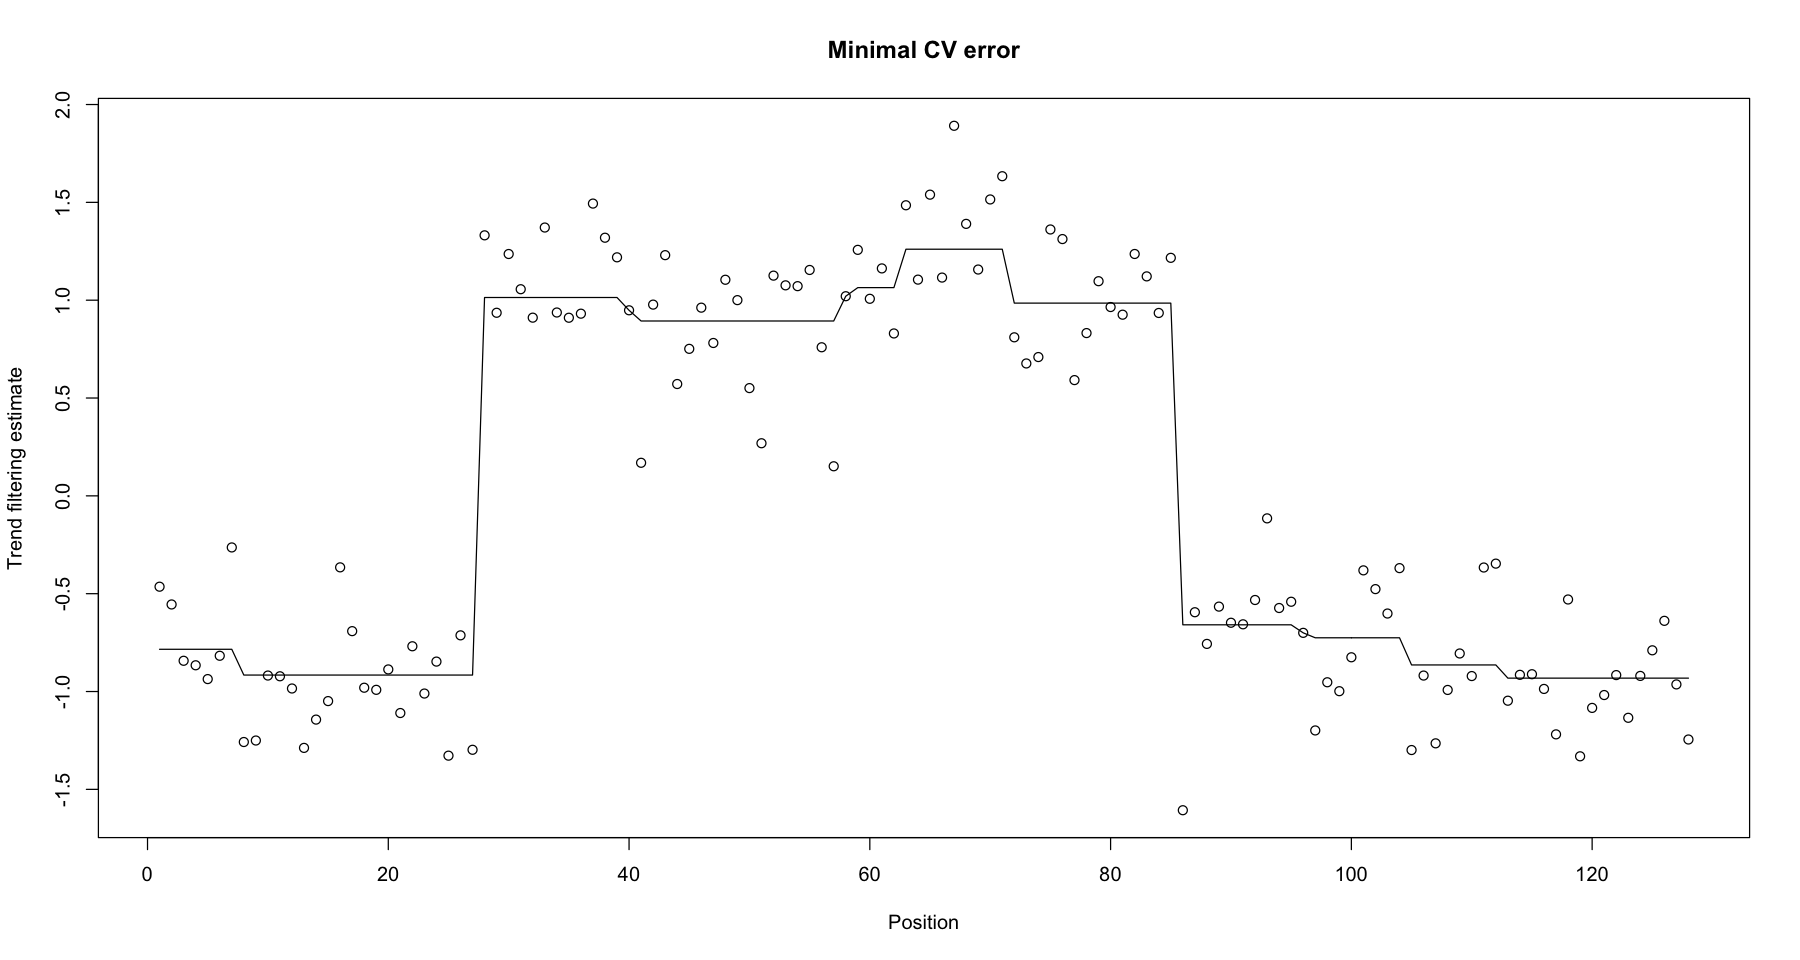

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


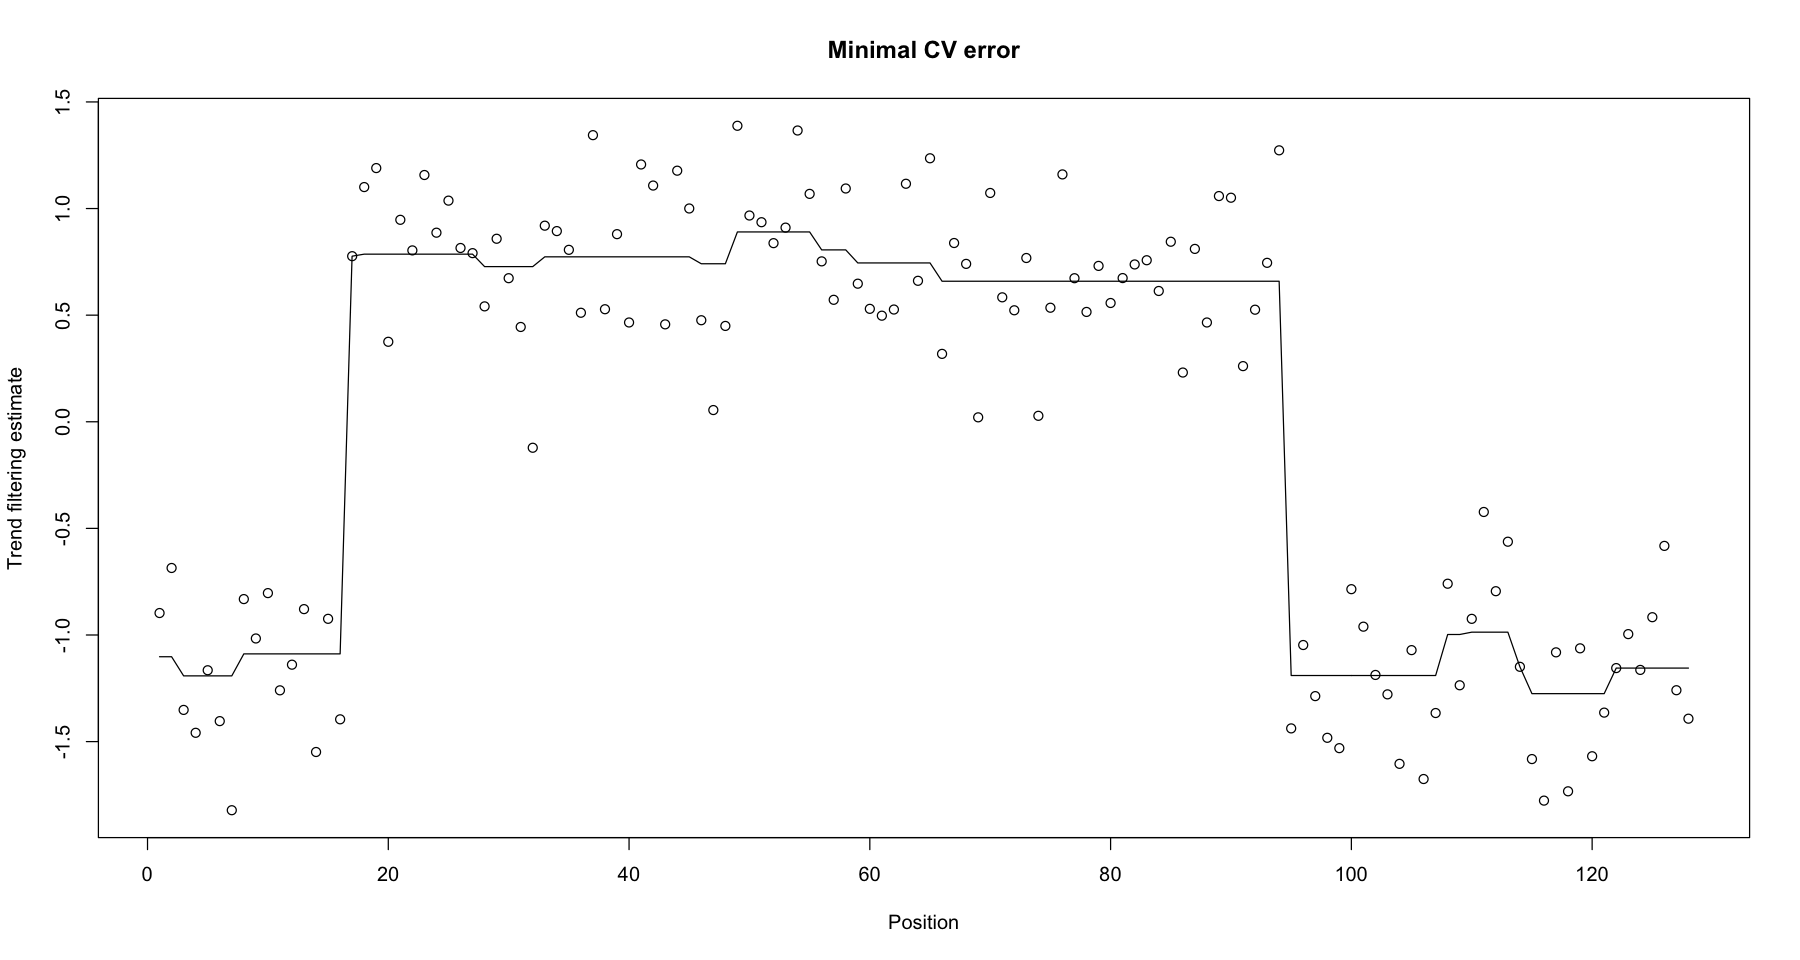

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


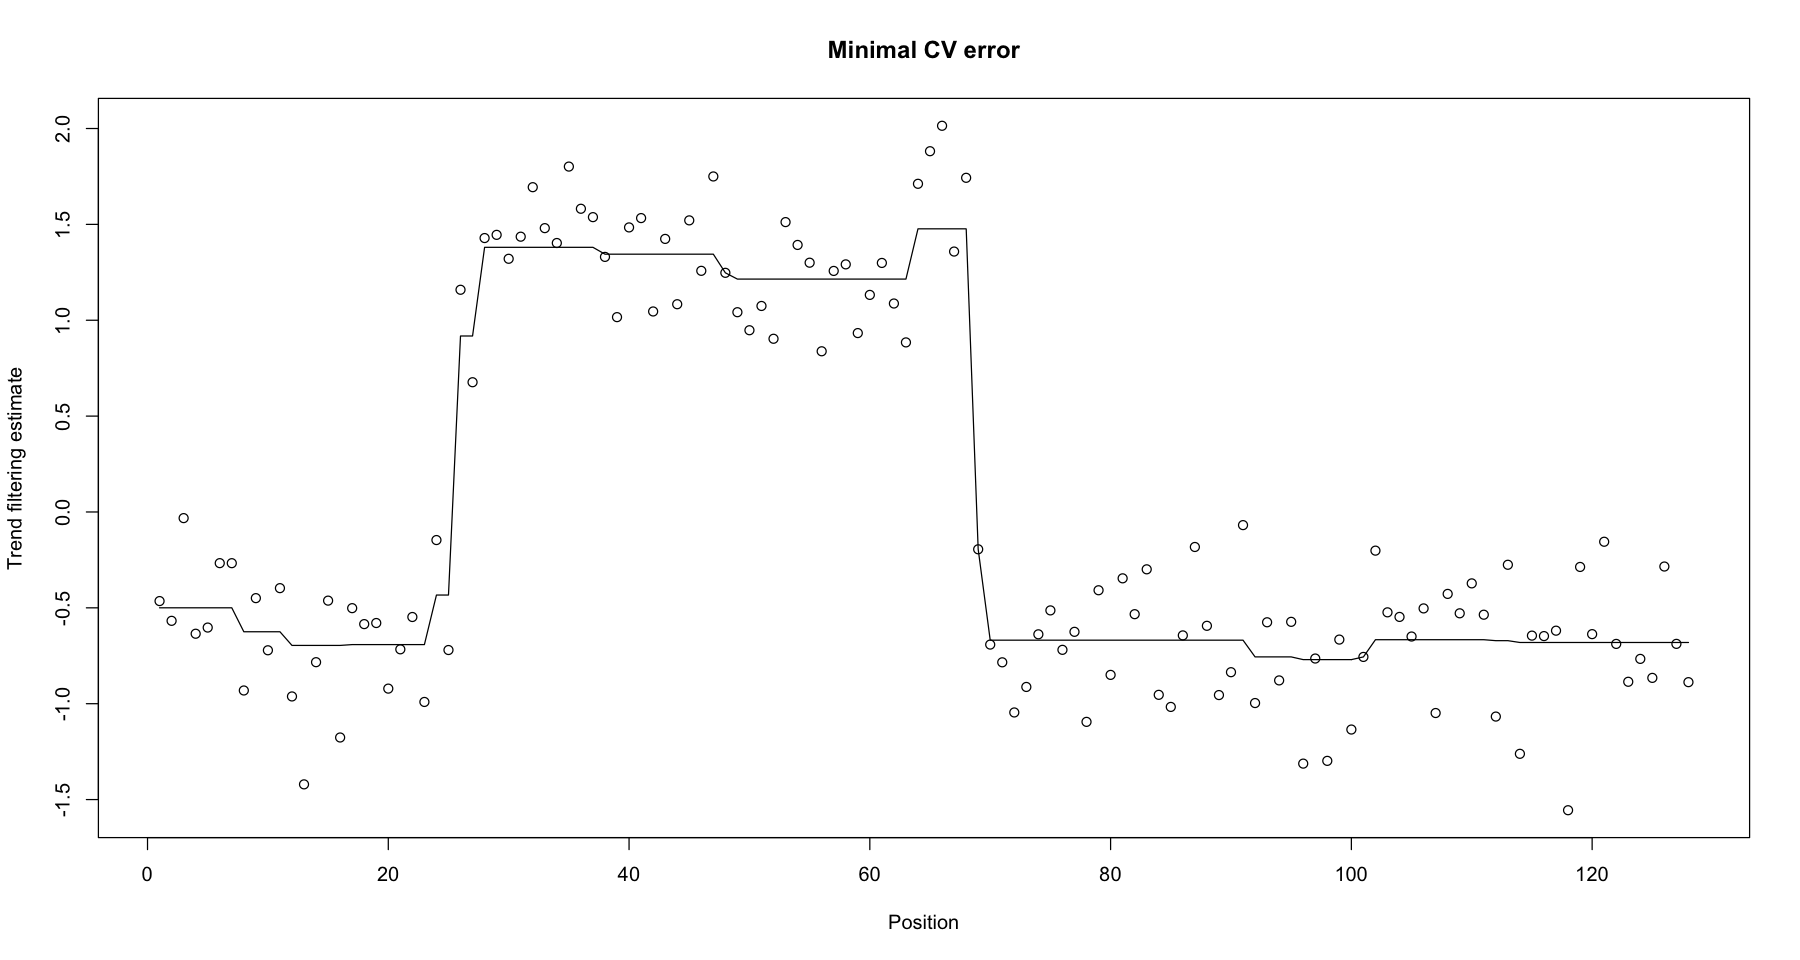

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


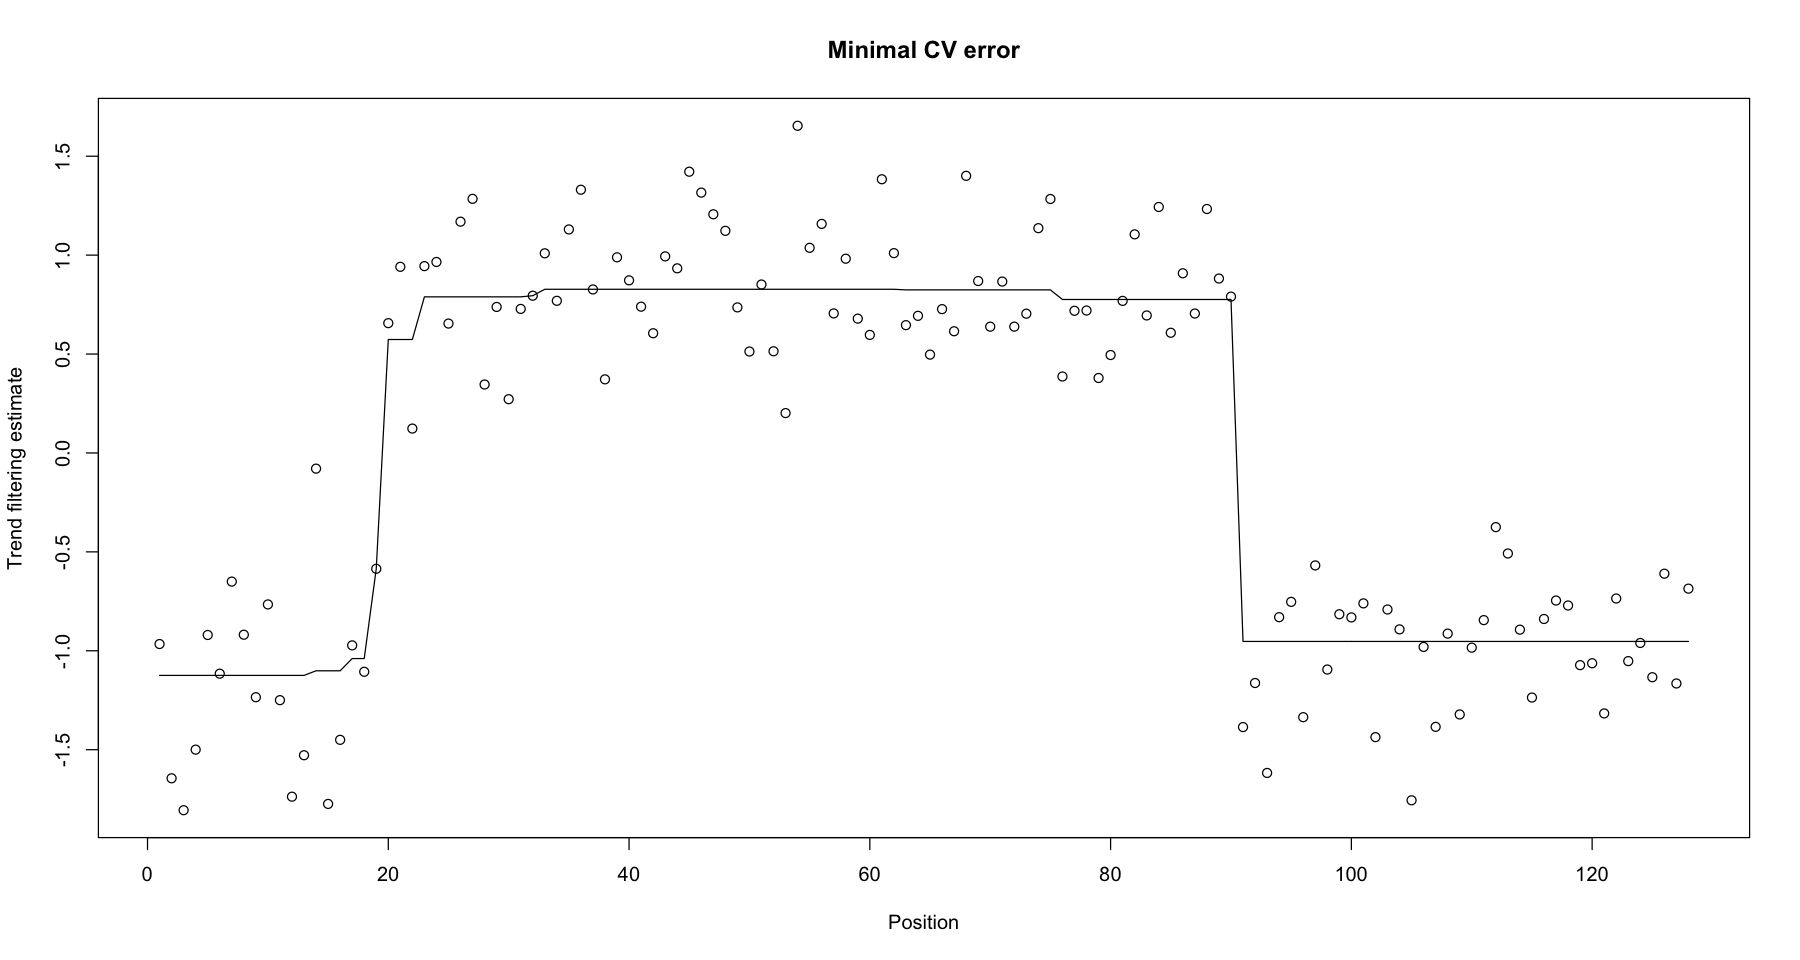

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


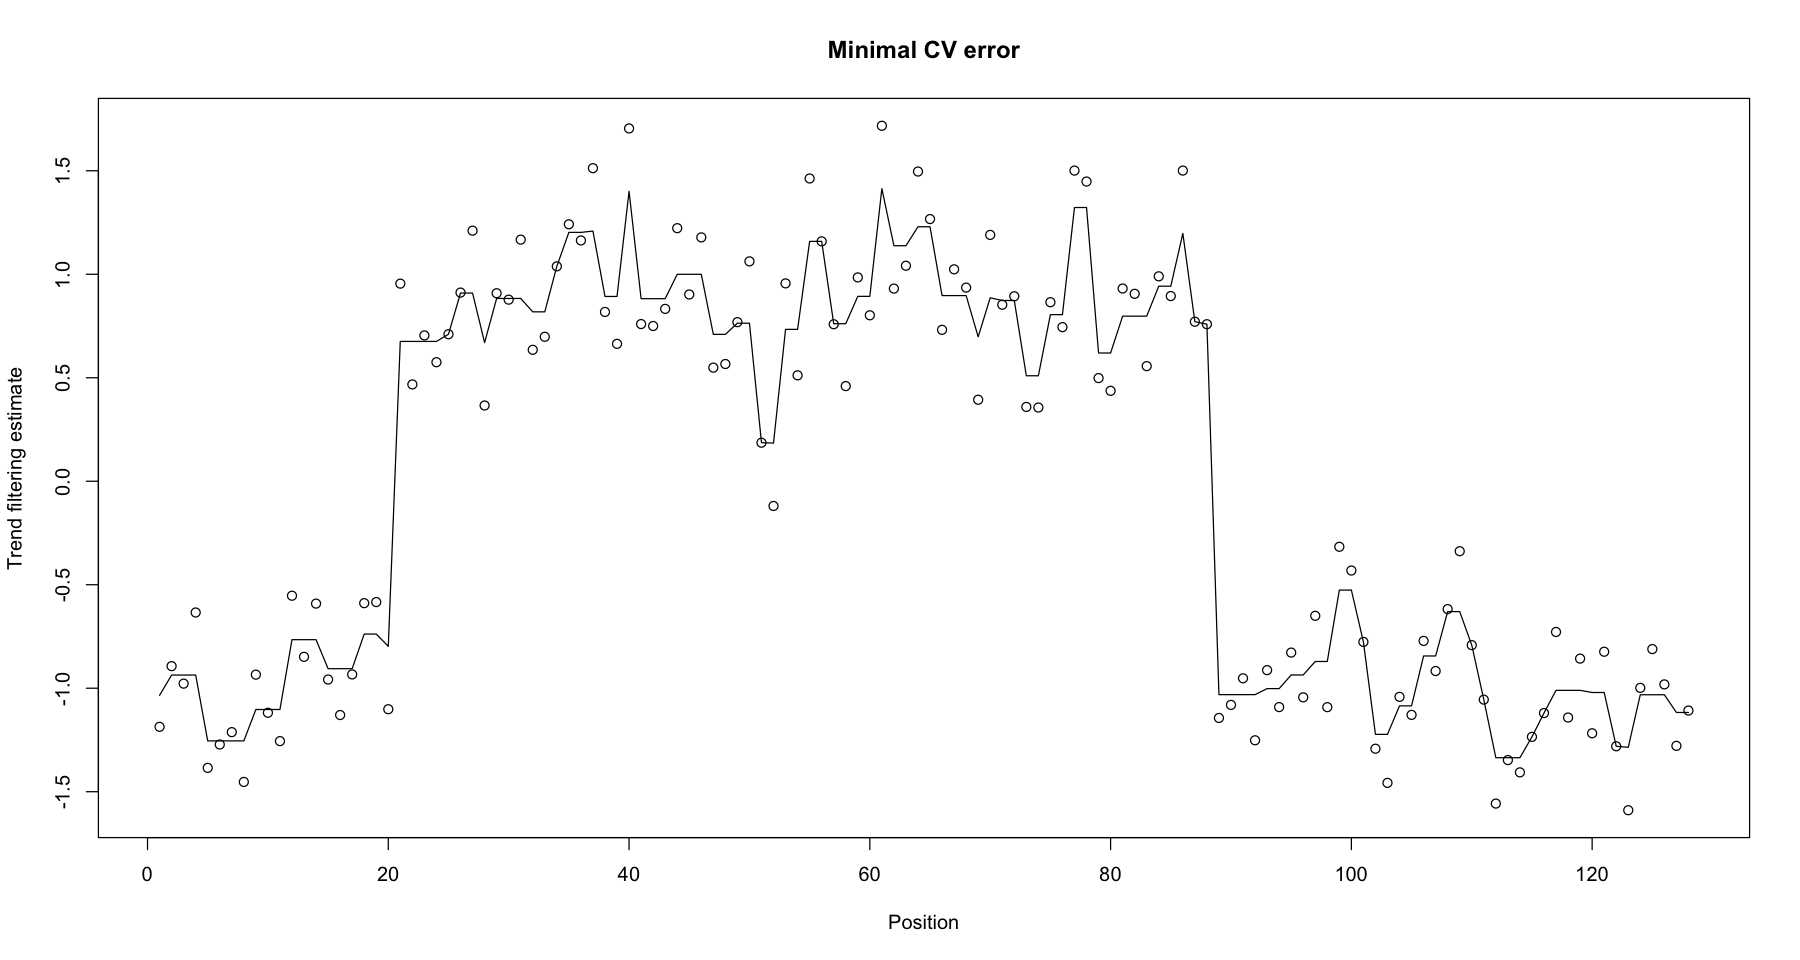

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


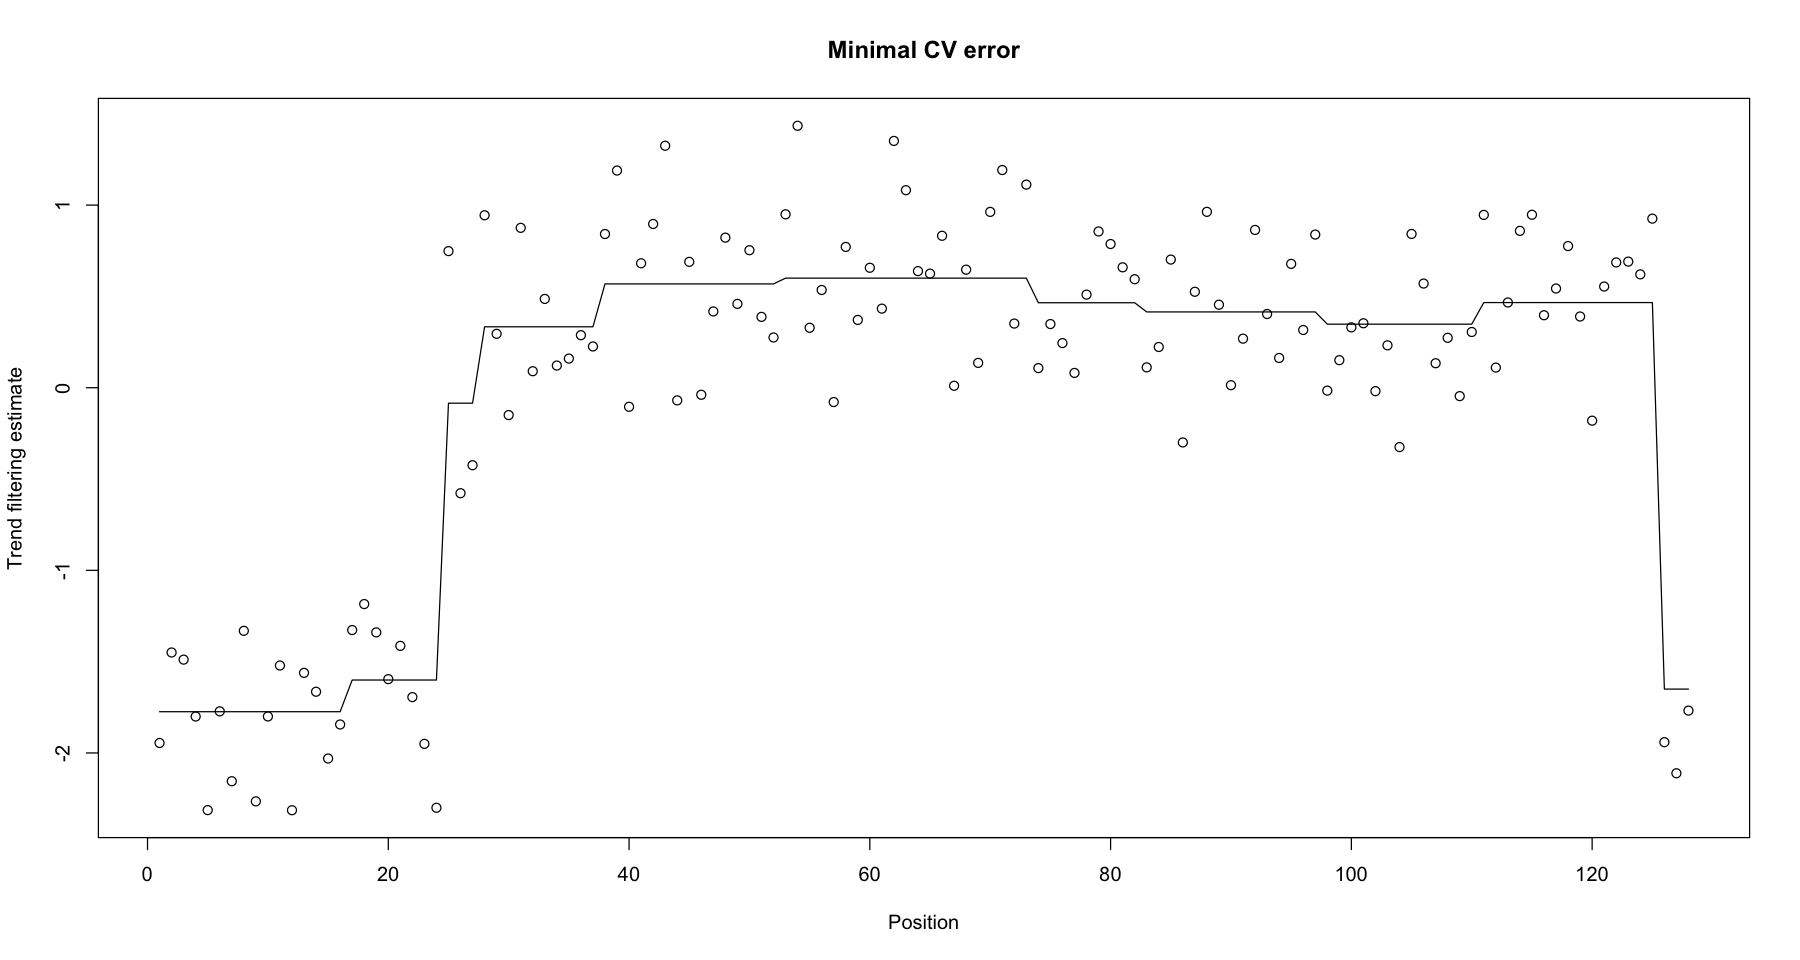

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


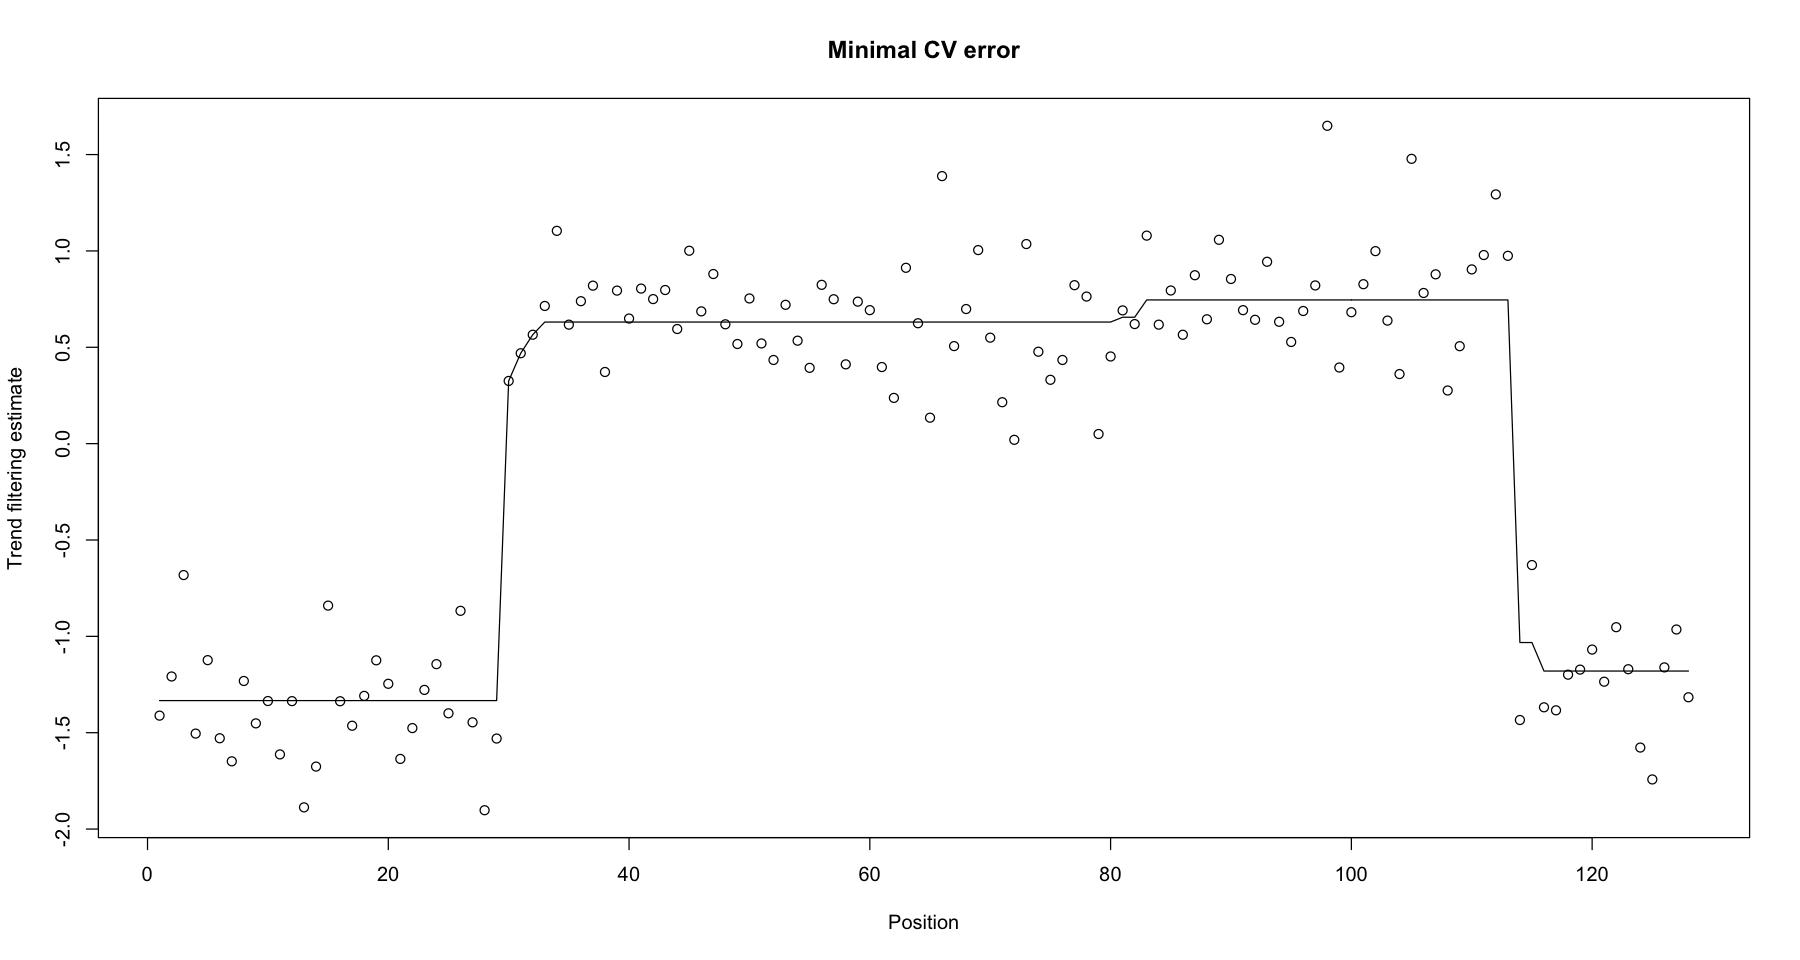

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


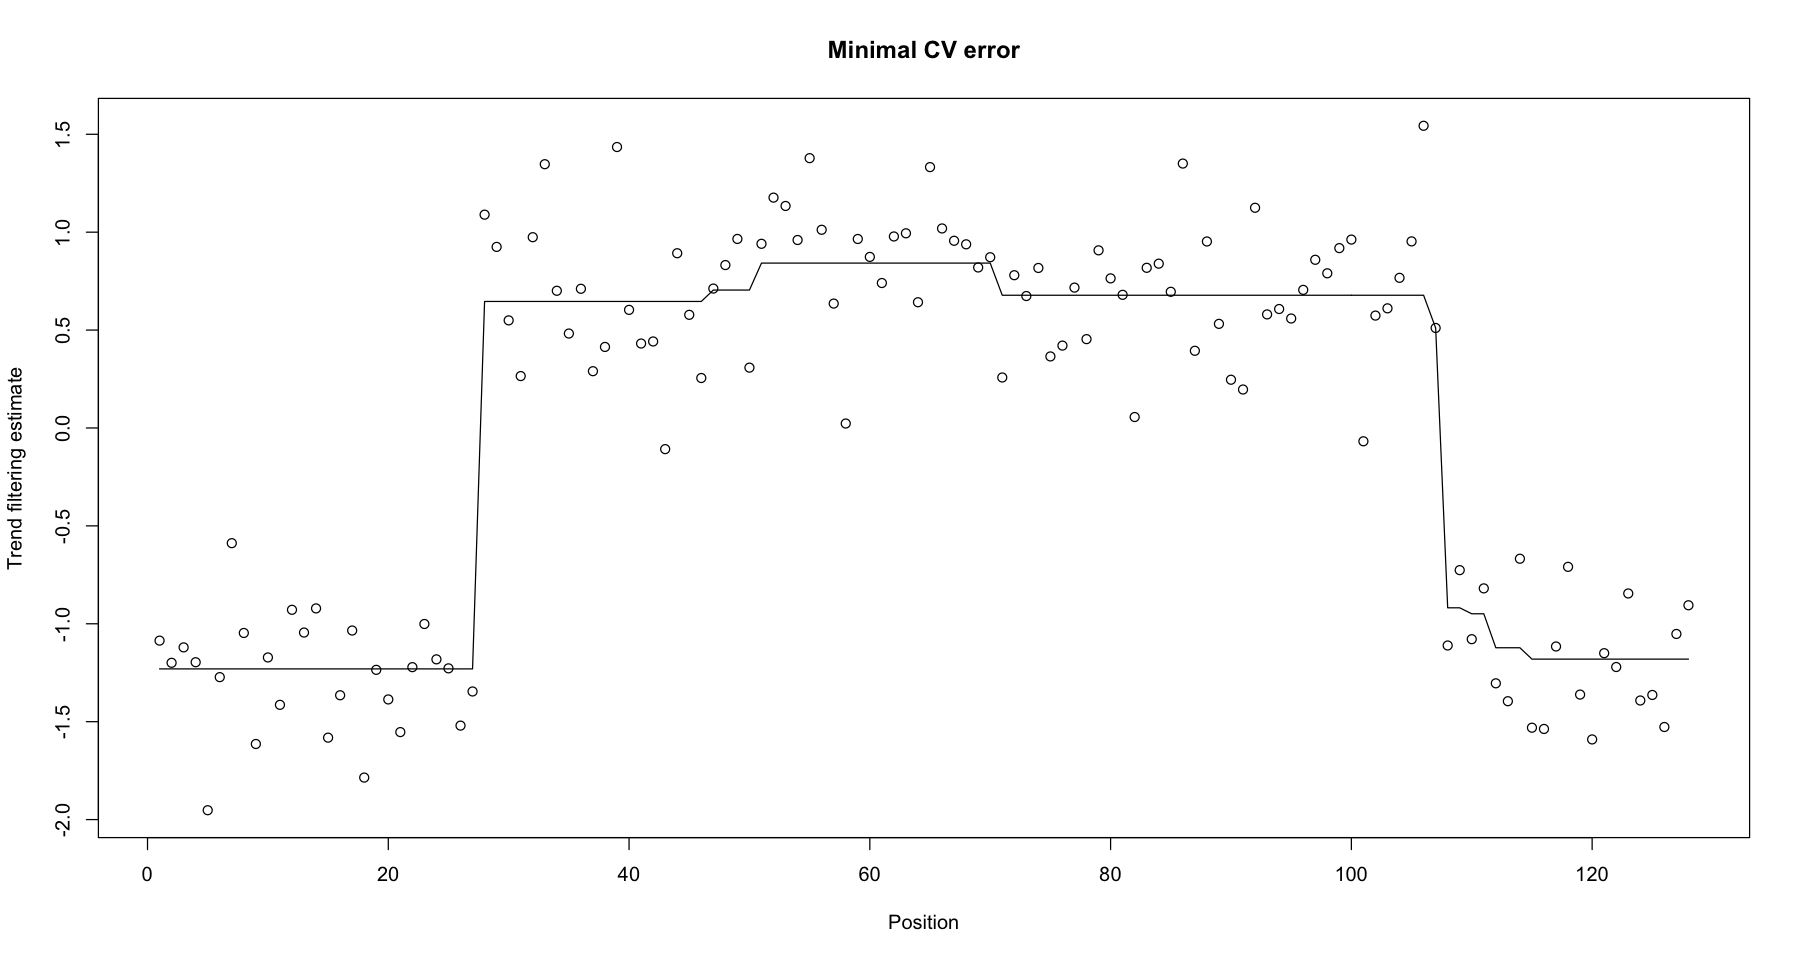

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


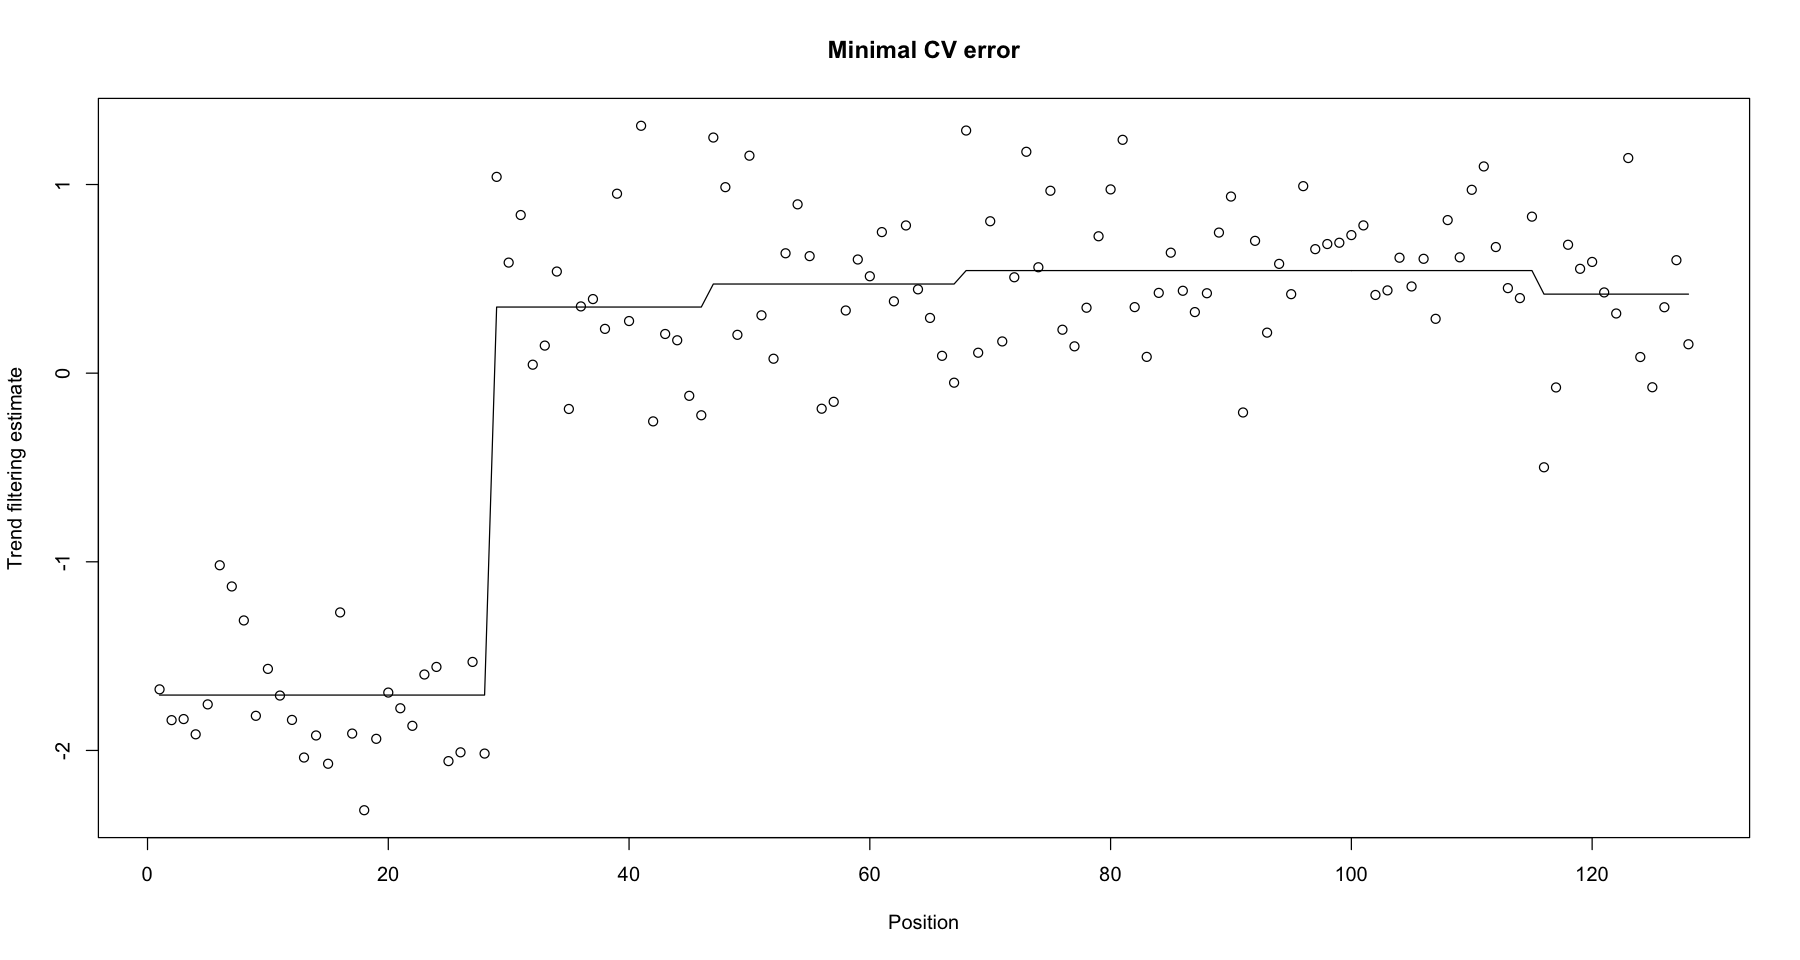

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


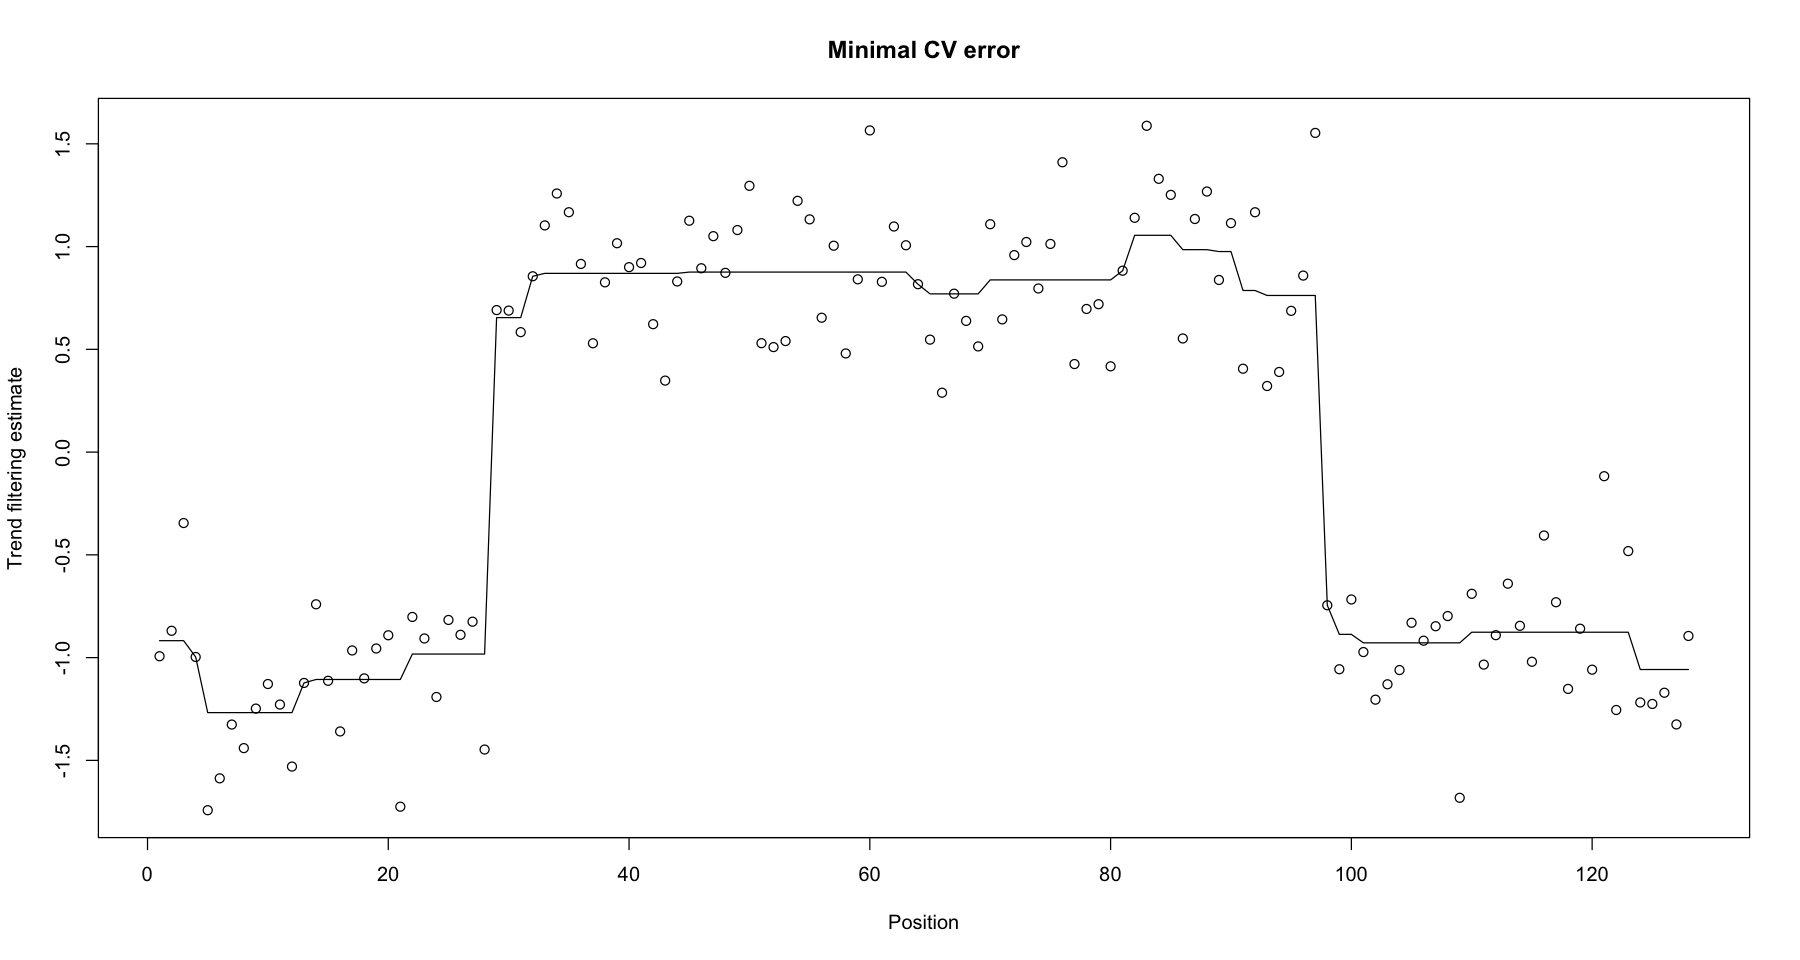

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


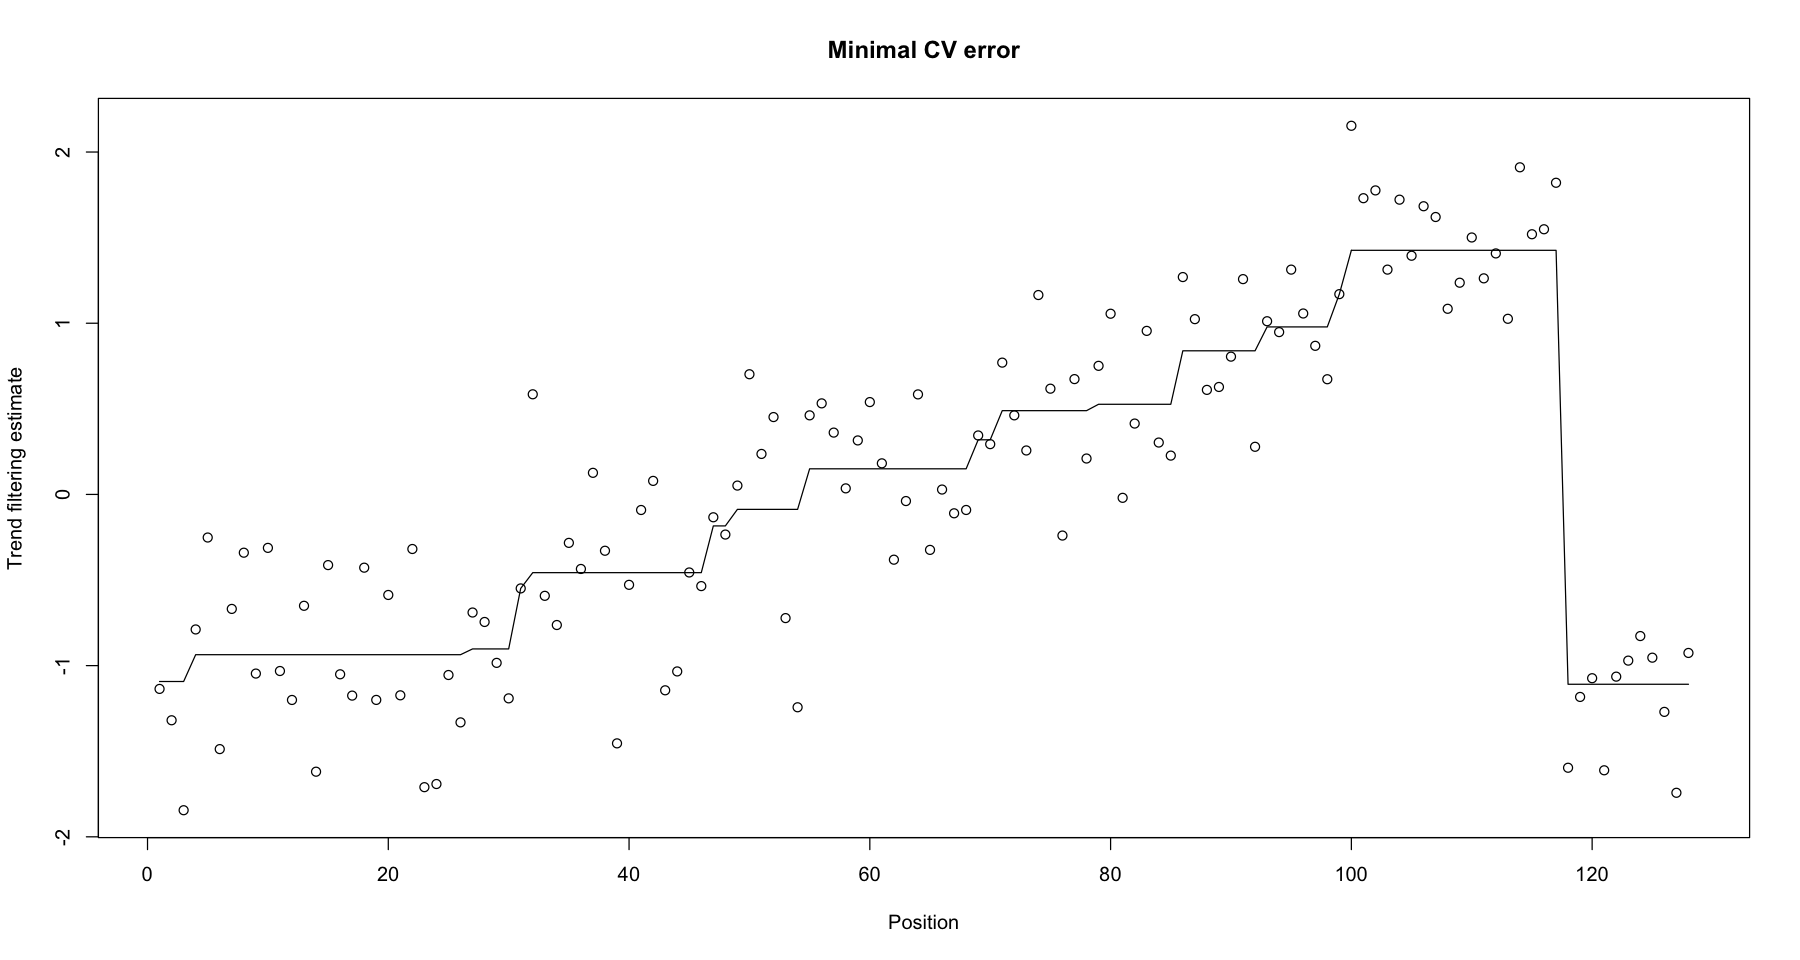

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


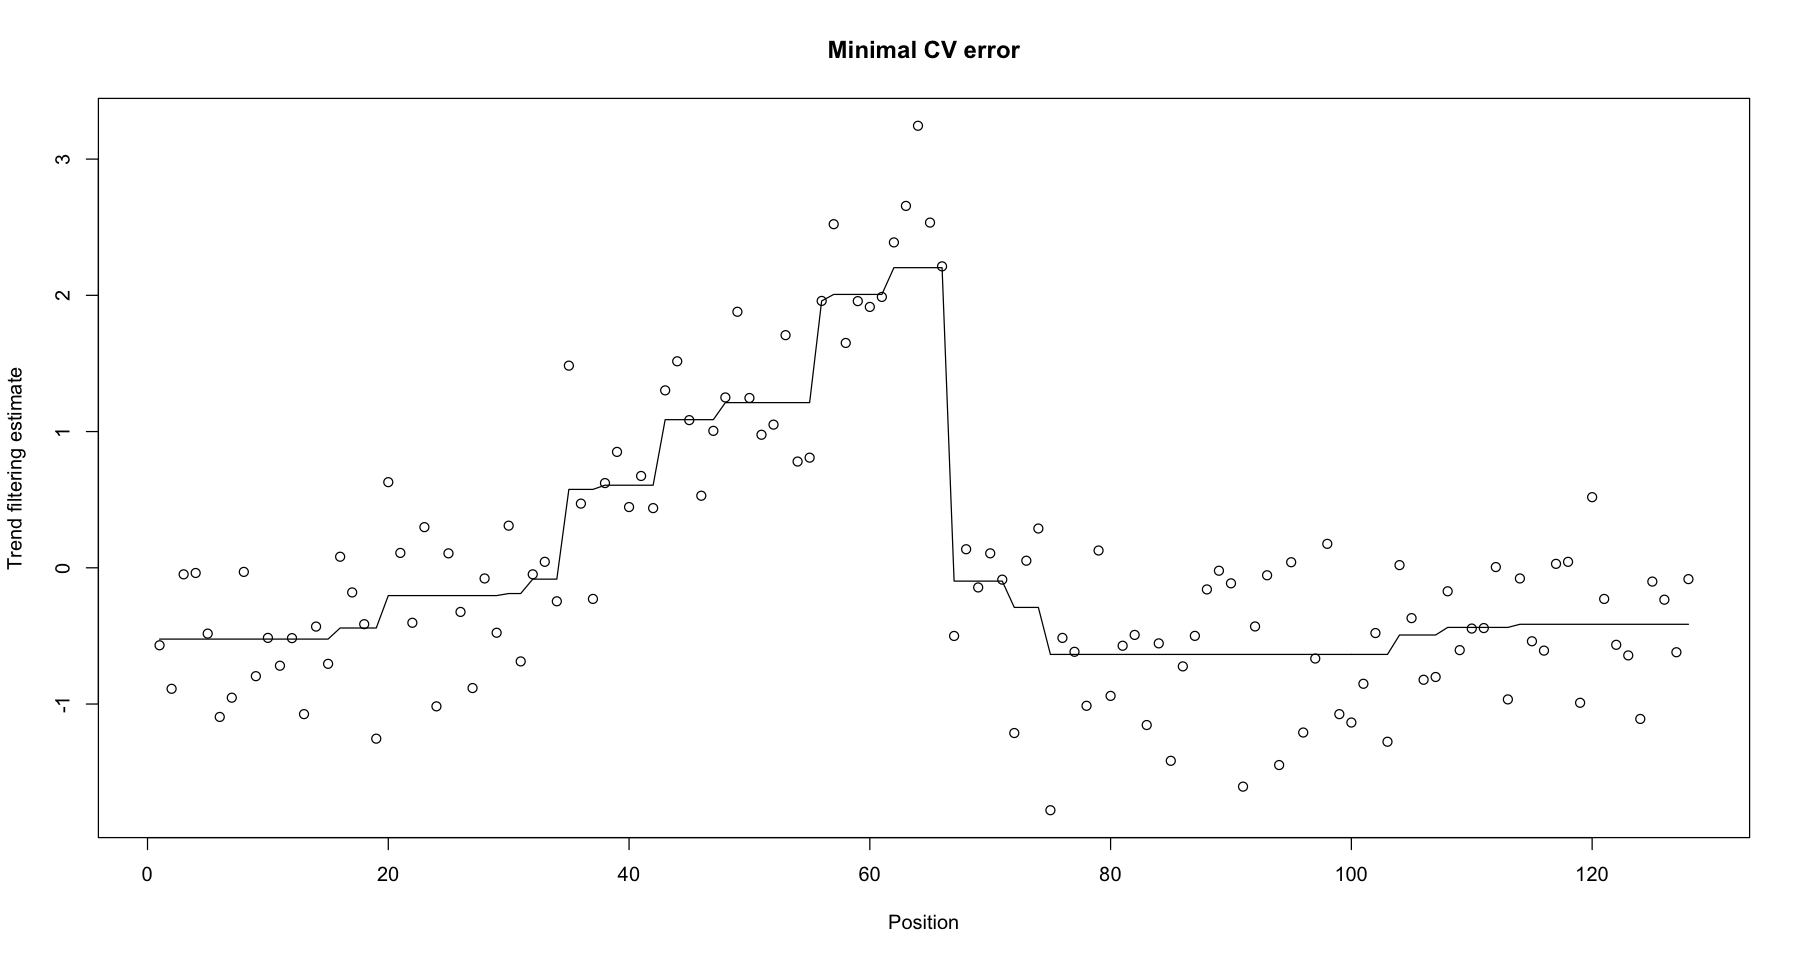

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


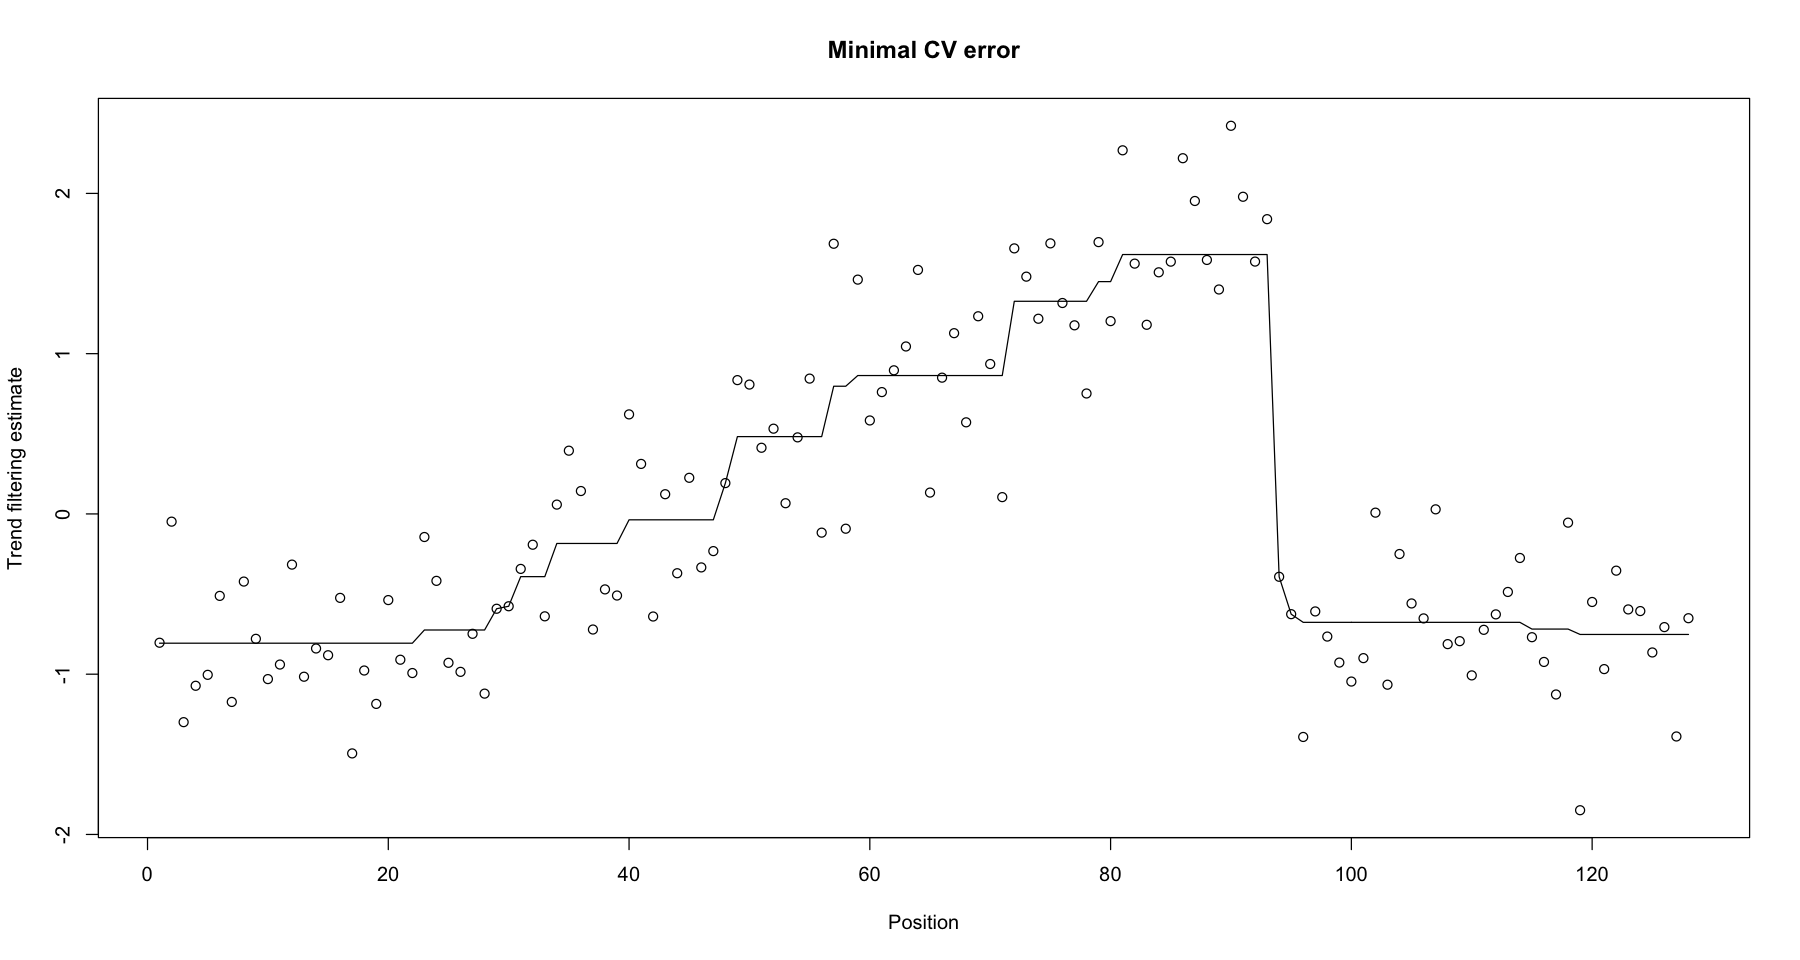

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


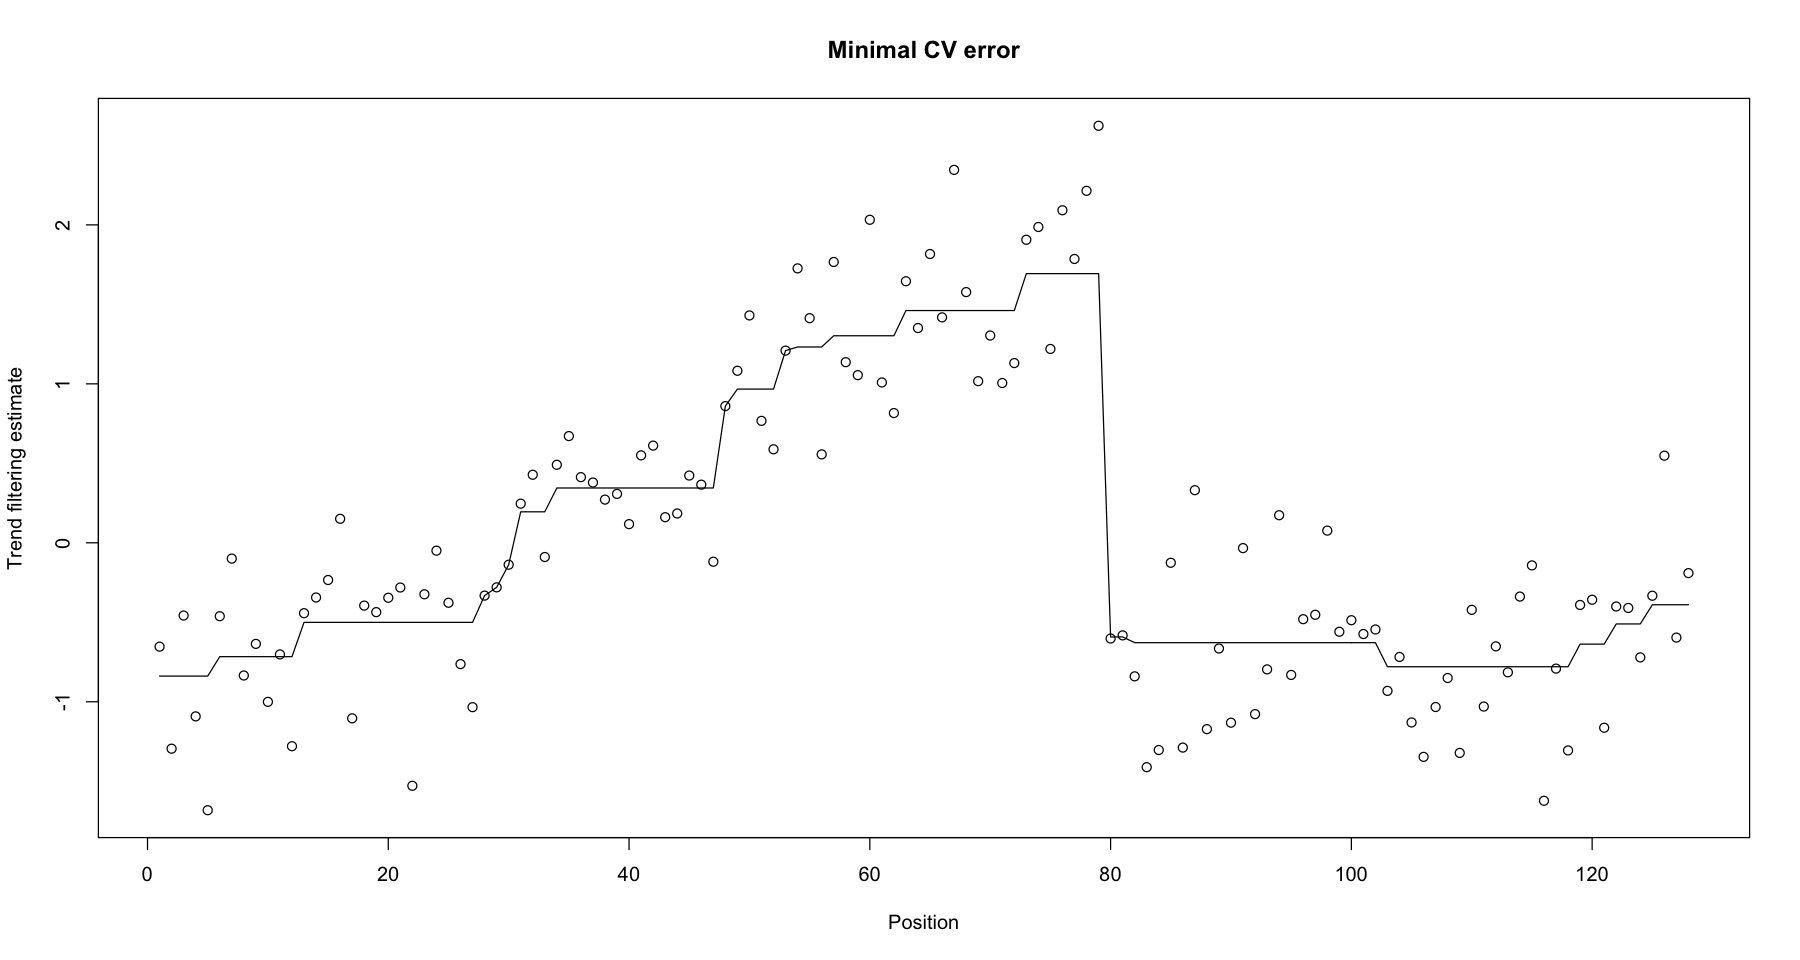

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


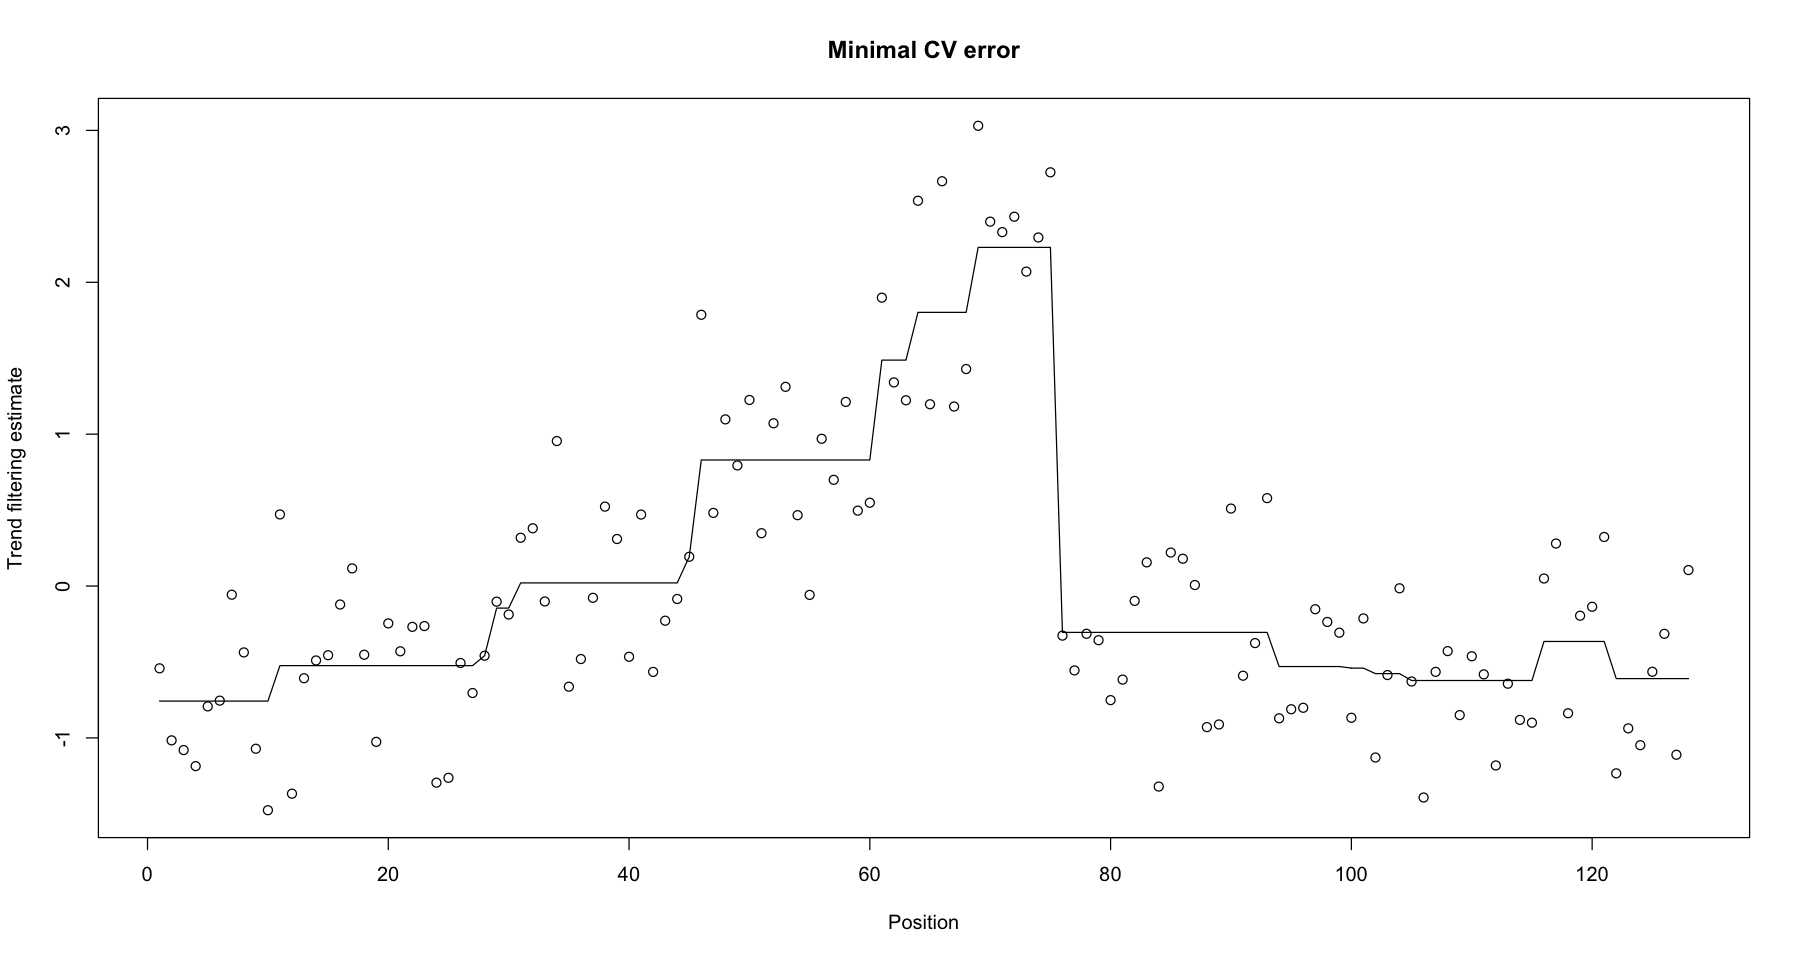

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


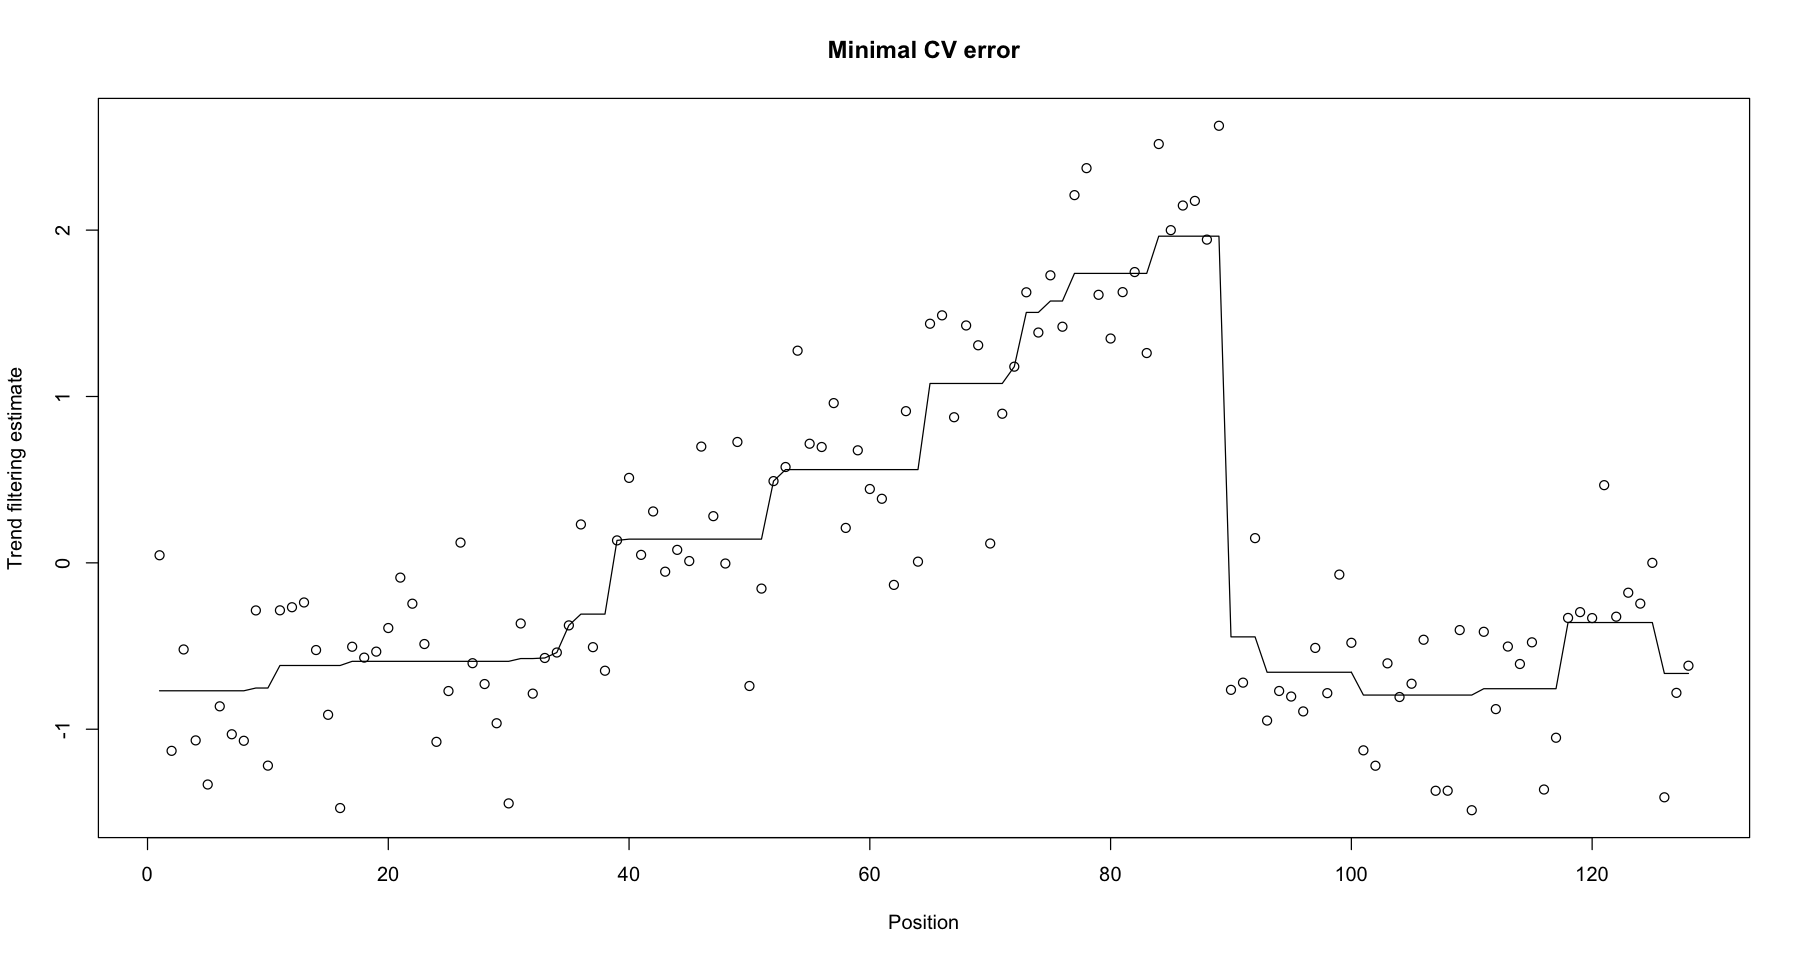

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


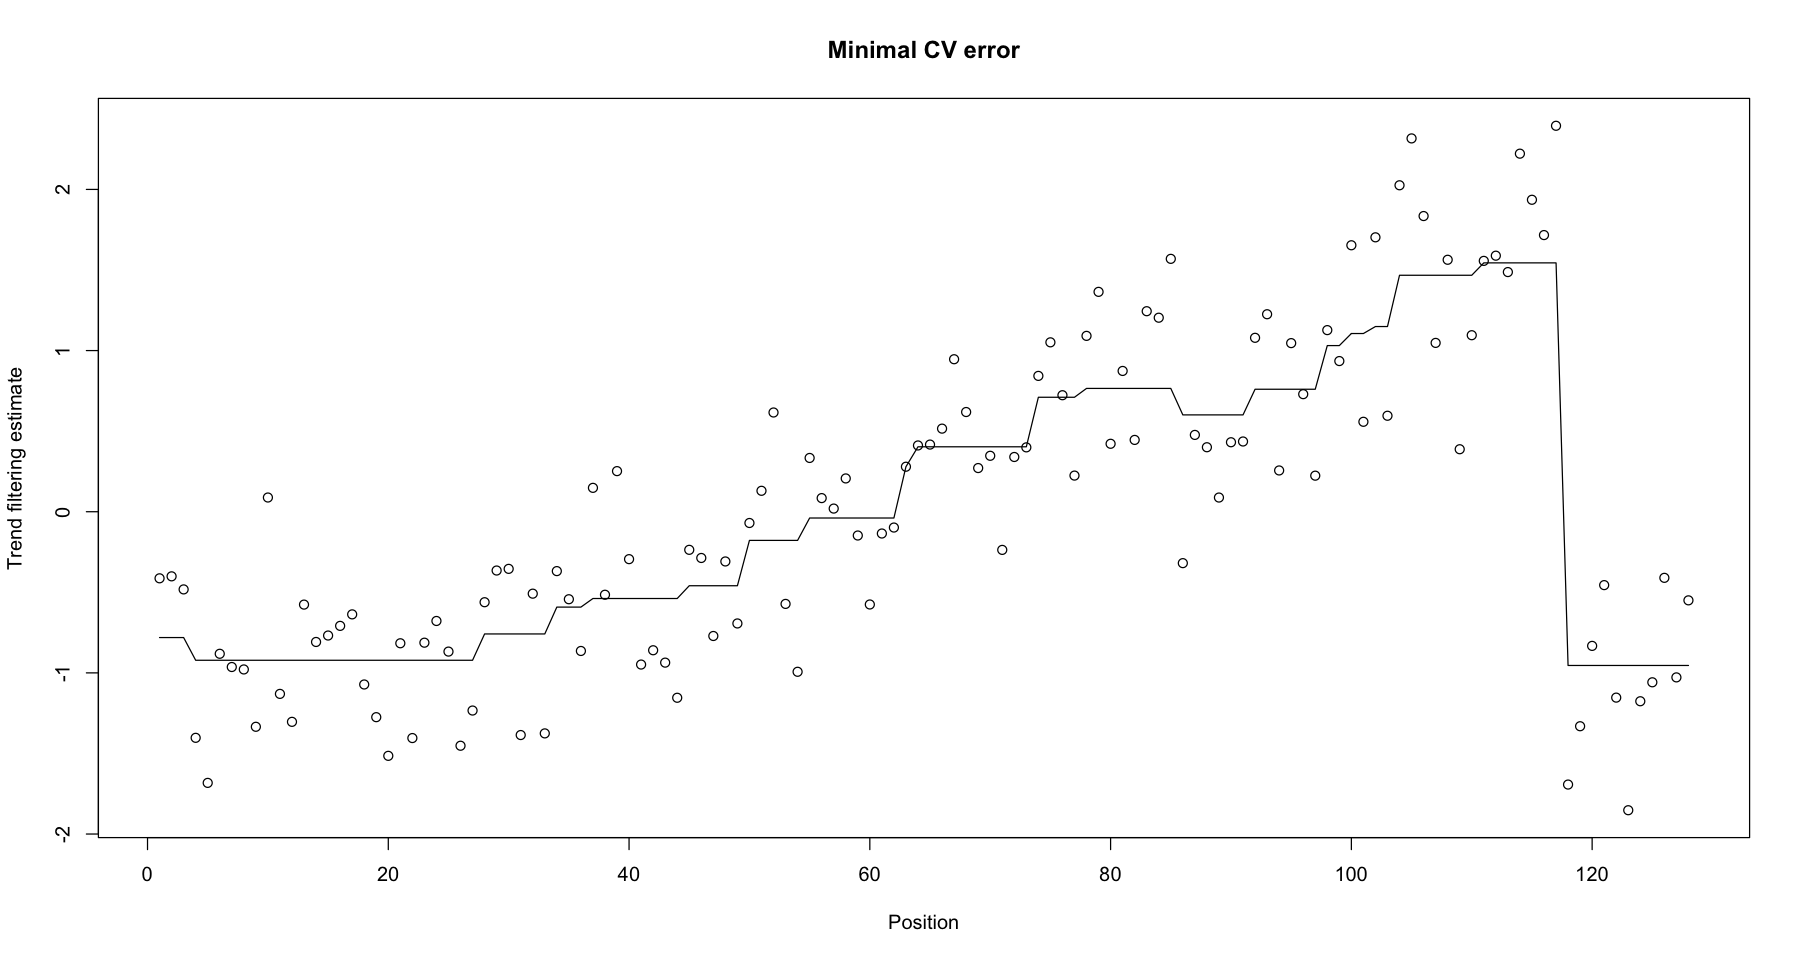

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


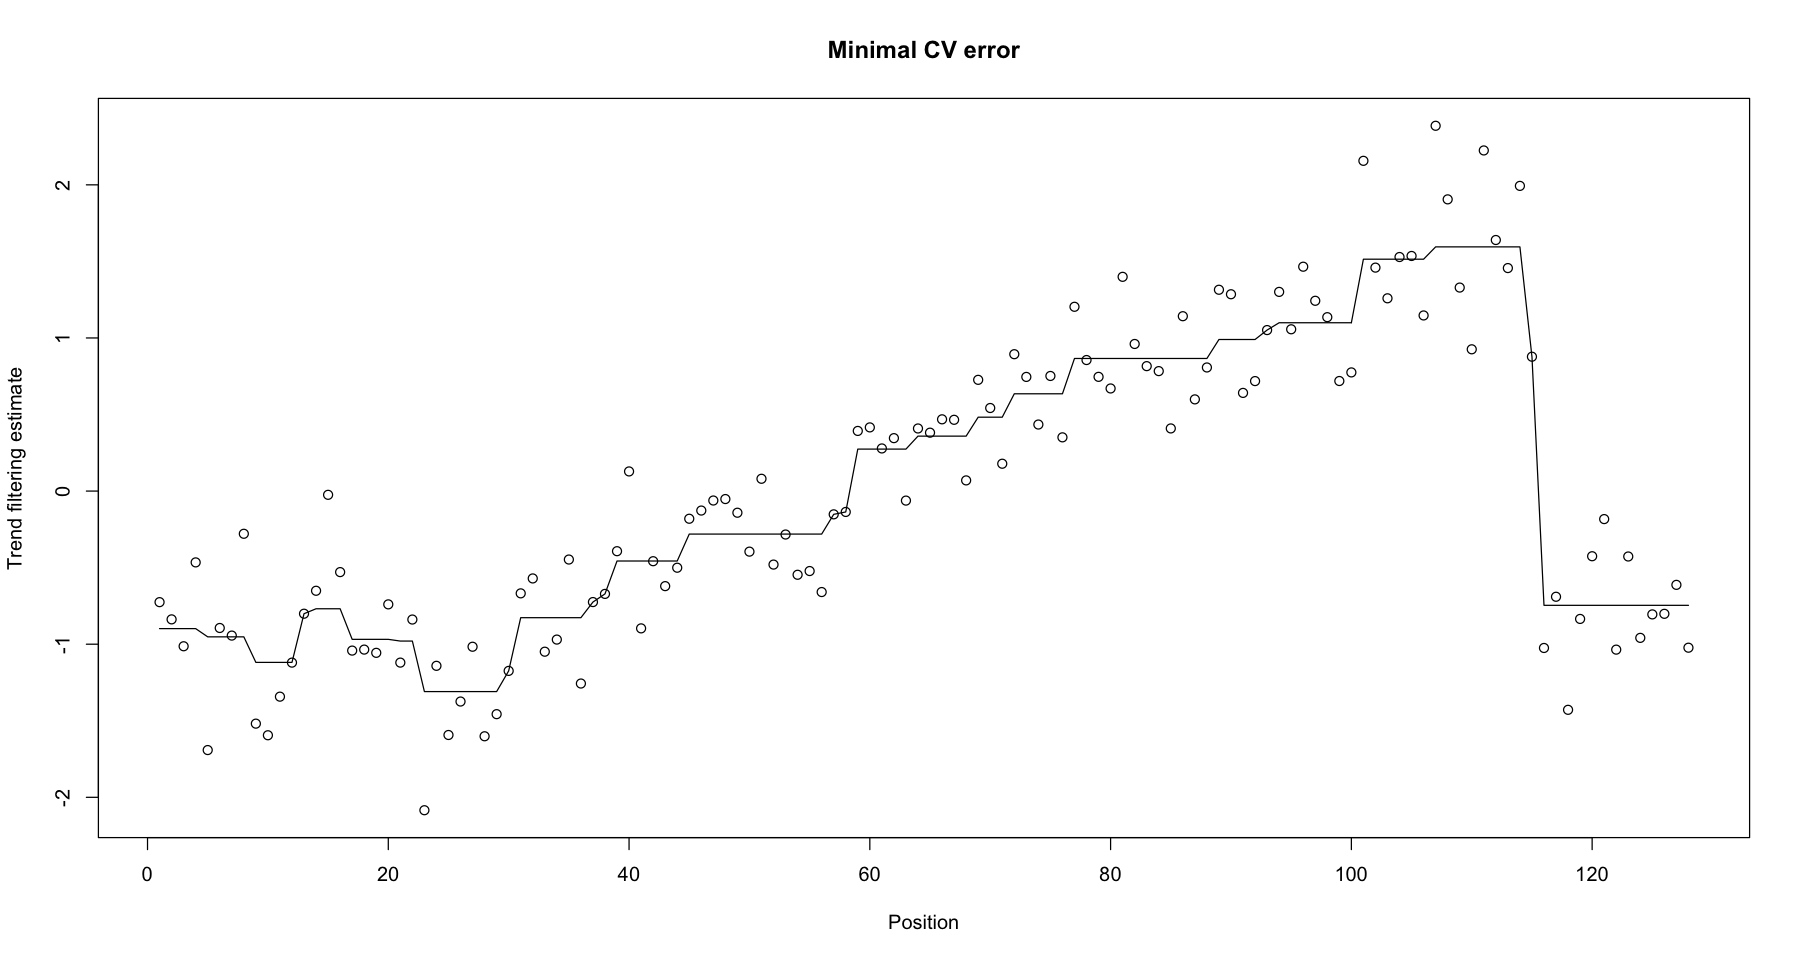

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


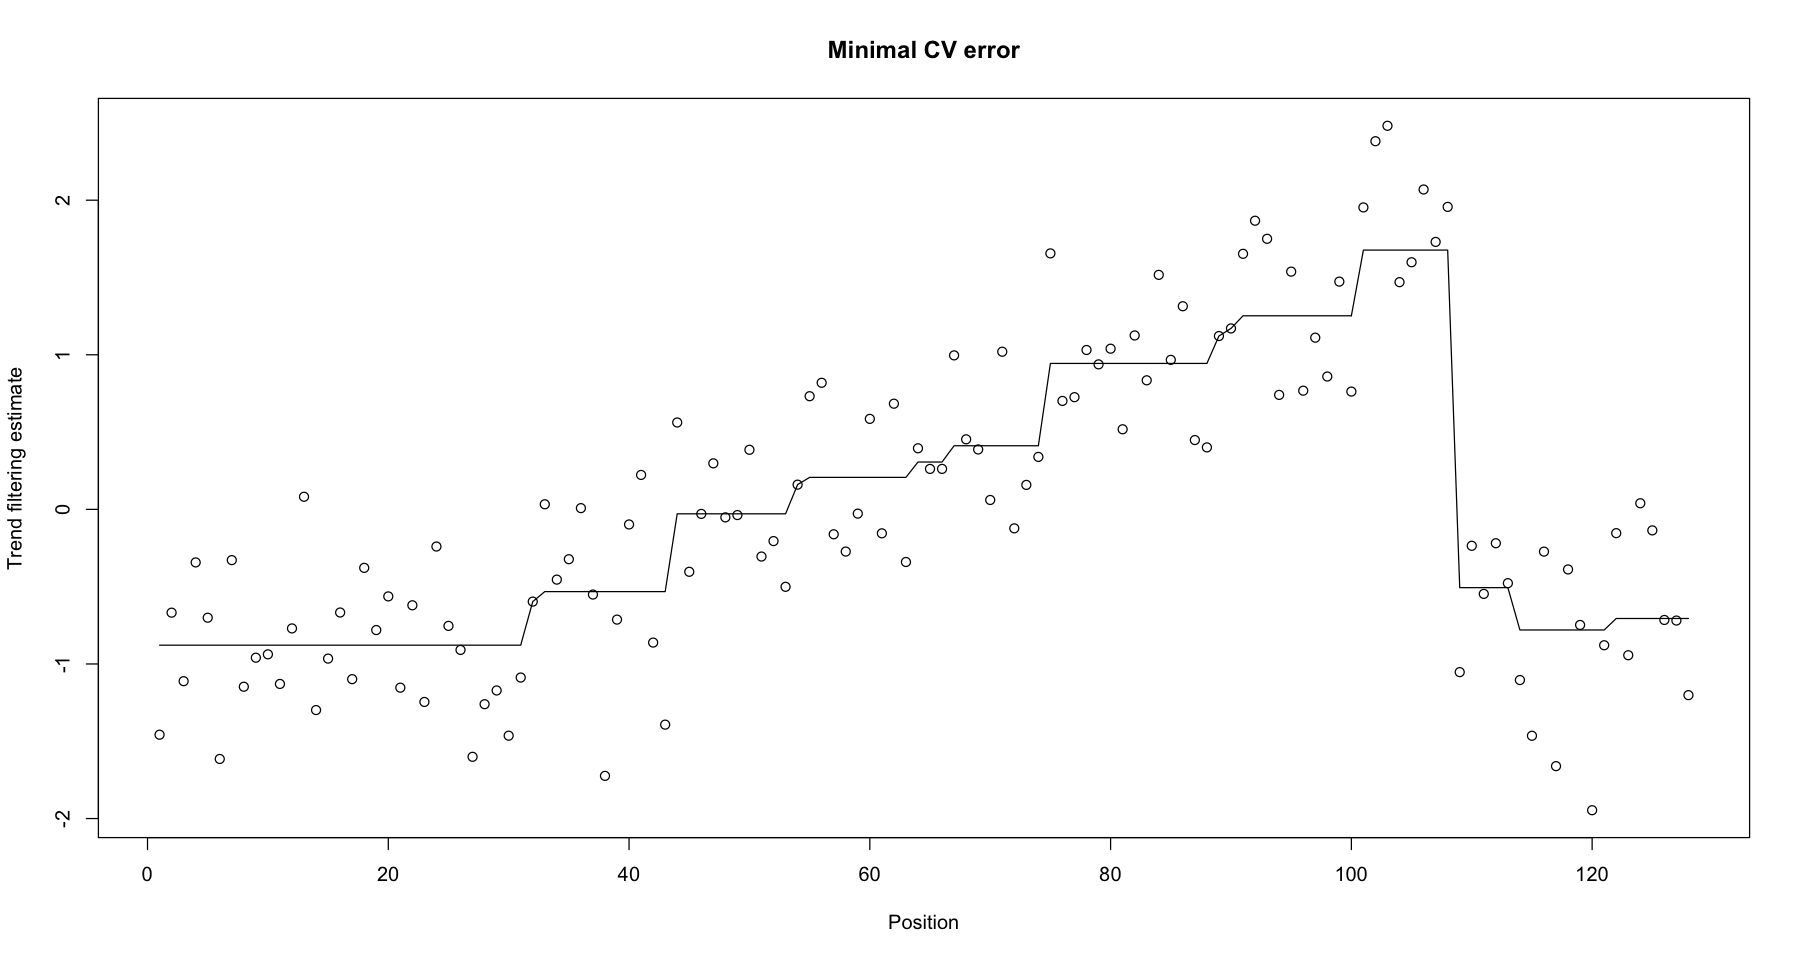

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


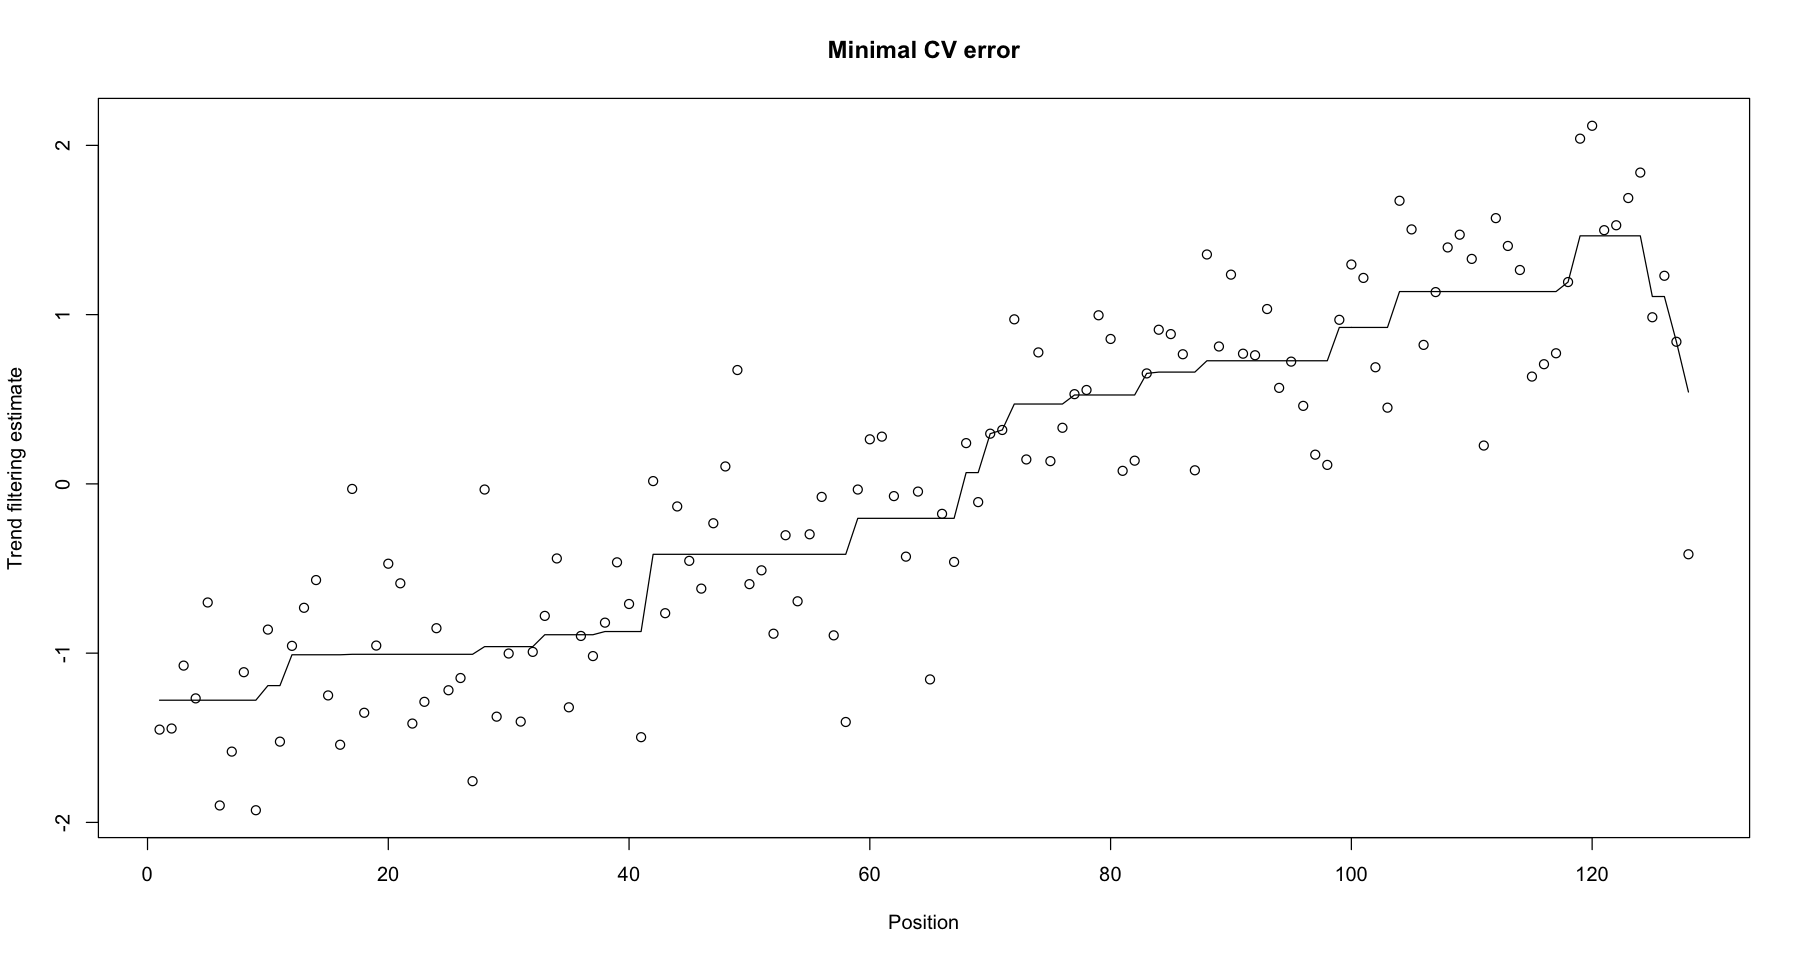

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


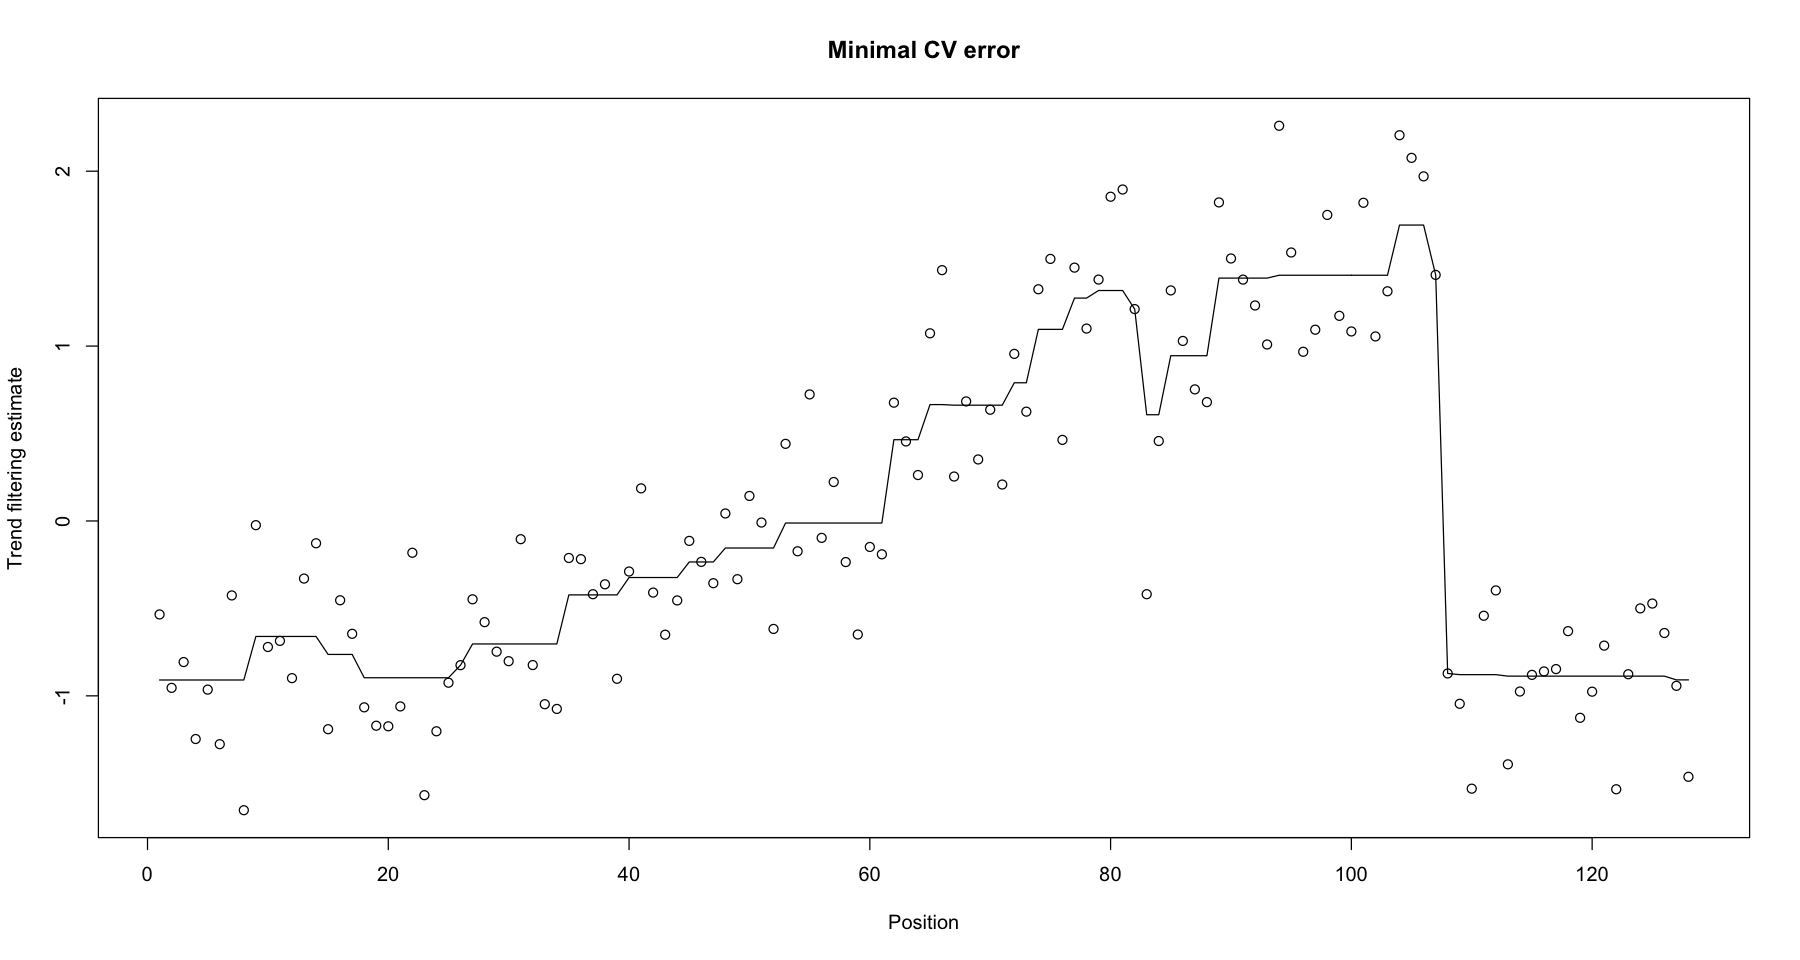

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


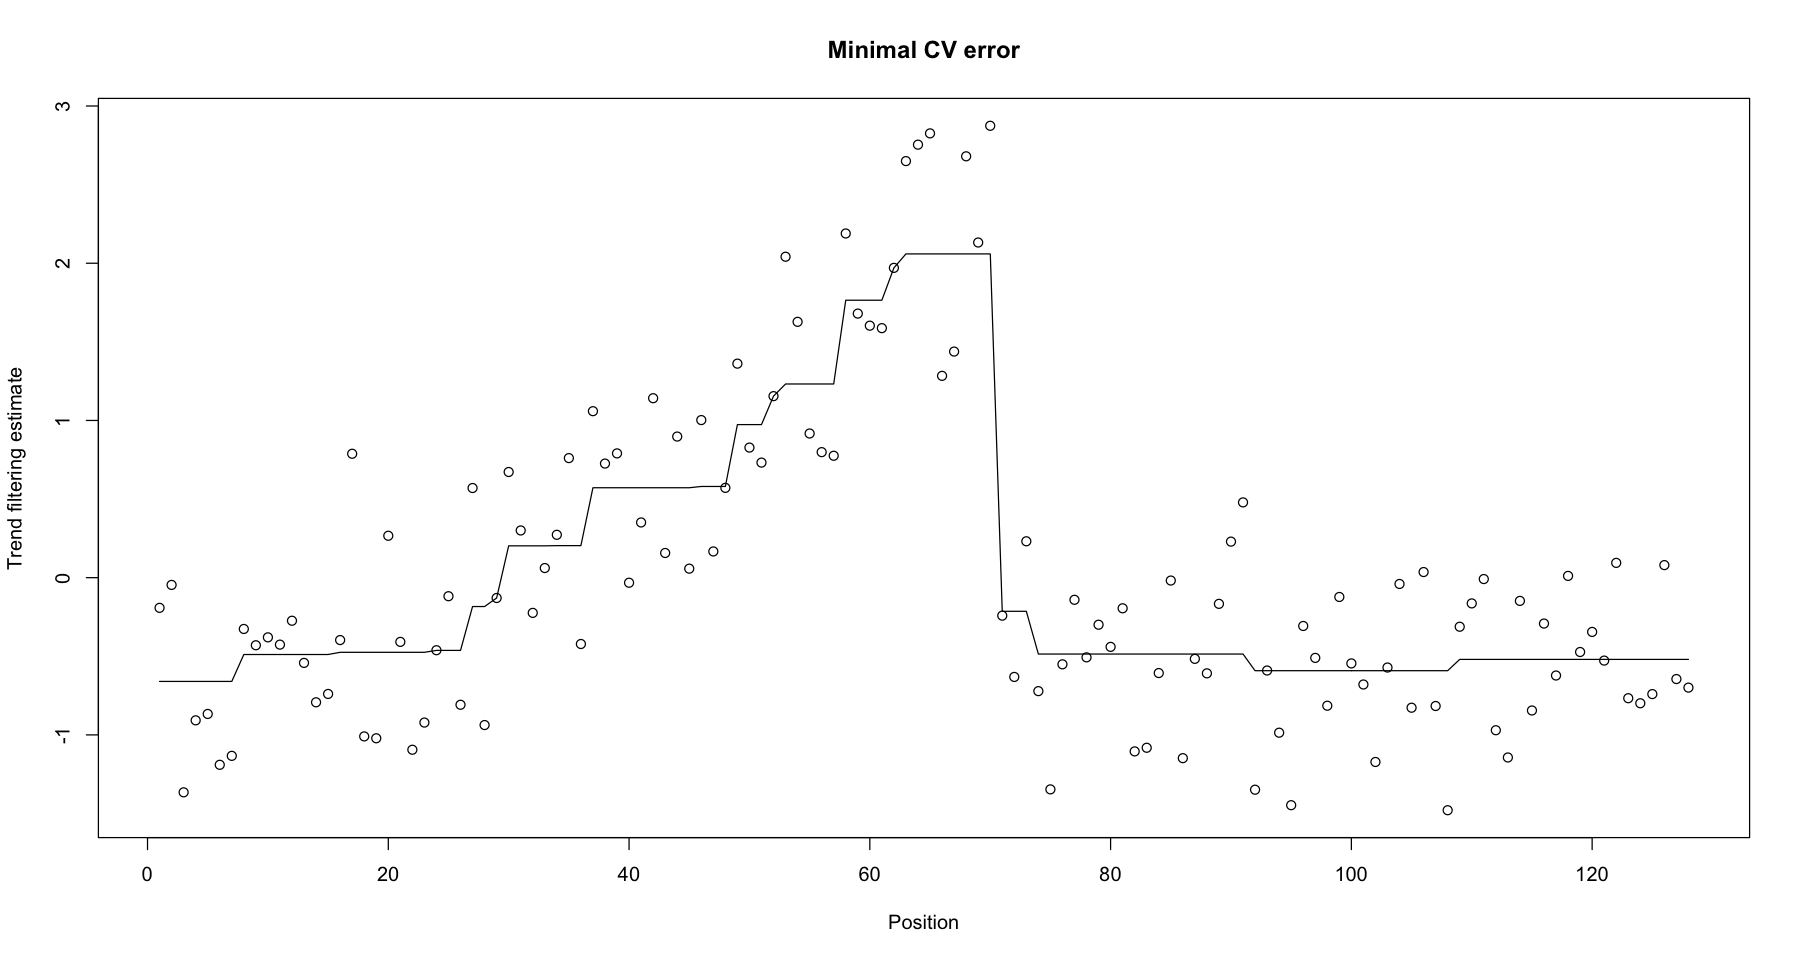

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


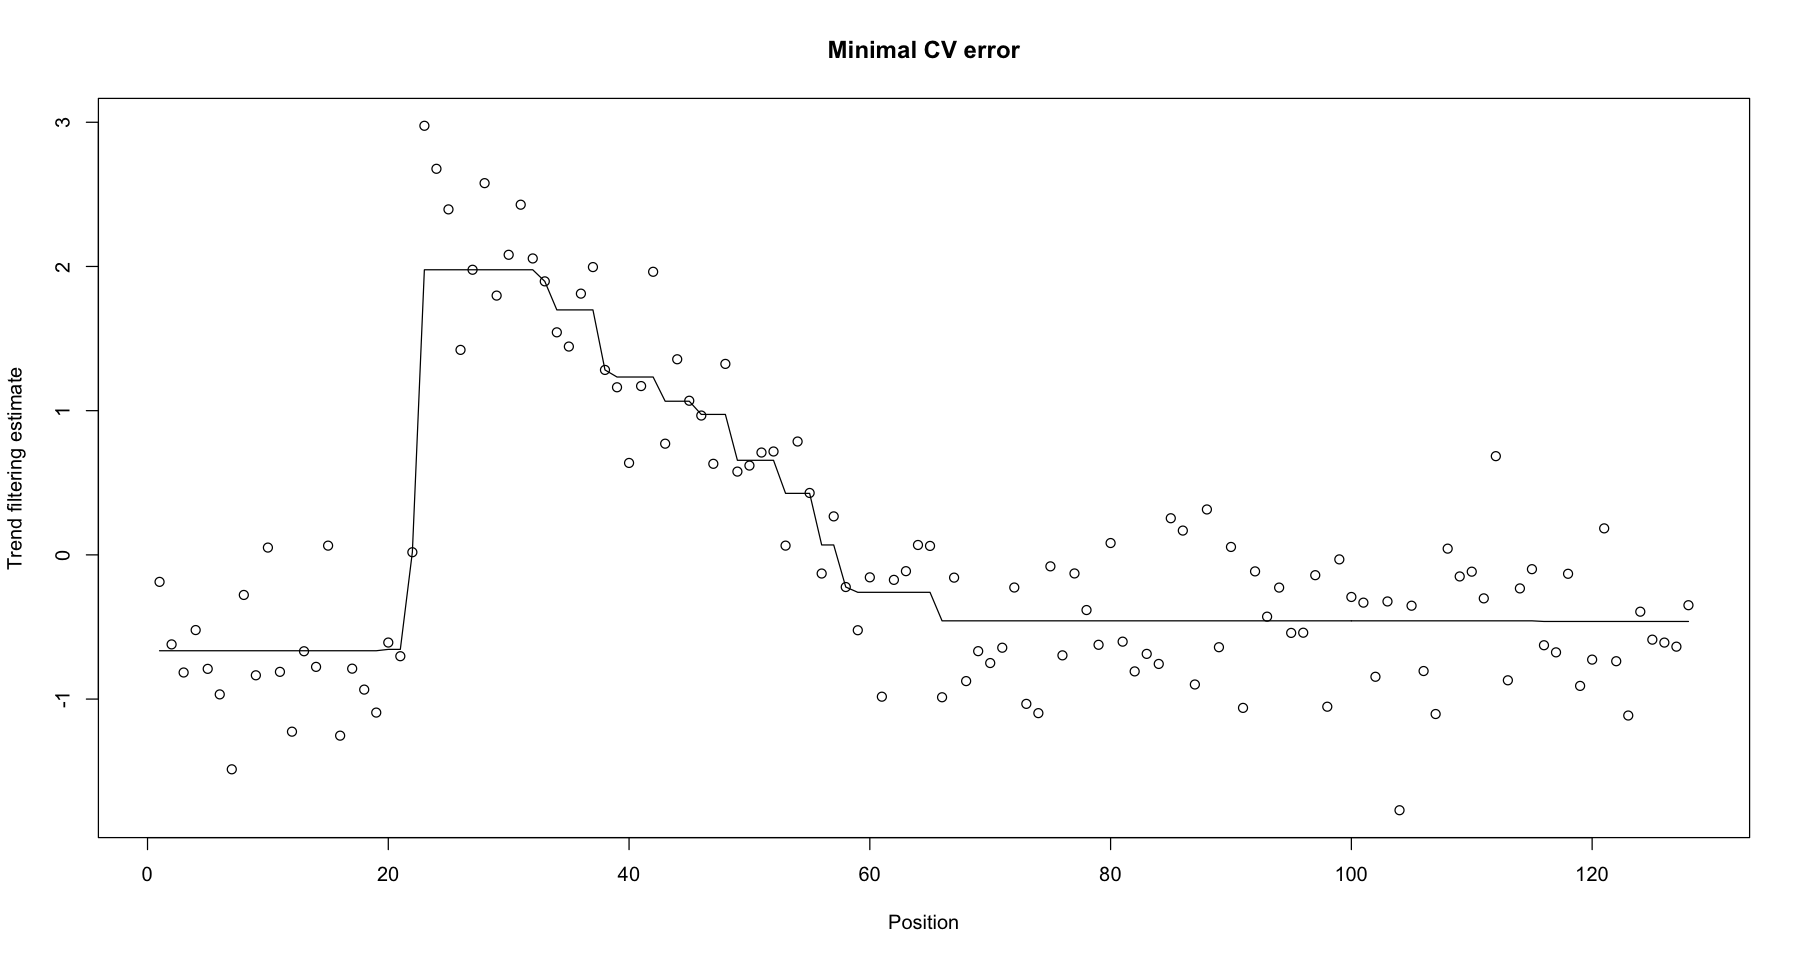

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


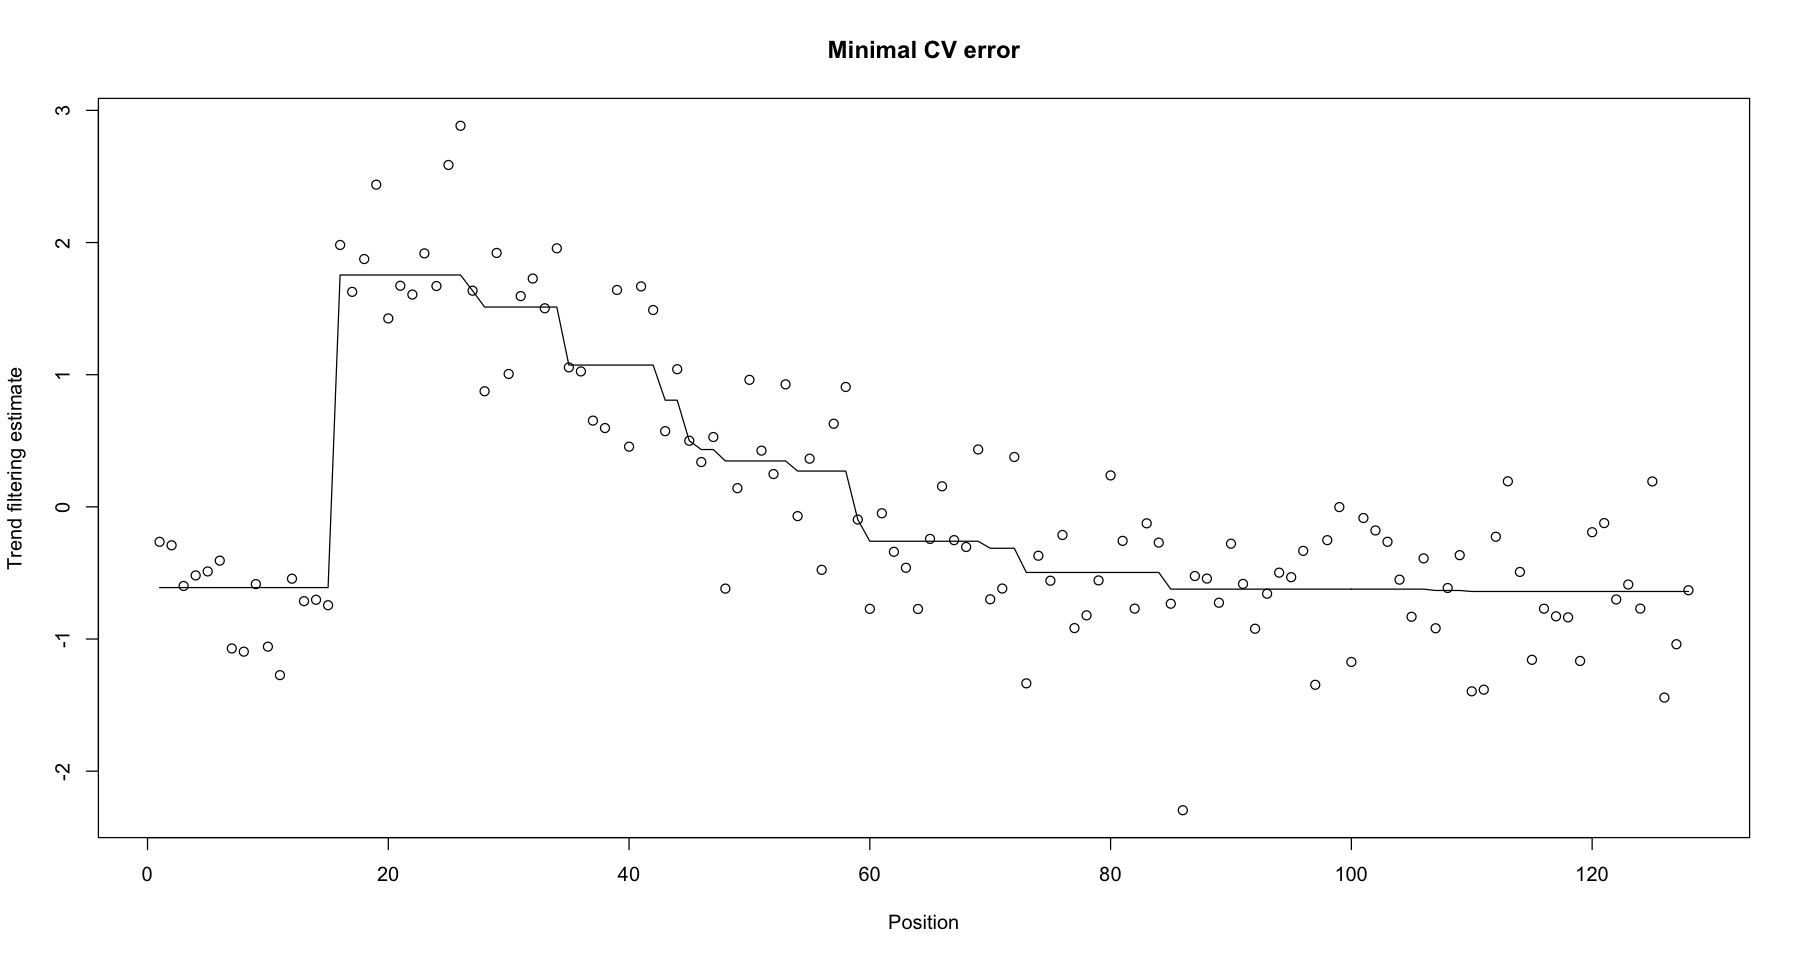

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


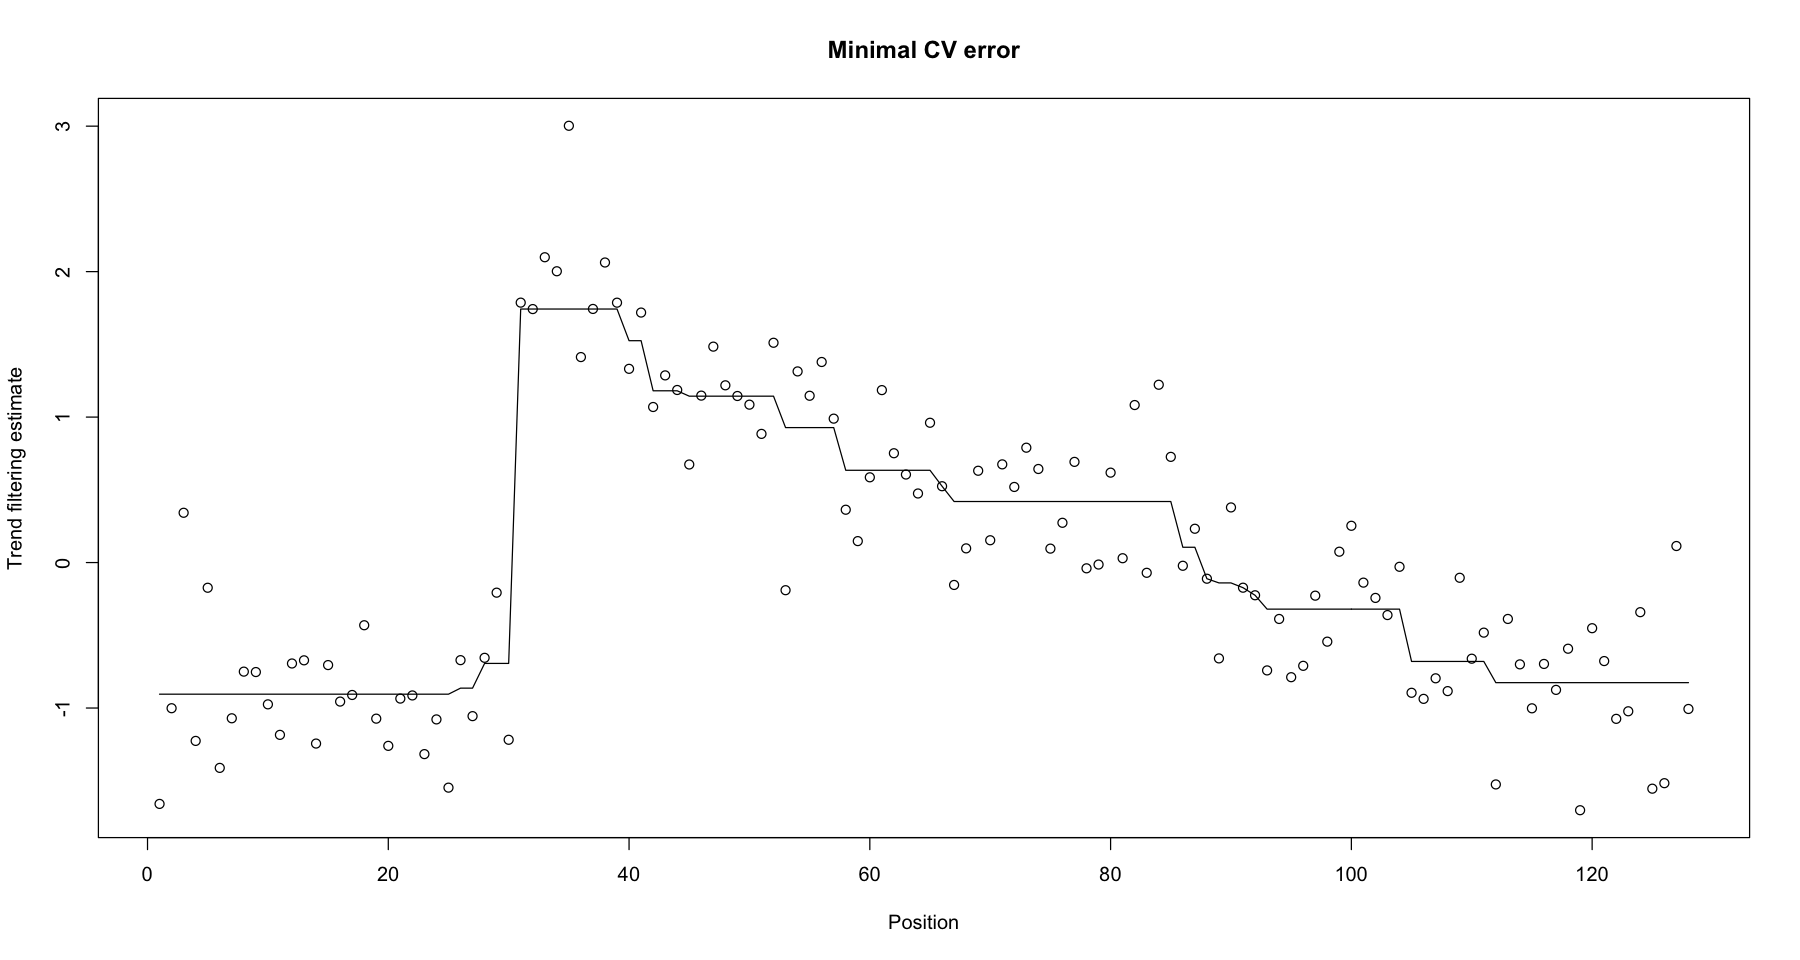

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


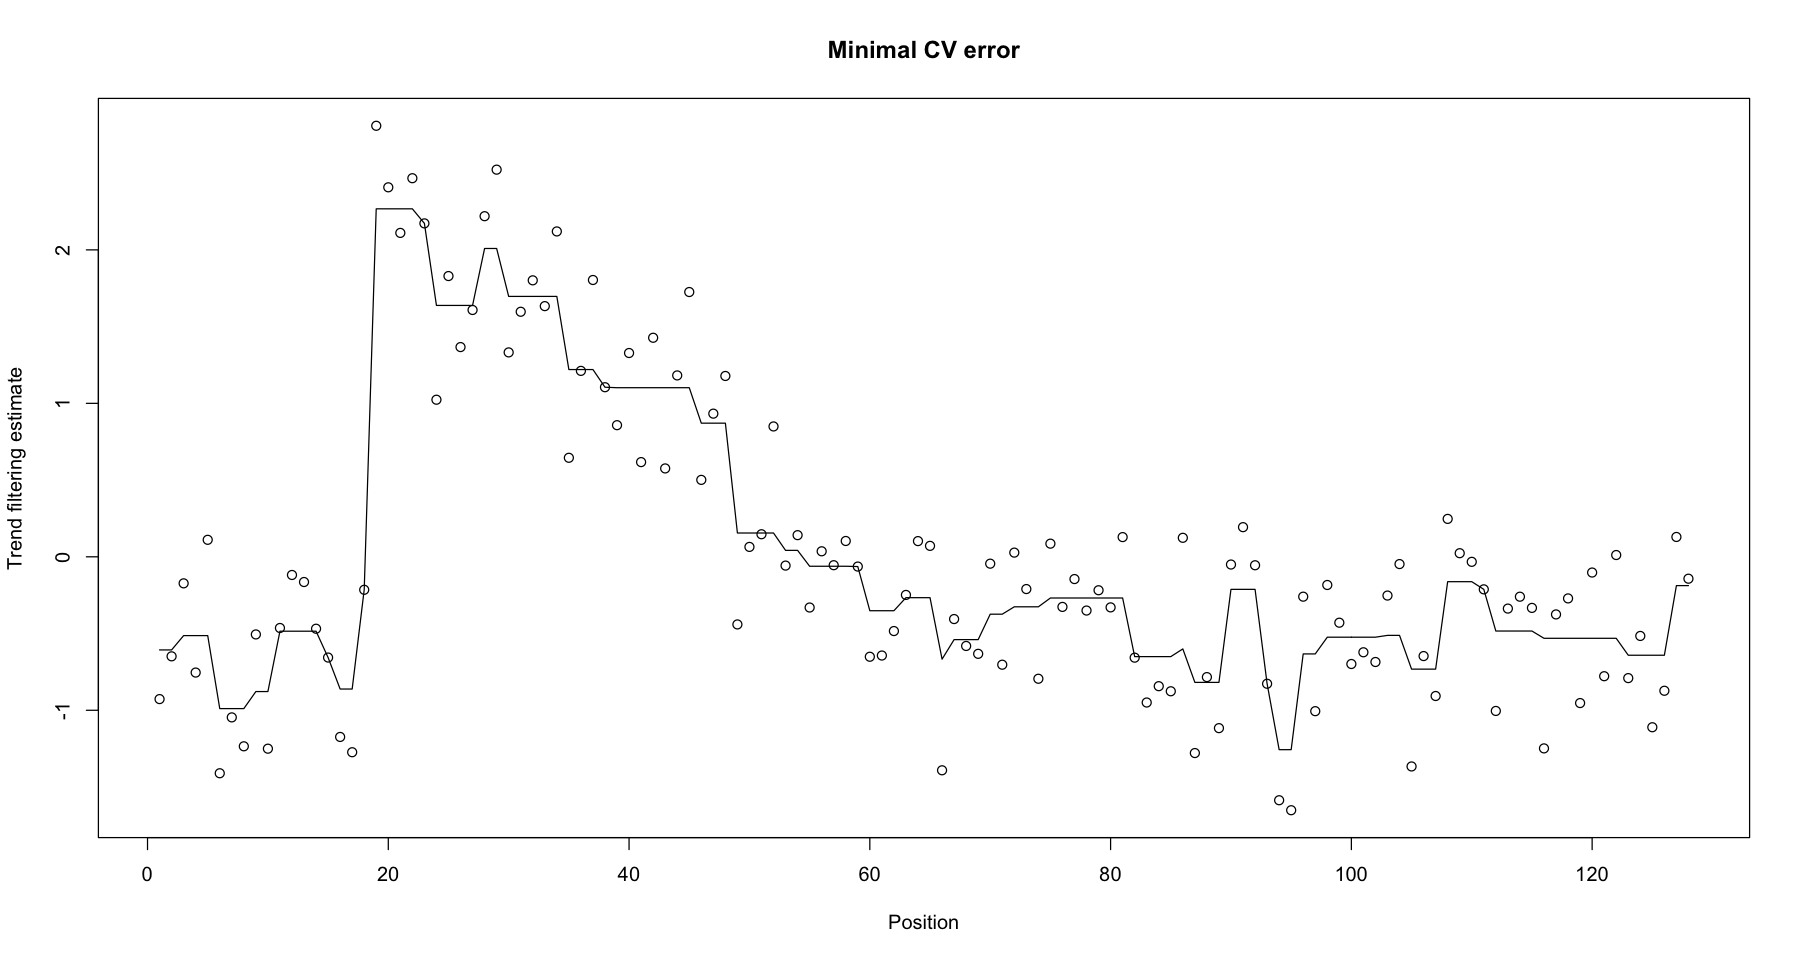

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


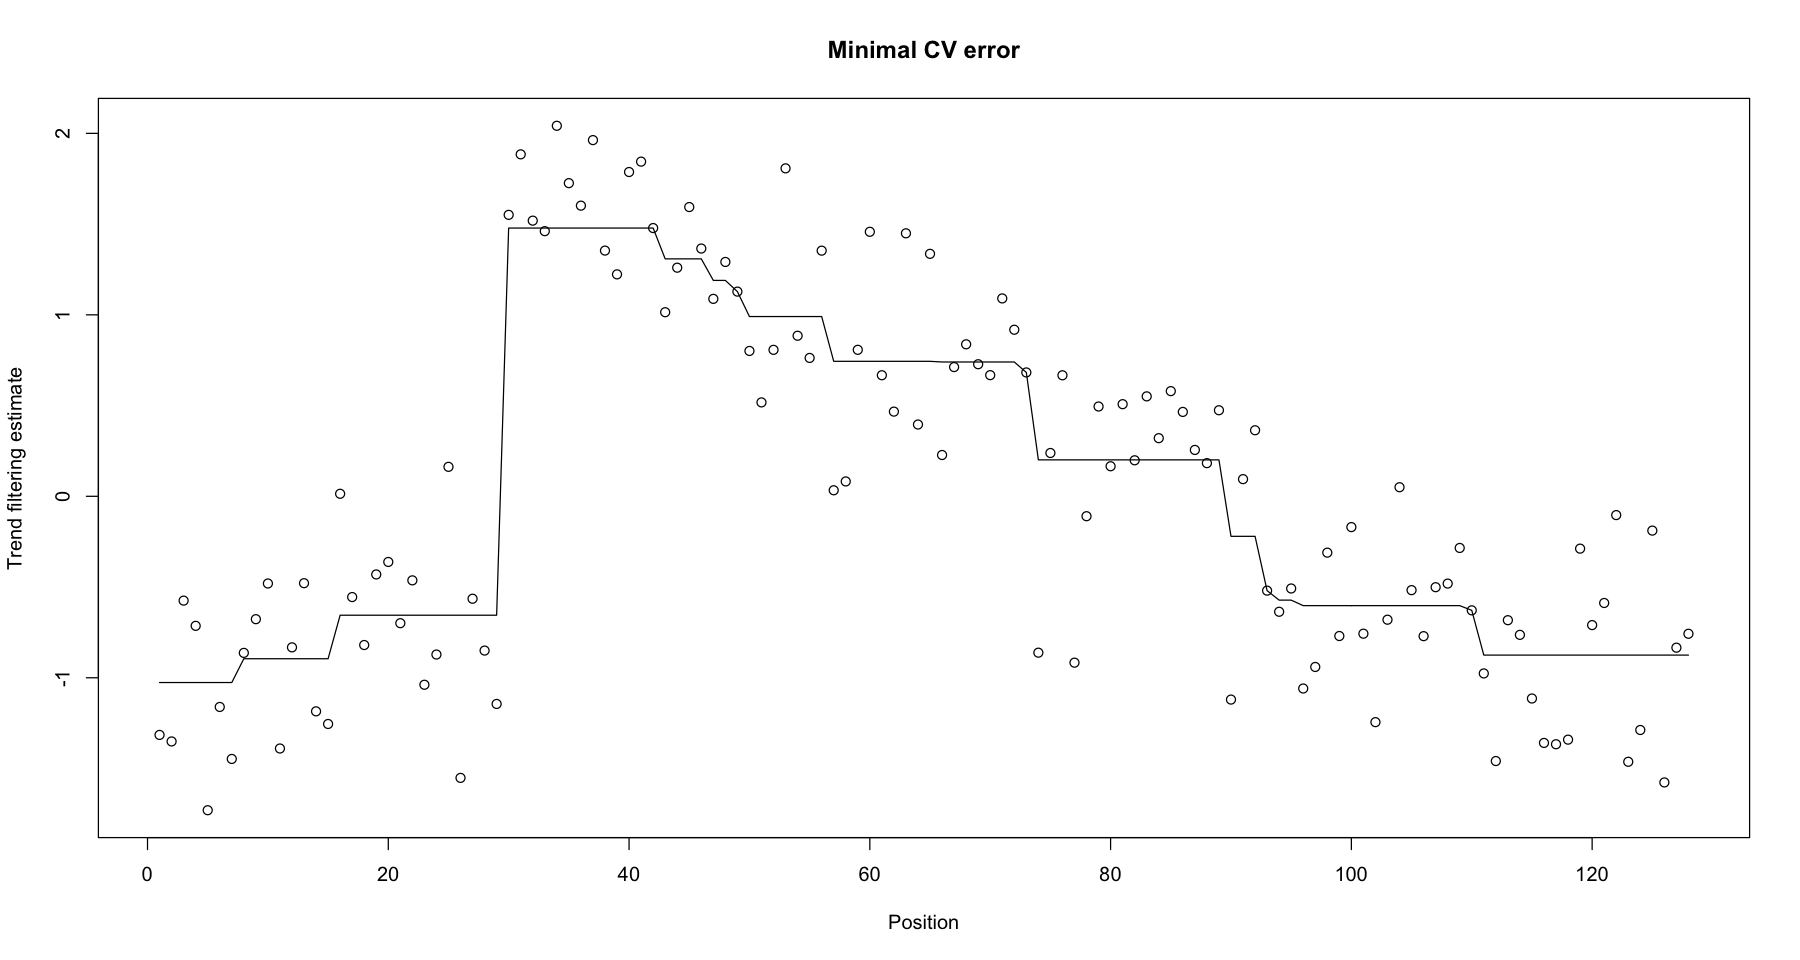

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


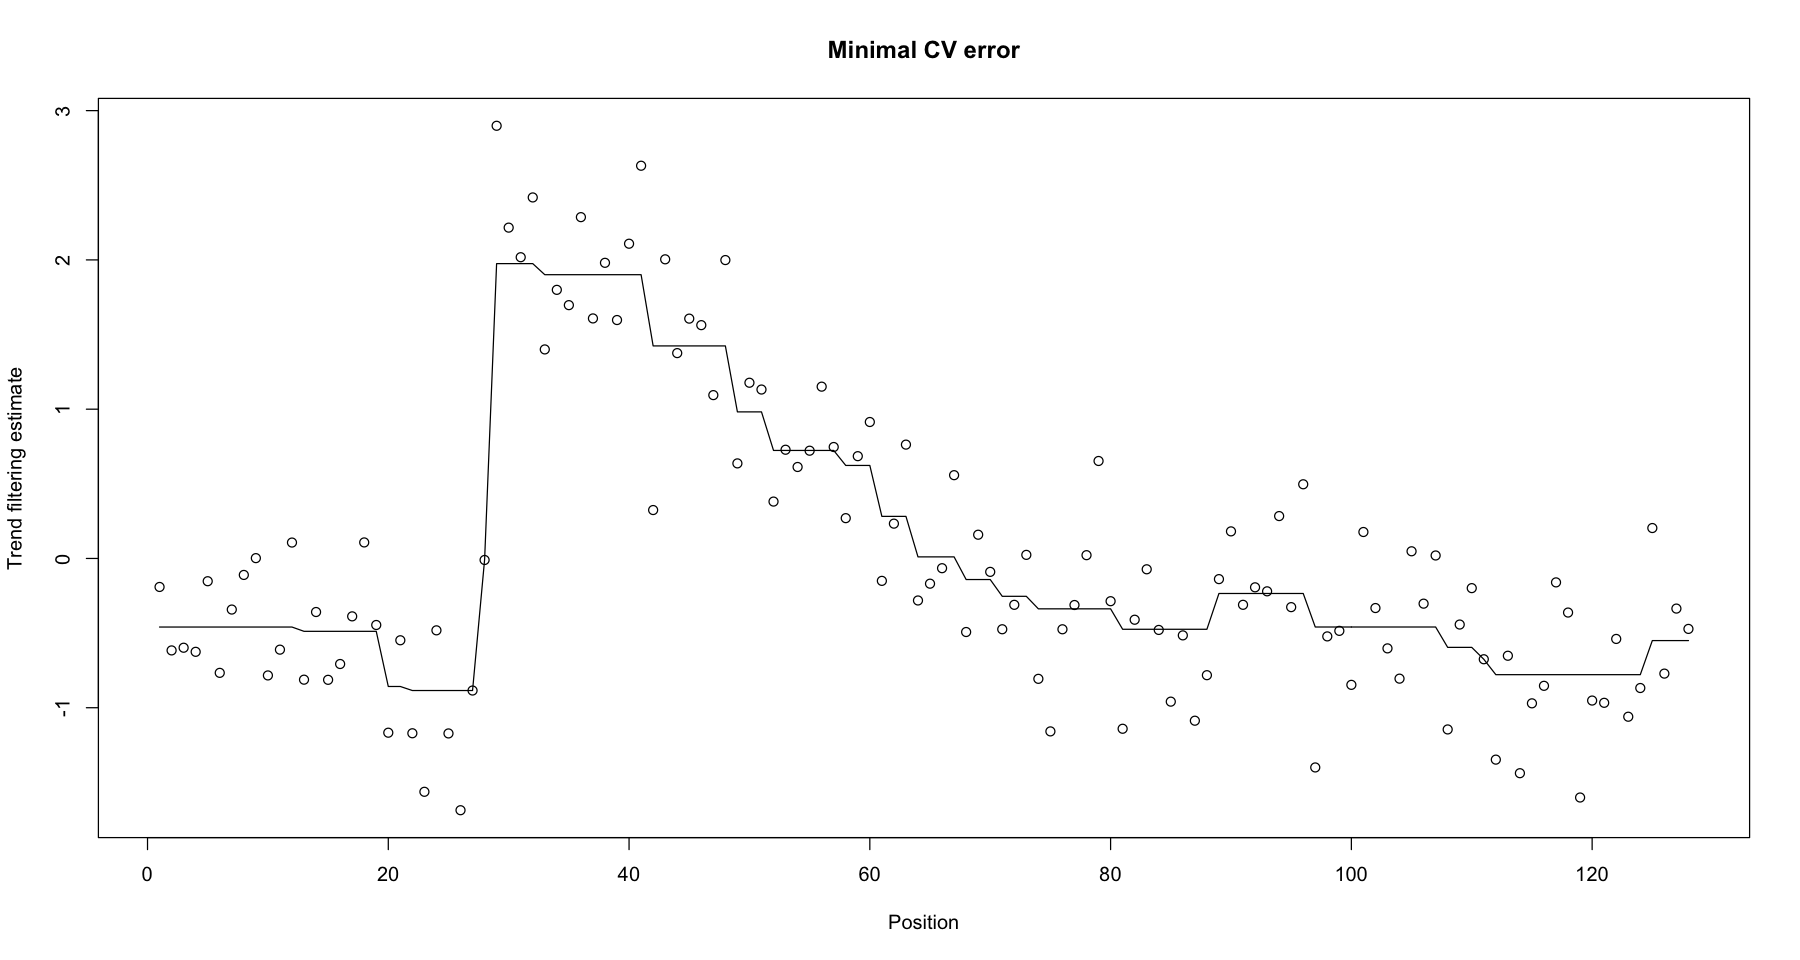

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


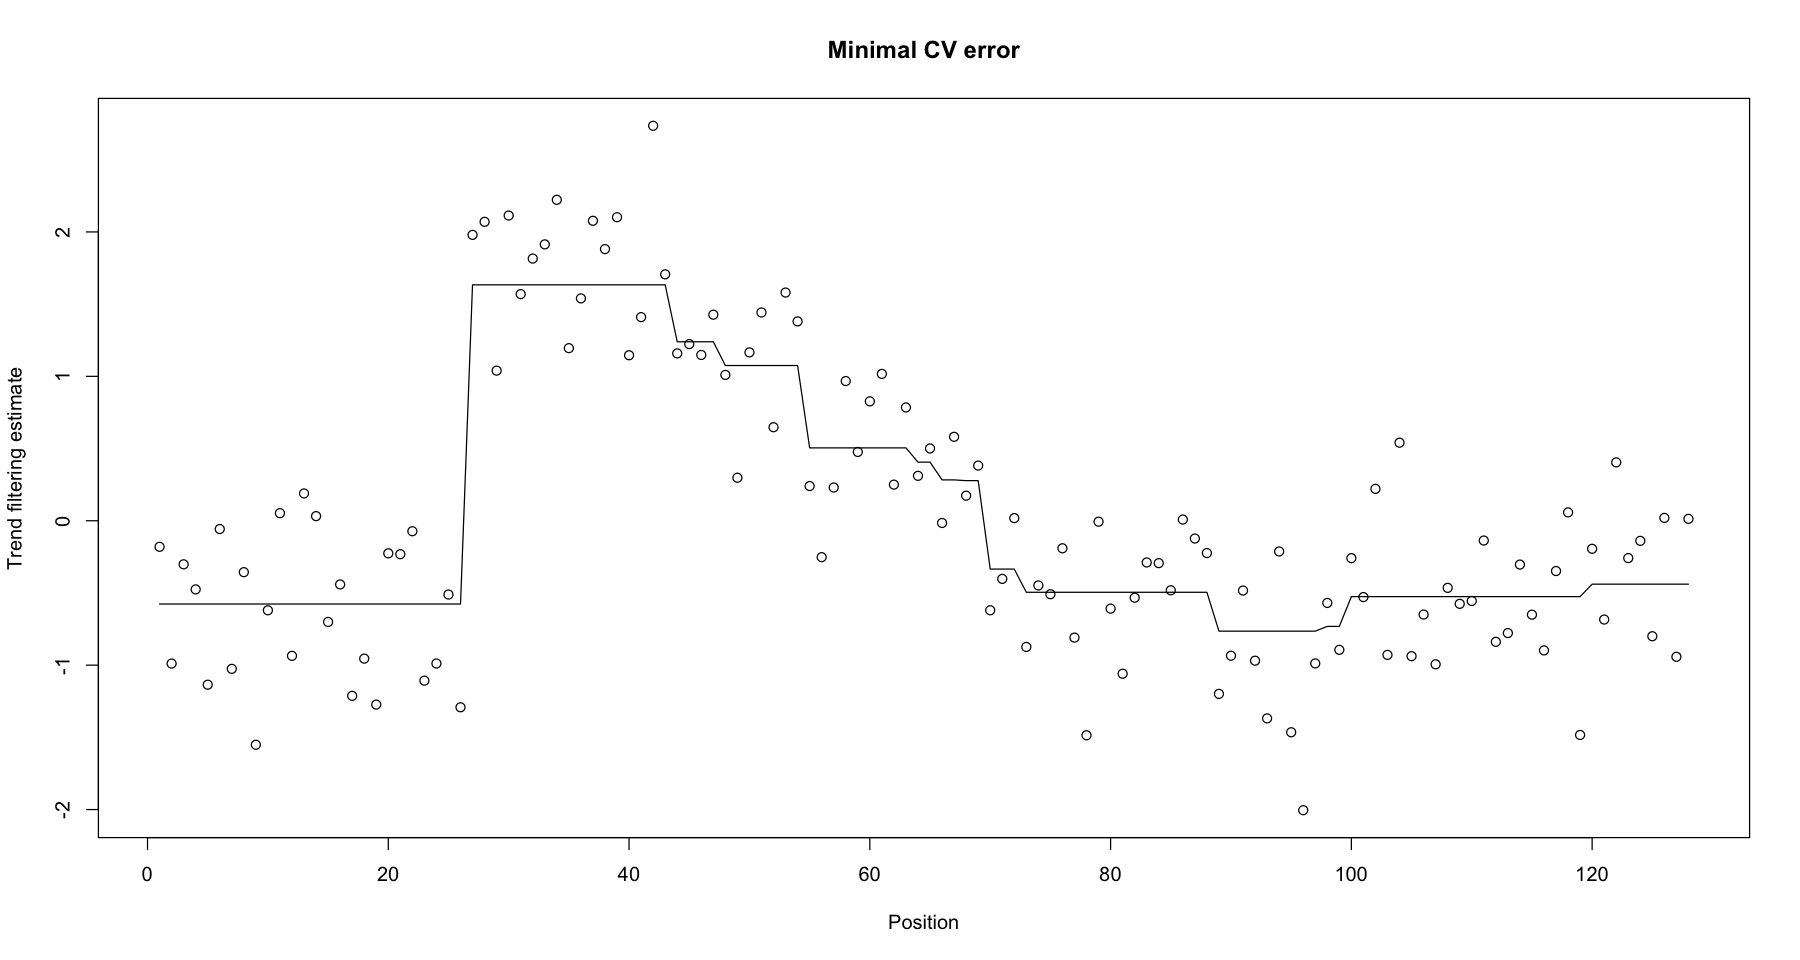

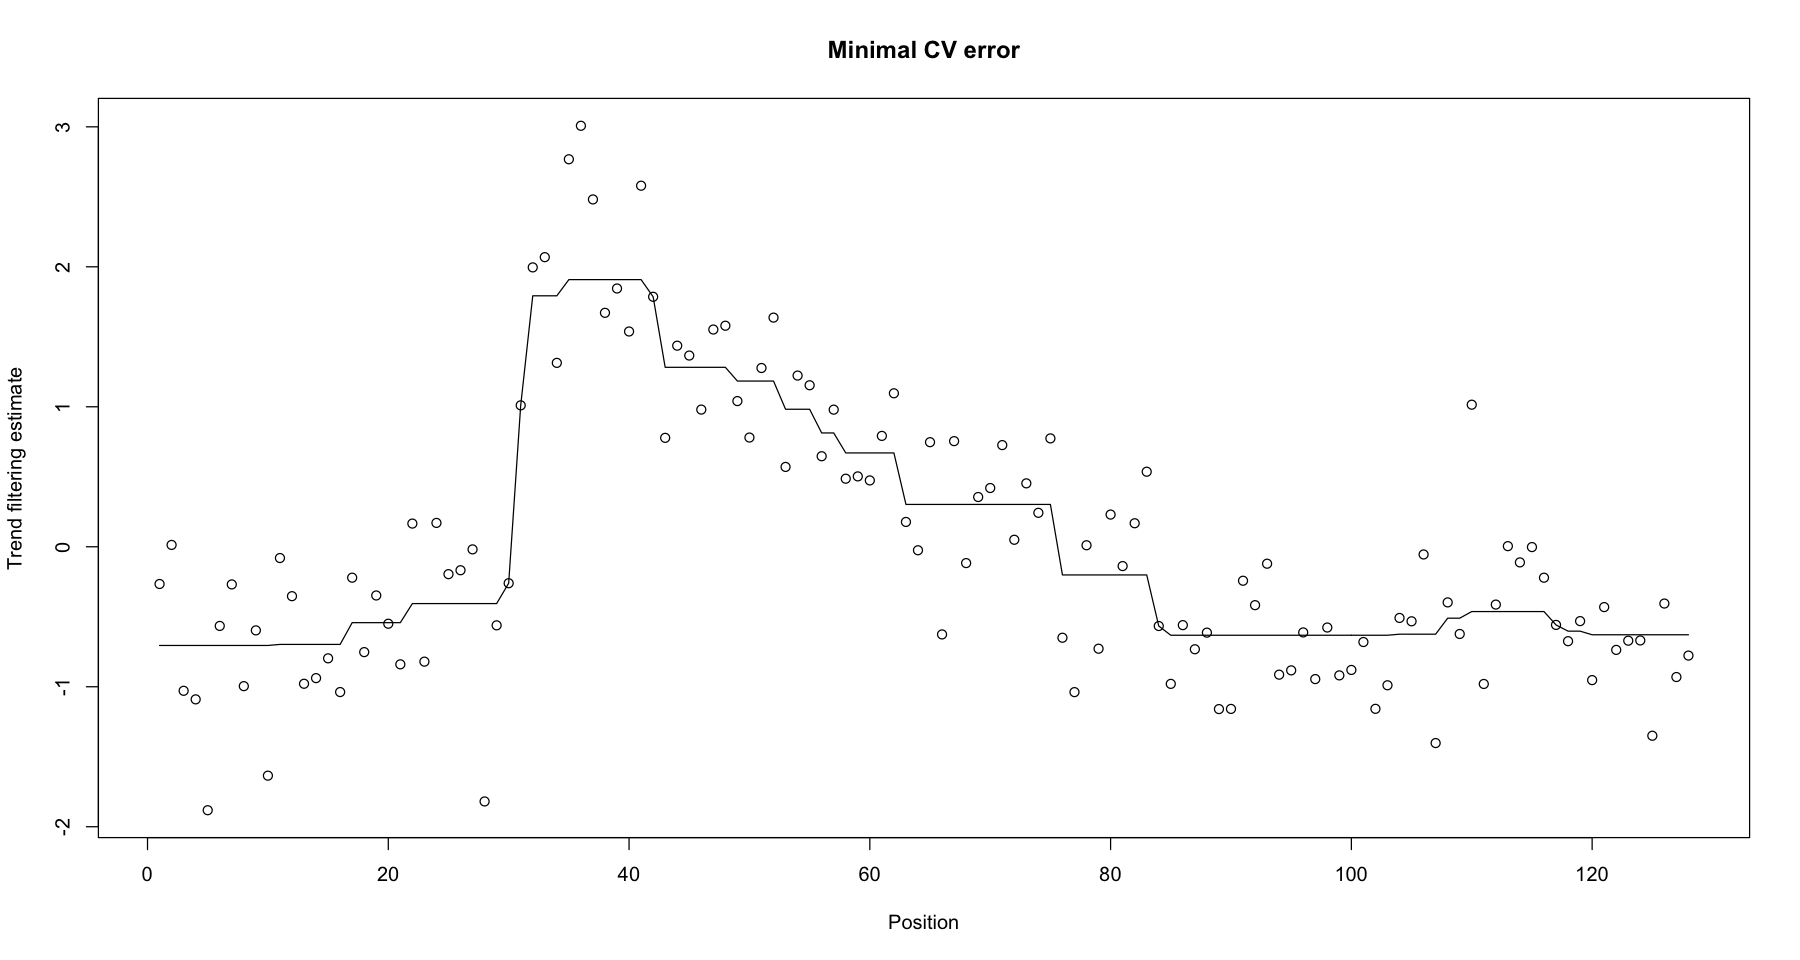

In [369]:
long_train=long_train[order(id,time)]
fit_b <- data.table()
for (selected_series in 1: max(long_train$id)){
data_ts=long_train[id==selected_series]$value
a= fusedlasso1d(data_ts)
cv = cv.trendfilter(a,k=10)
plot(a,lambda=cv$lambda.min,main="Minimal CV error")
lambda_min<-round(cv$lambda.min,3)  
b<-data.table(a$fit)
b[,id:=selected_series]
long_train_b=melt(b,id.vars=c('id'))
long_train_b[,lambda:=as.numeric(gsub("\\D", ".", variable))]
long_train_b=long_train_b[,list(lambda,value)]
long_train_b=long_train_b[order(lambda)]
long_train_b=long_train_b[lambda==lambda_min]$value
fit_b<- fit_b %>% rbind(long_train_b)
}
long_train_lasso <- data.table(long_train,fit_b)

Getting Squared error for each estimation <br>
Compute the mean squared error for each id <br>
Boxplot of mean squared errors of lasso 

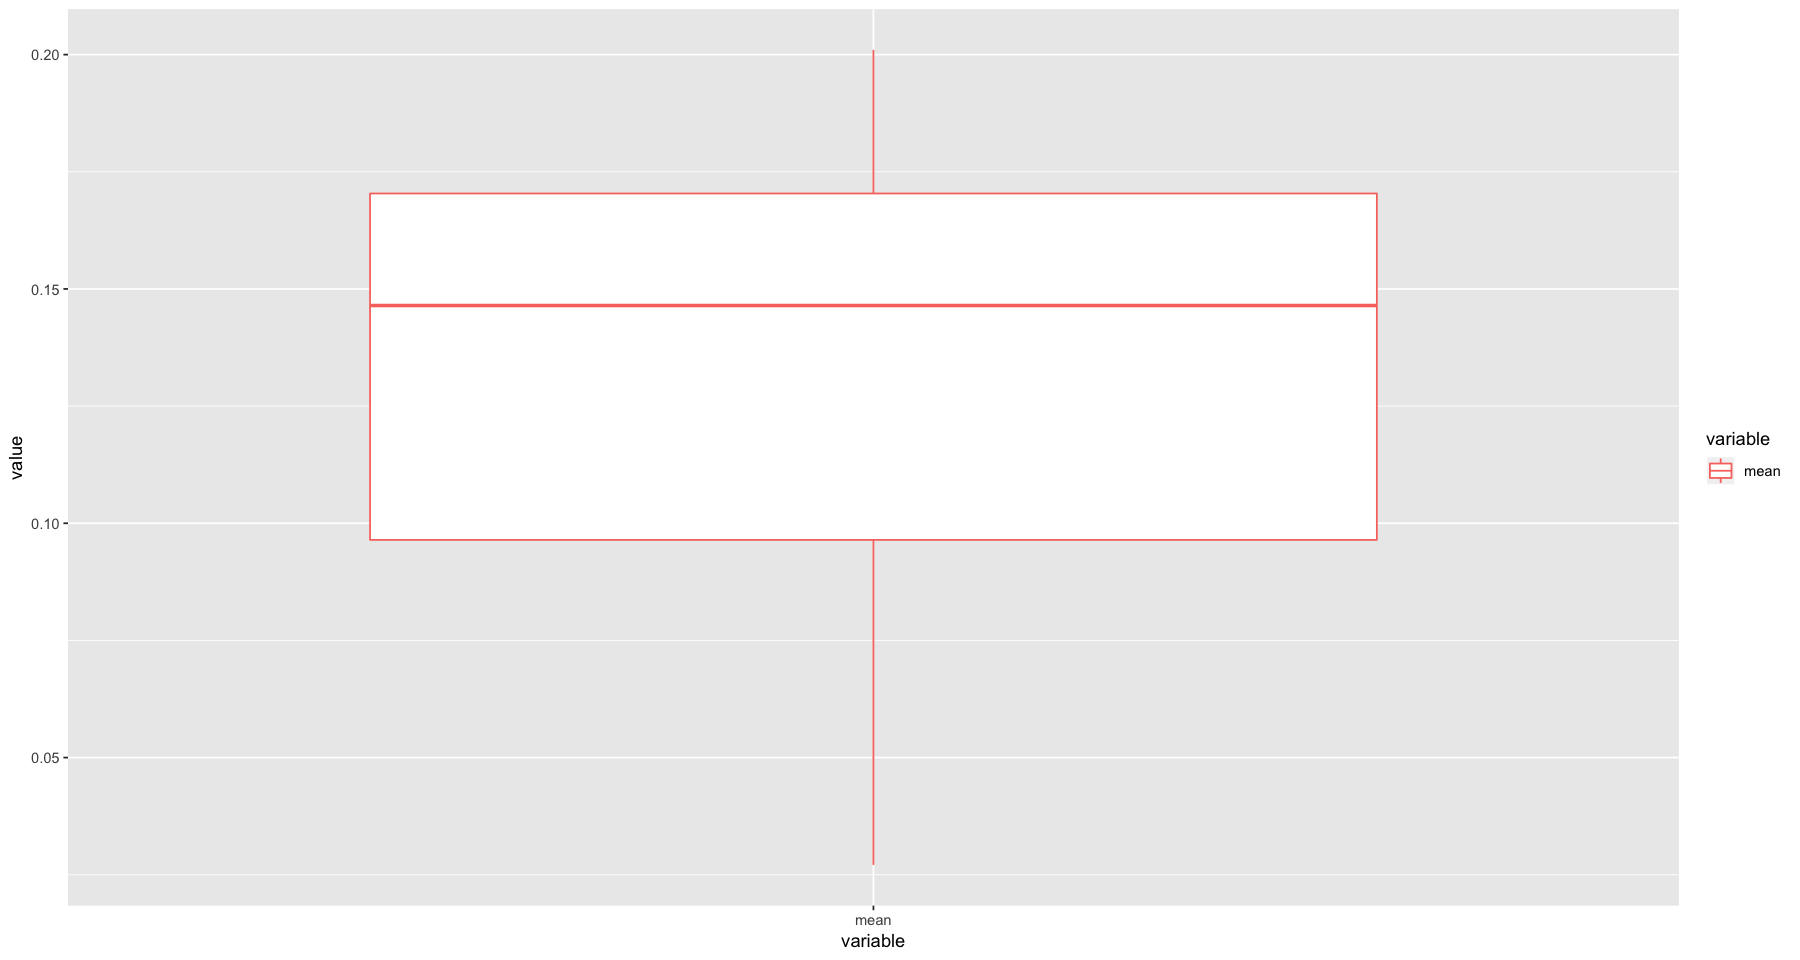

In [390]:
long_train_lasso_r<- long_train_lasso[,residual:=(long_train_lasso$value-long_train_lasso$x)^2]
residual_stats=long_train_lasso_r[,list(mean=mean(residual,na.rm=T)),
                                #m2=mean(residual_2,na.rm=T),
                                #m3=mean(residual_3,na.rm=T)),
                                      by=list(id)]
residual_stats=melt(residual_stats,id.vars=c('id'))
ggplot(residual_stats, aes(x=variable, y=value, color=variable)) +
  geom_boxplot() 

This time build a regression tree with cp value =0 for each id <br>
Predict each value <br>
Collect them in the tree_long_train


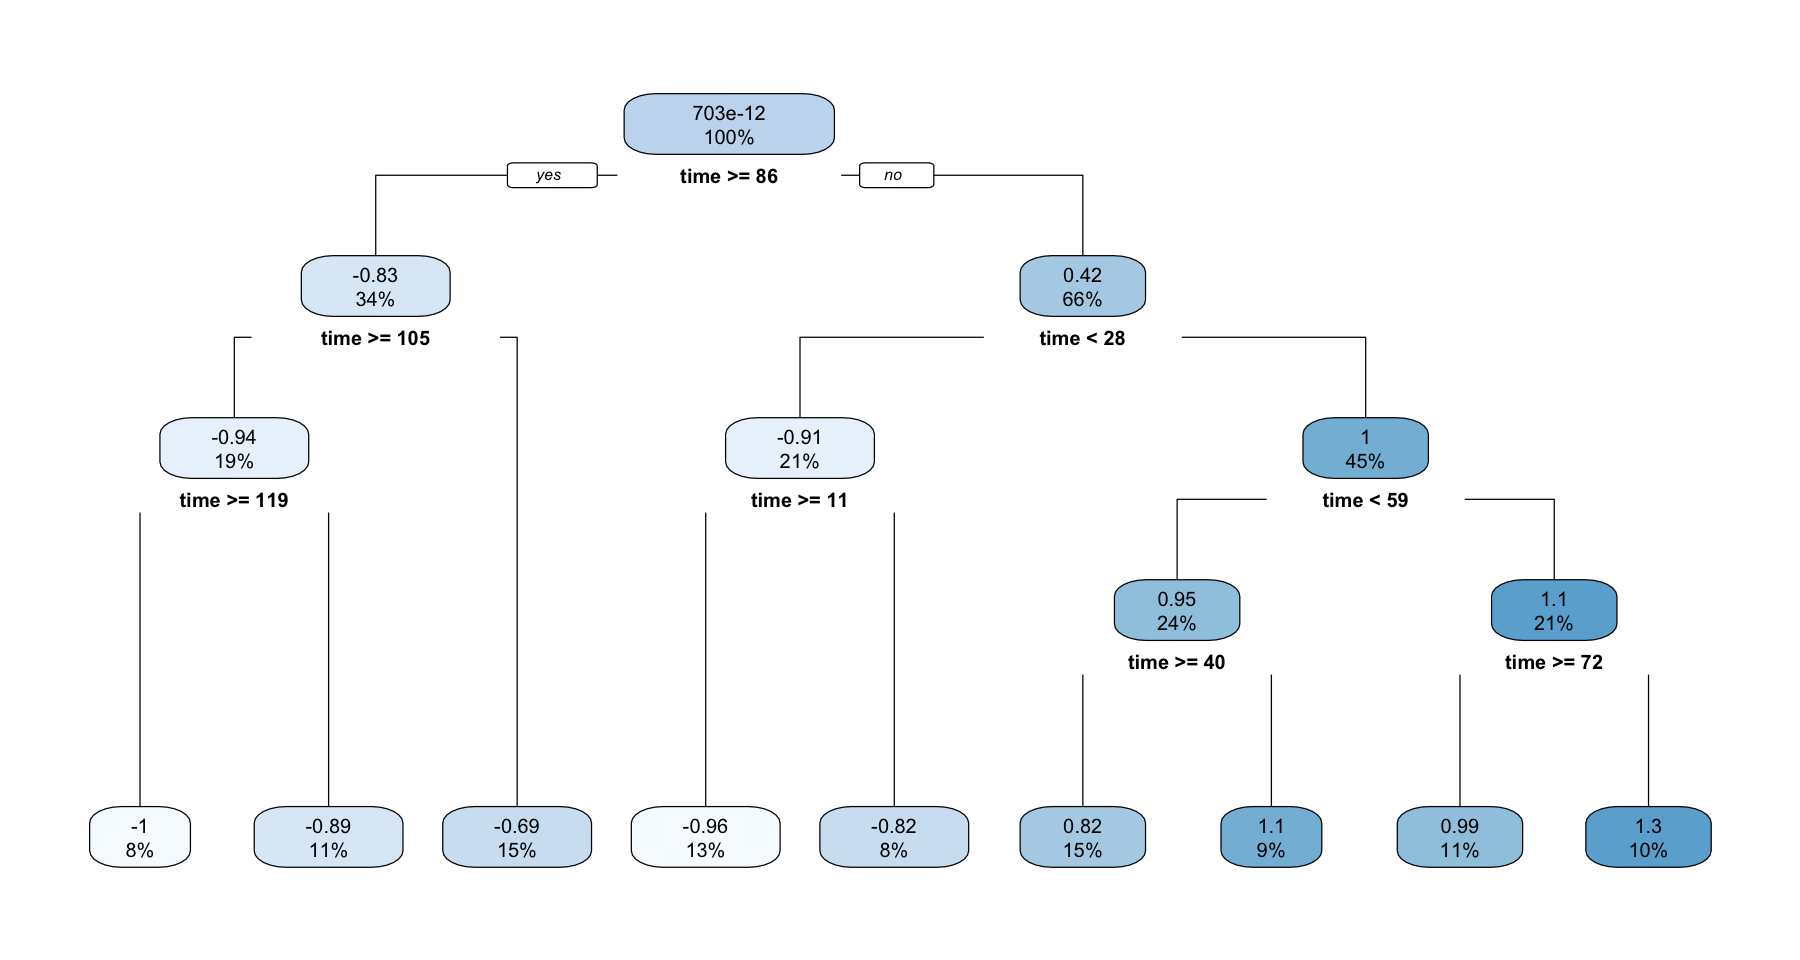

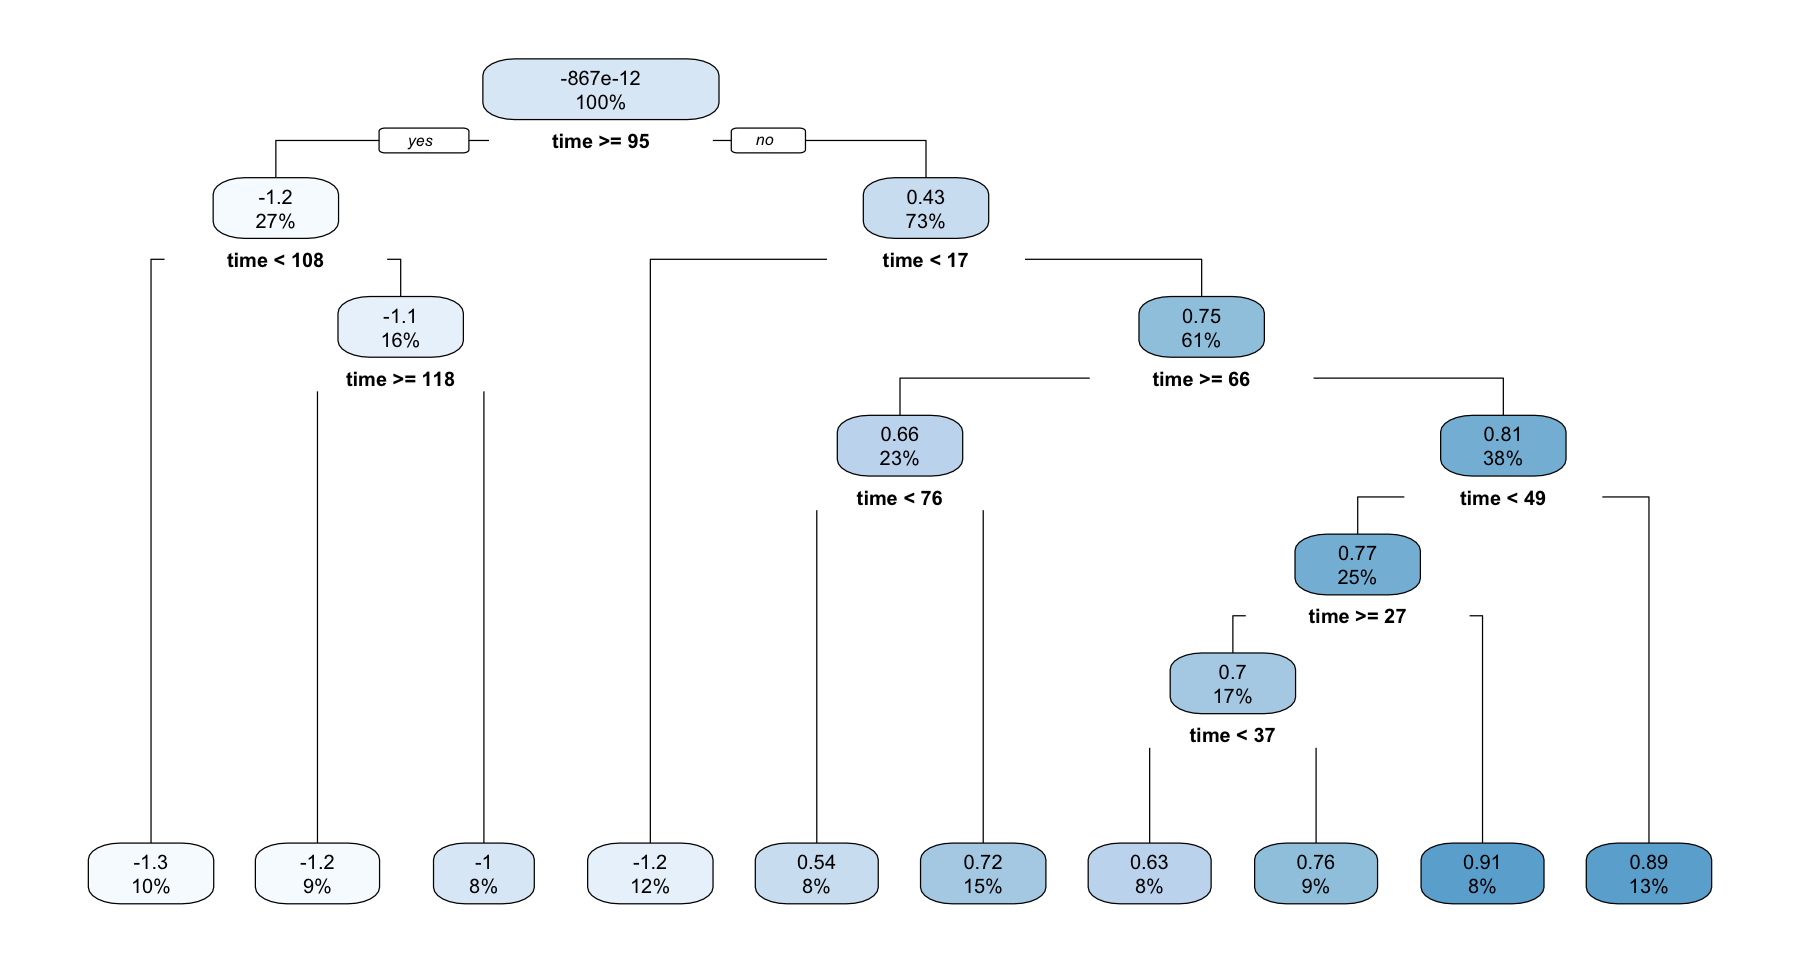

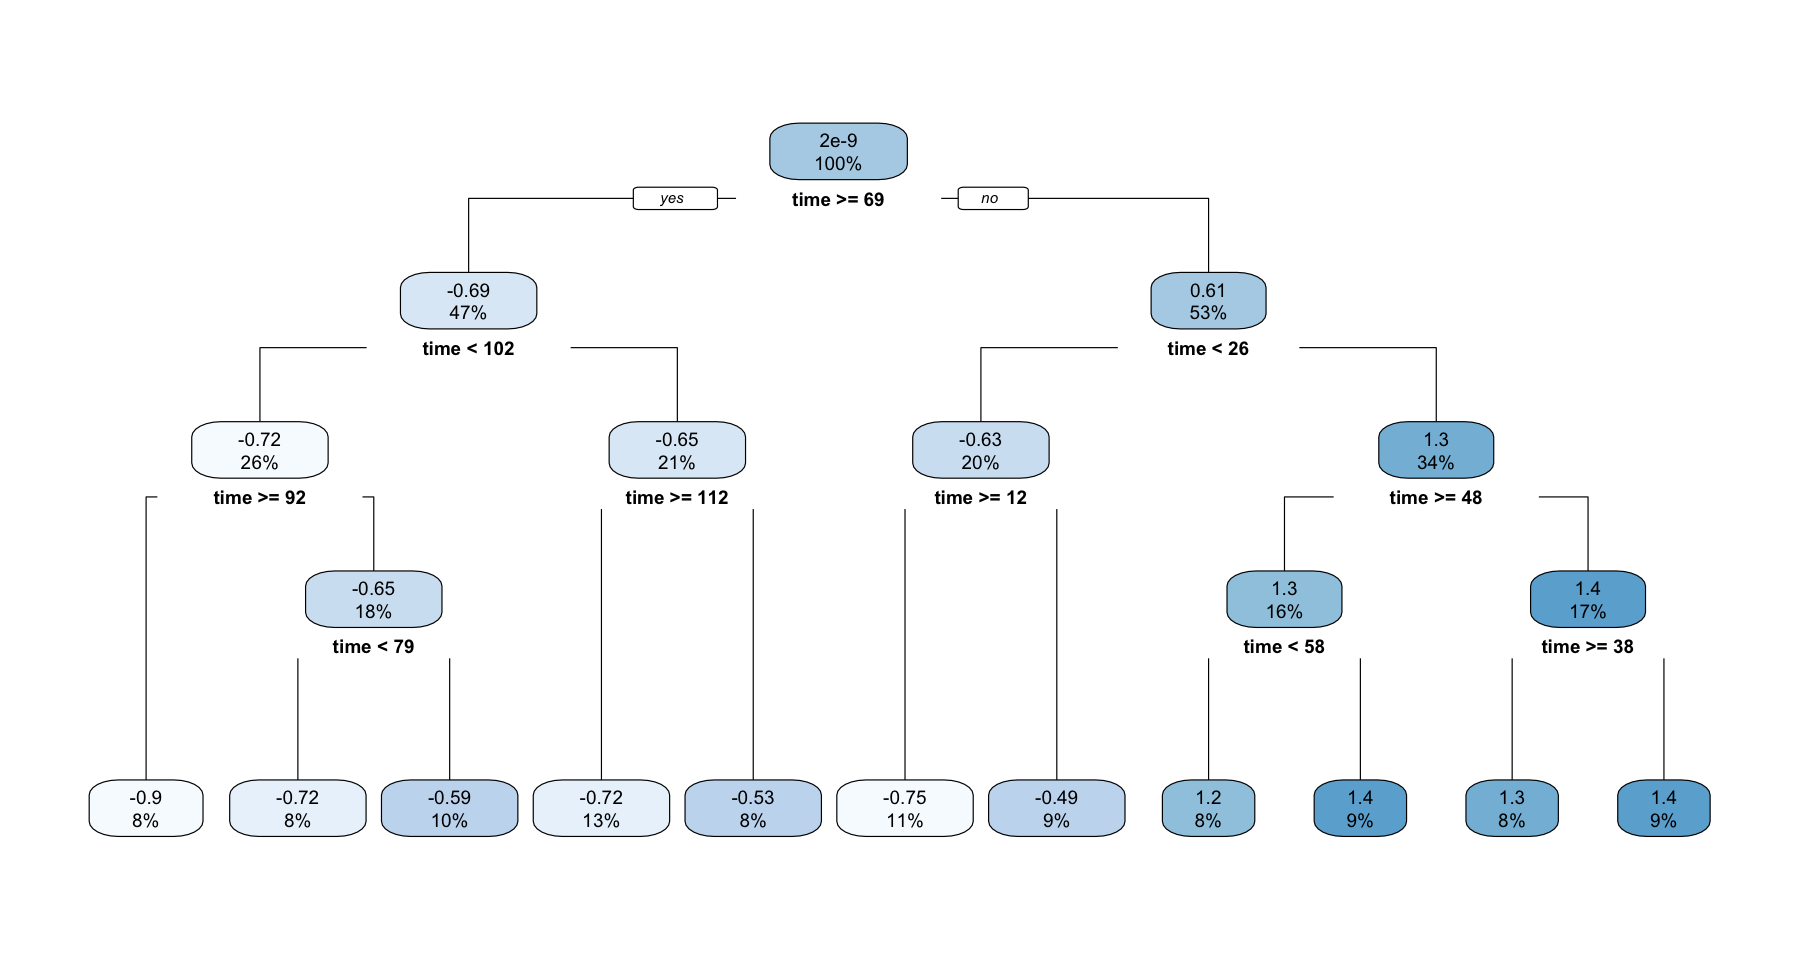

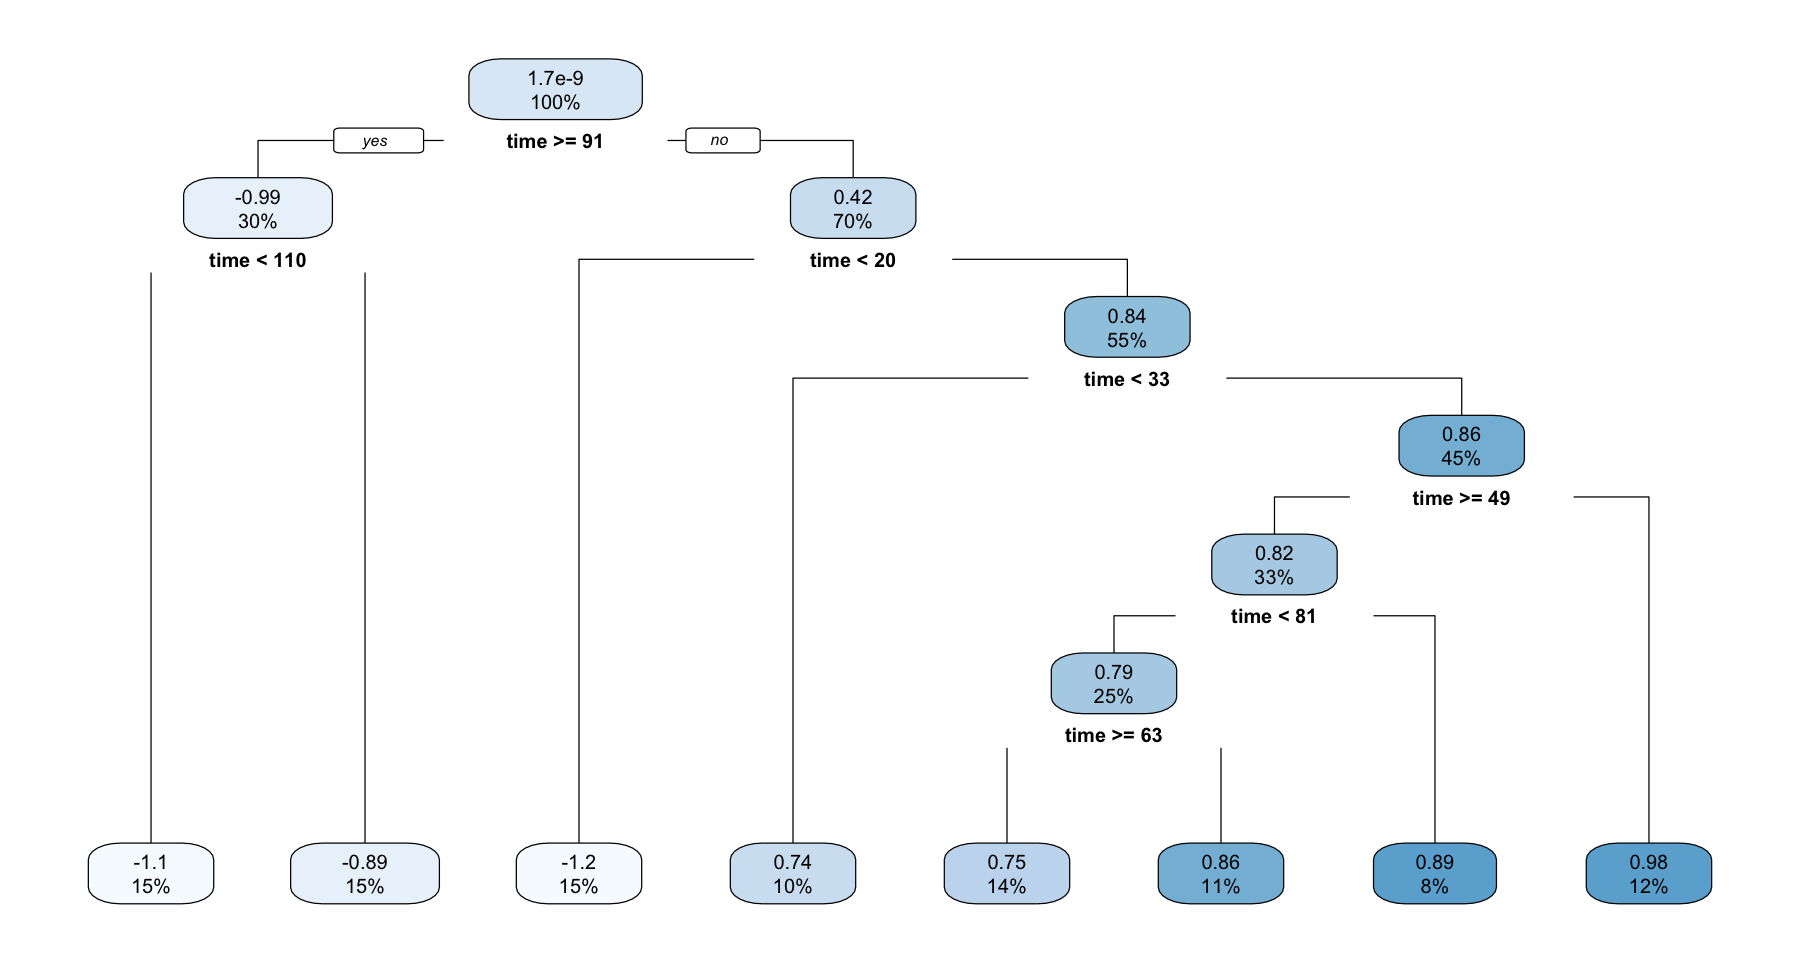

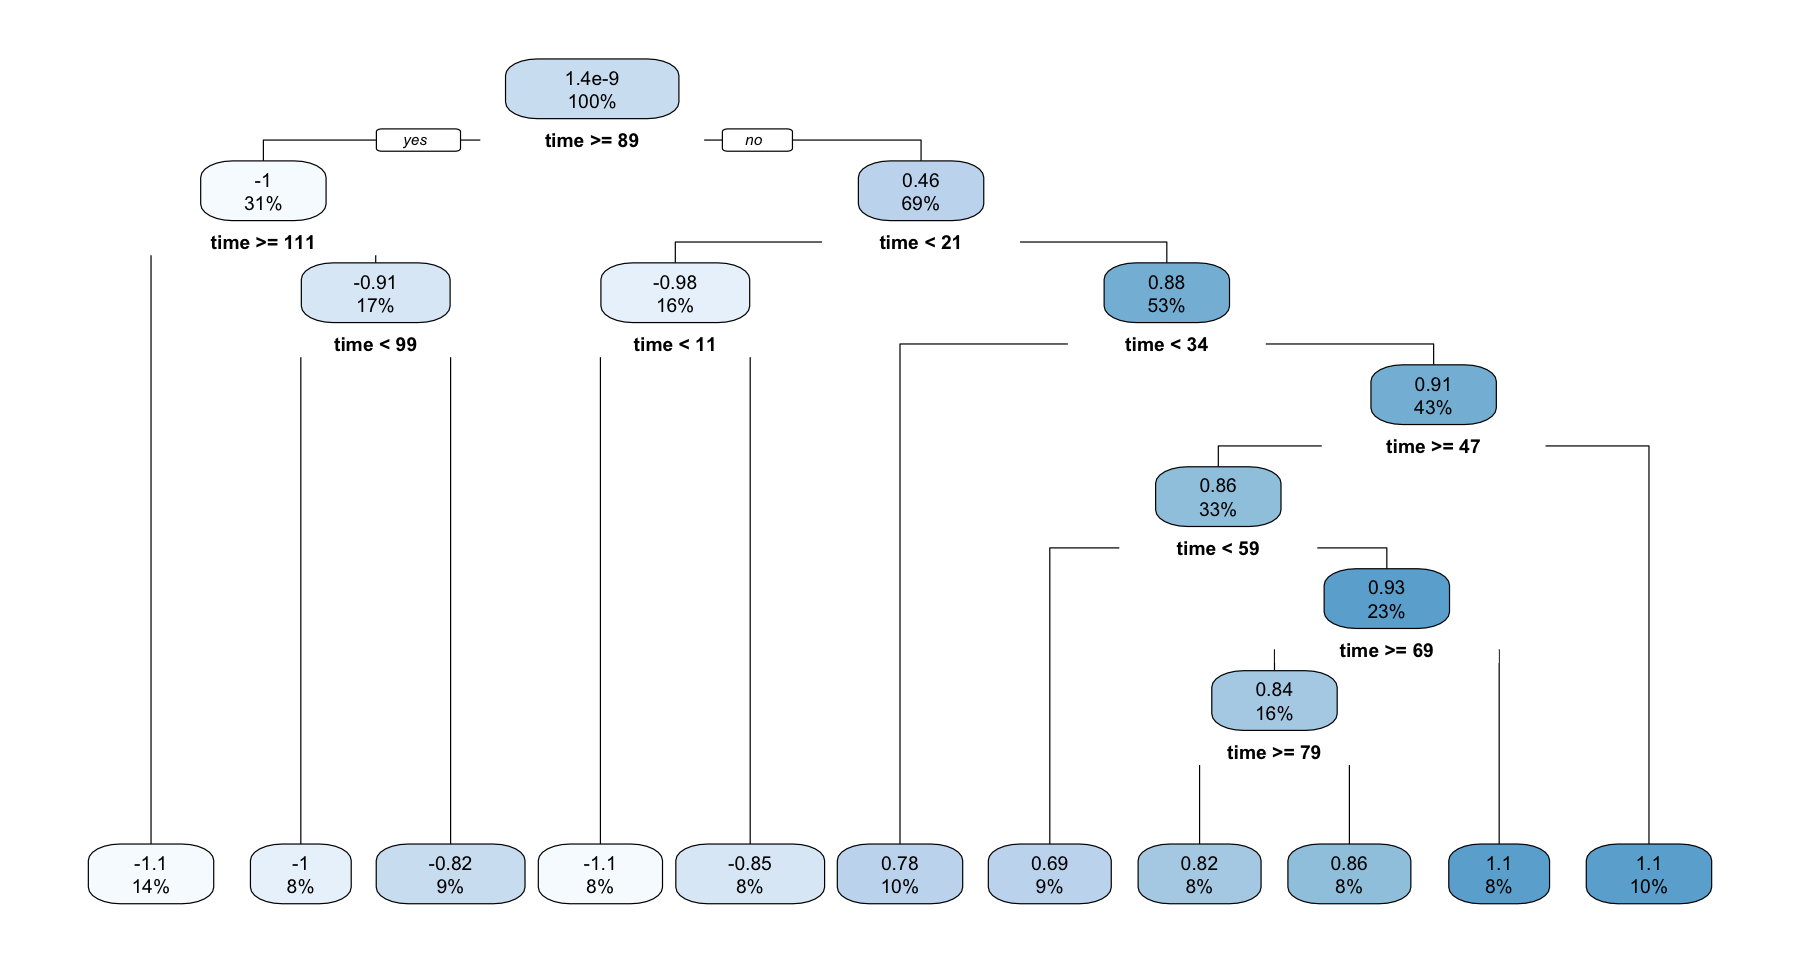

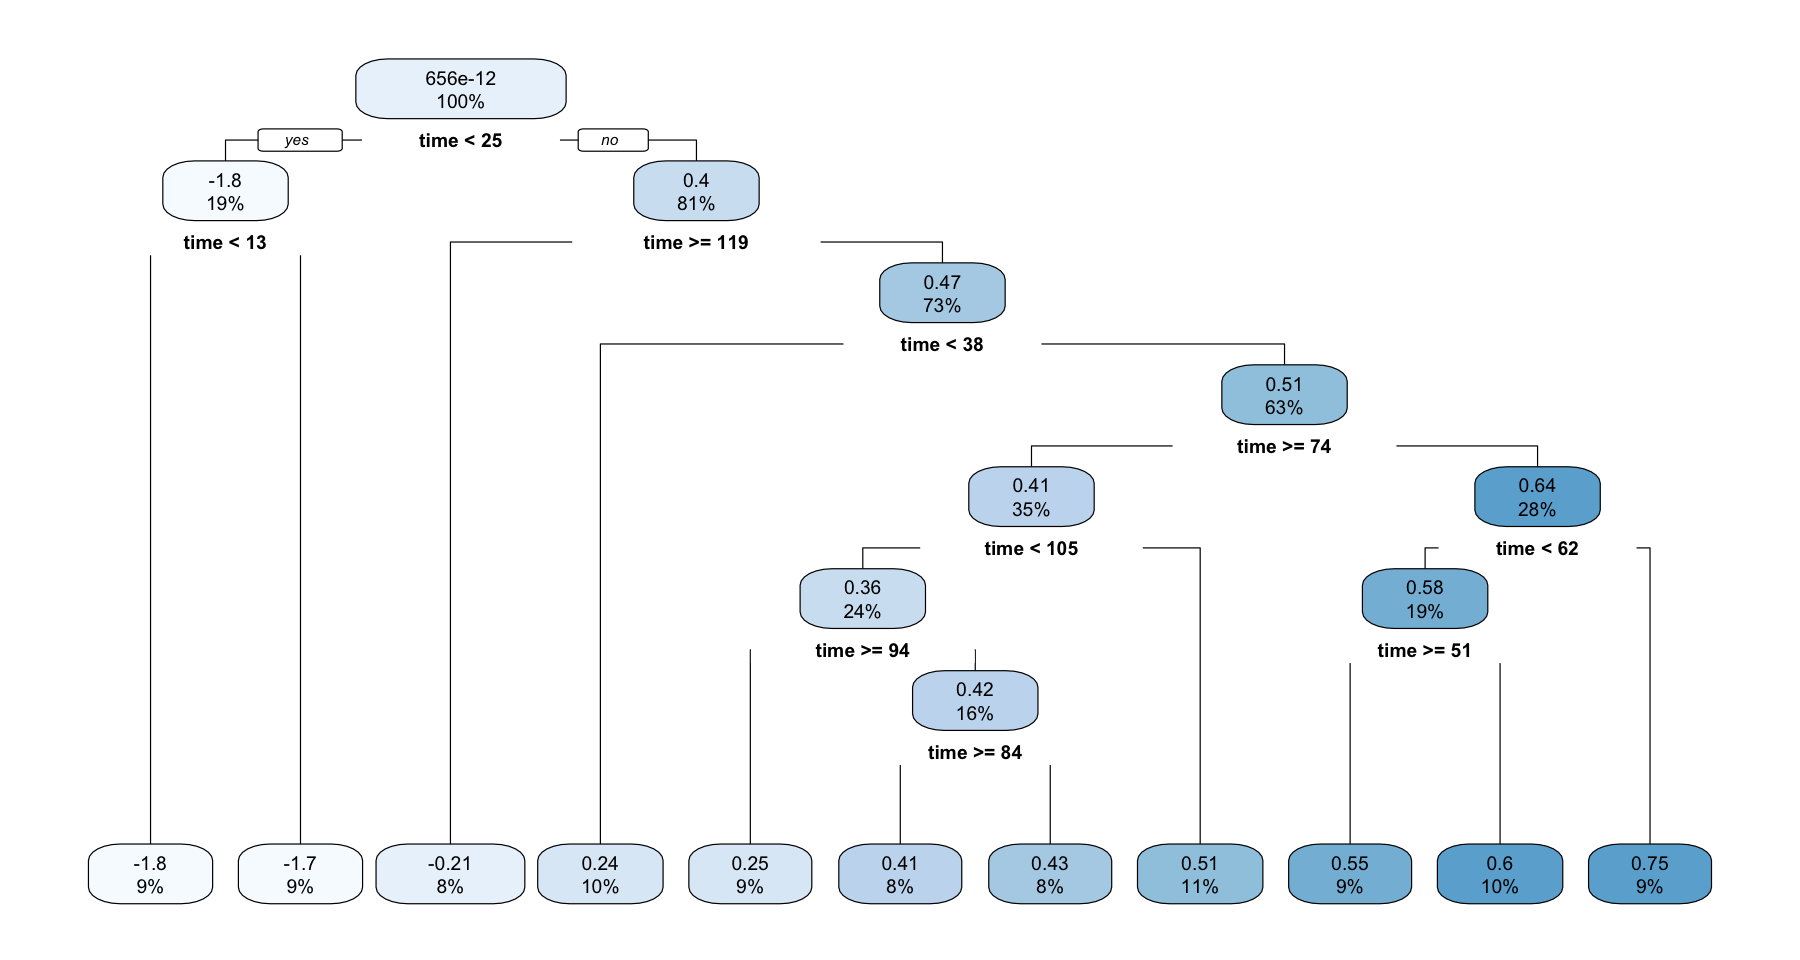

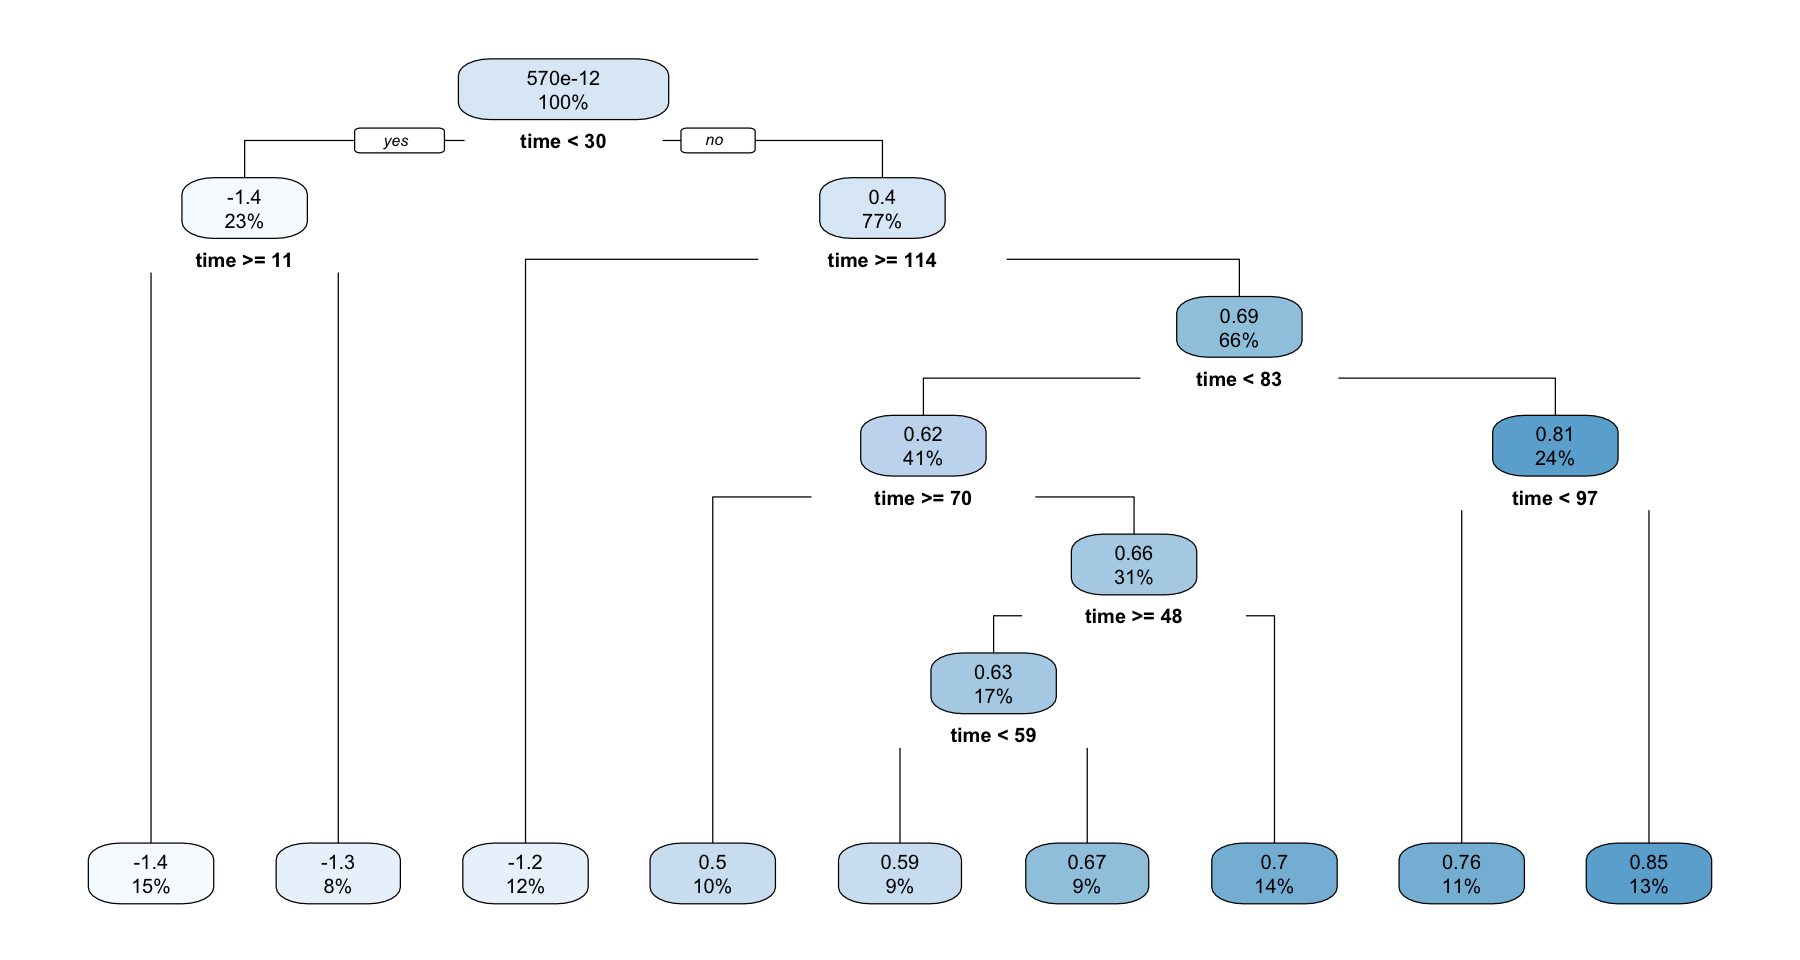

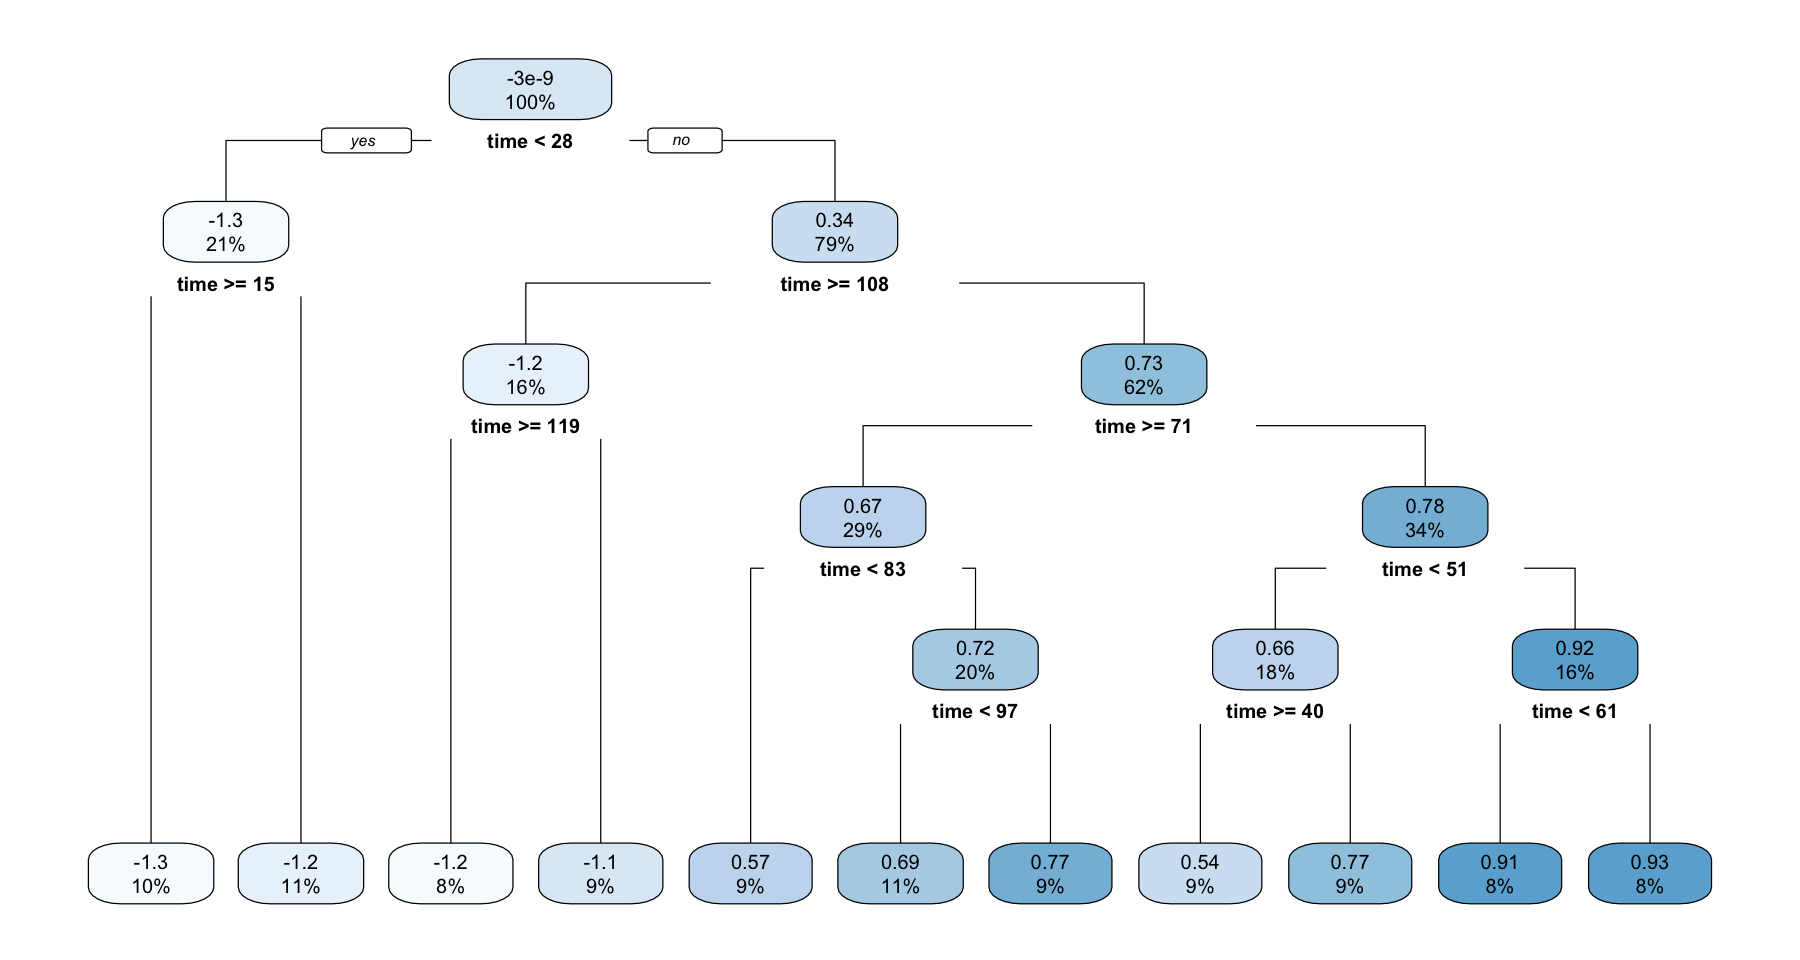

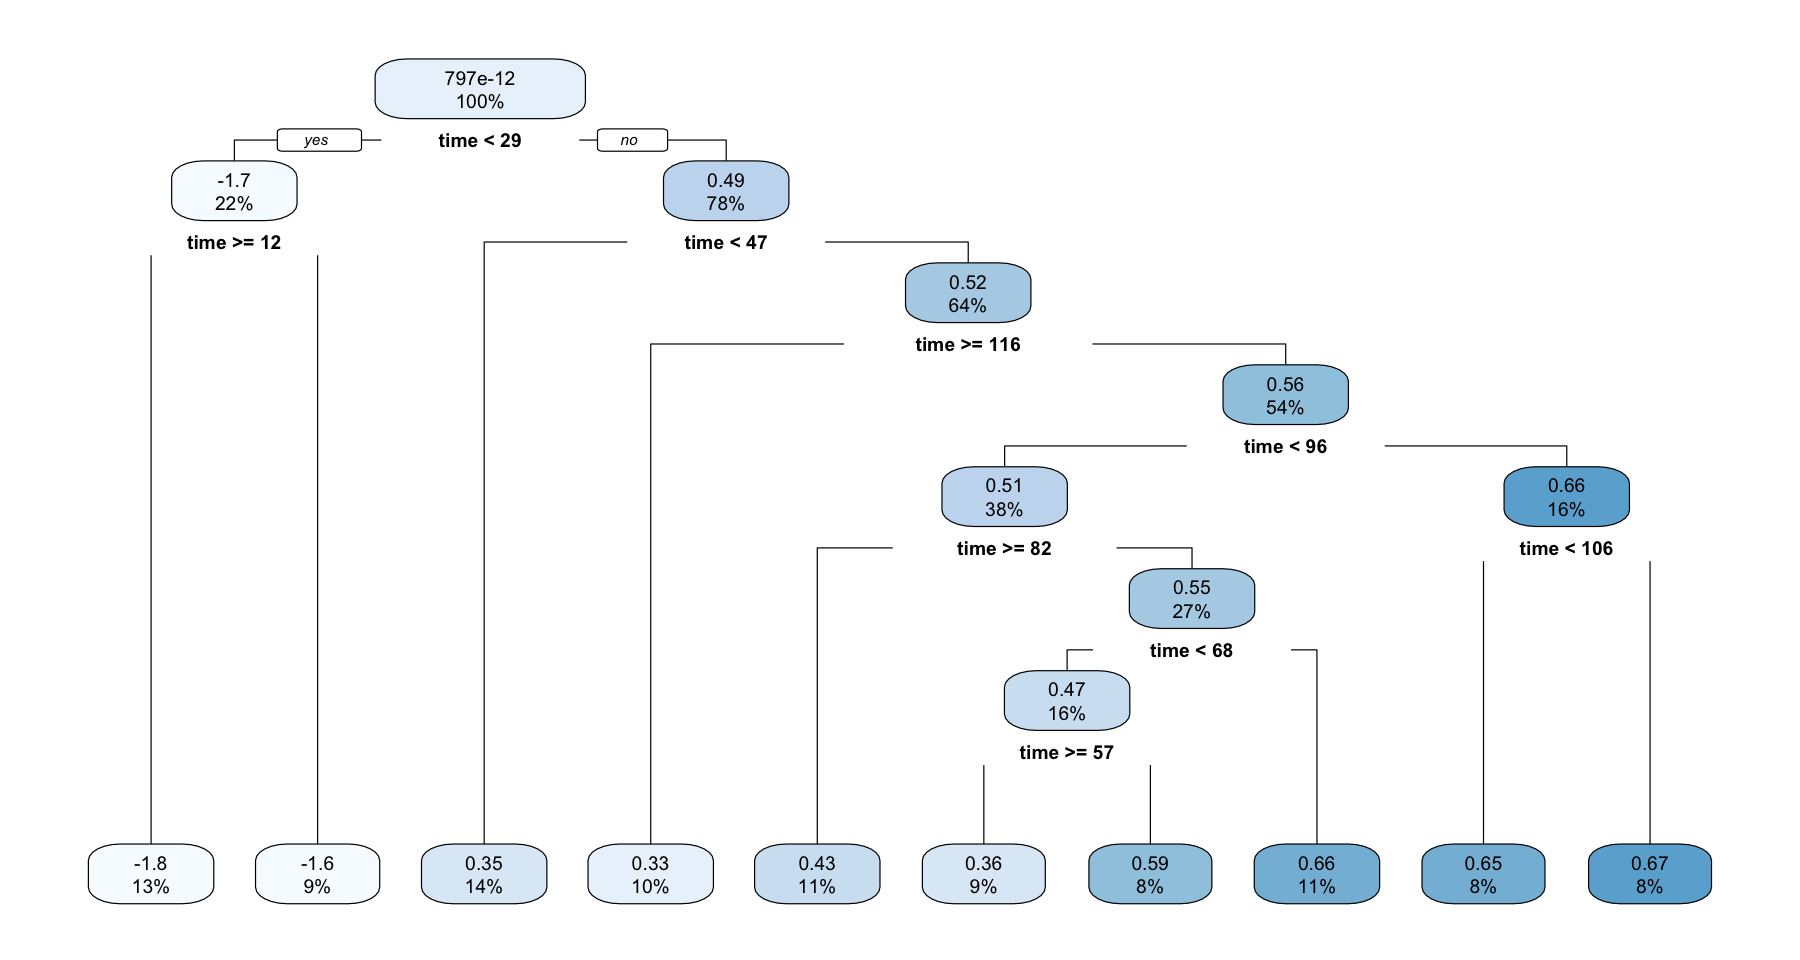

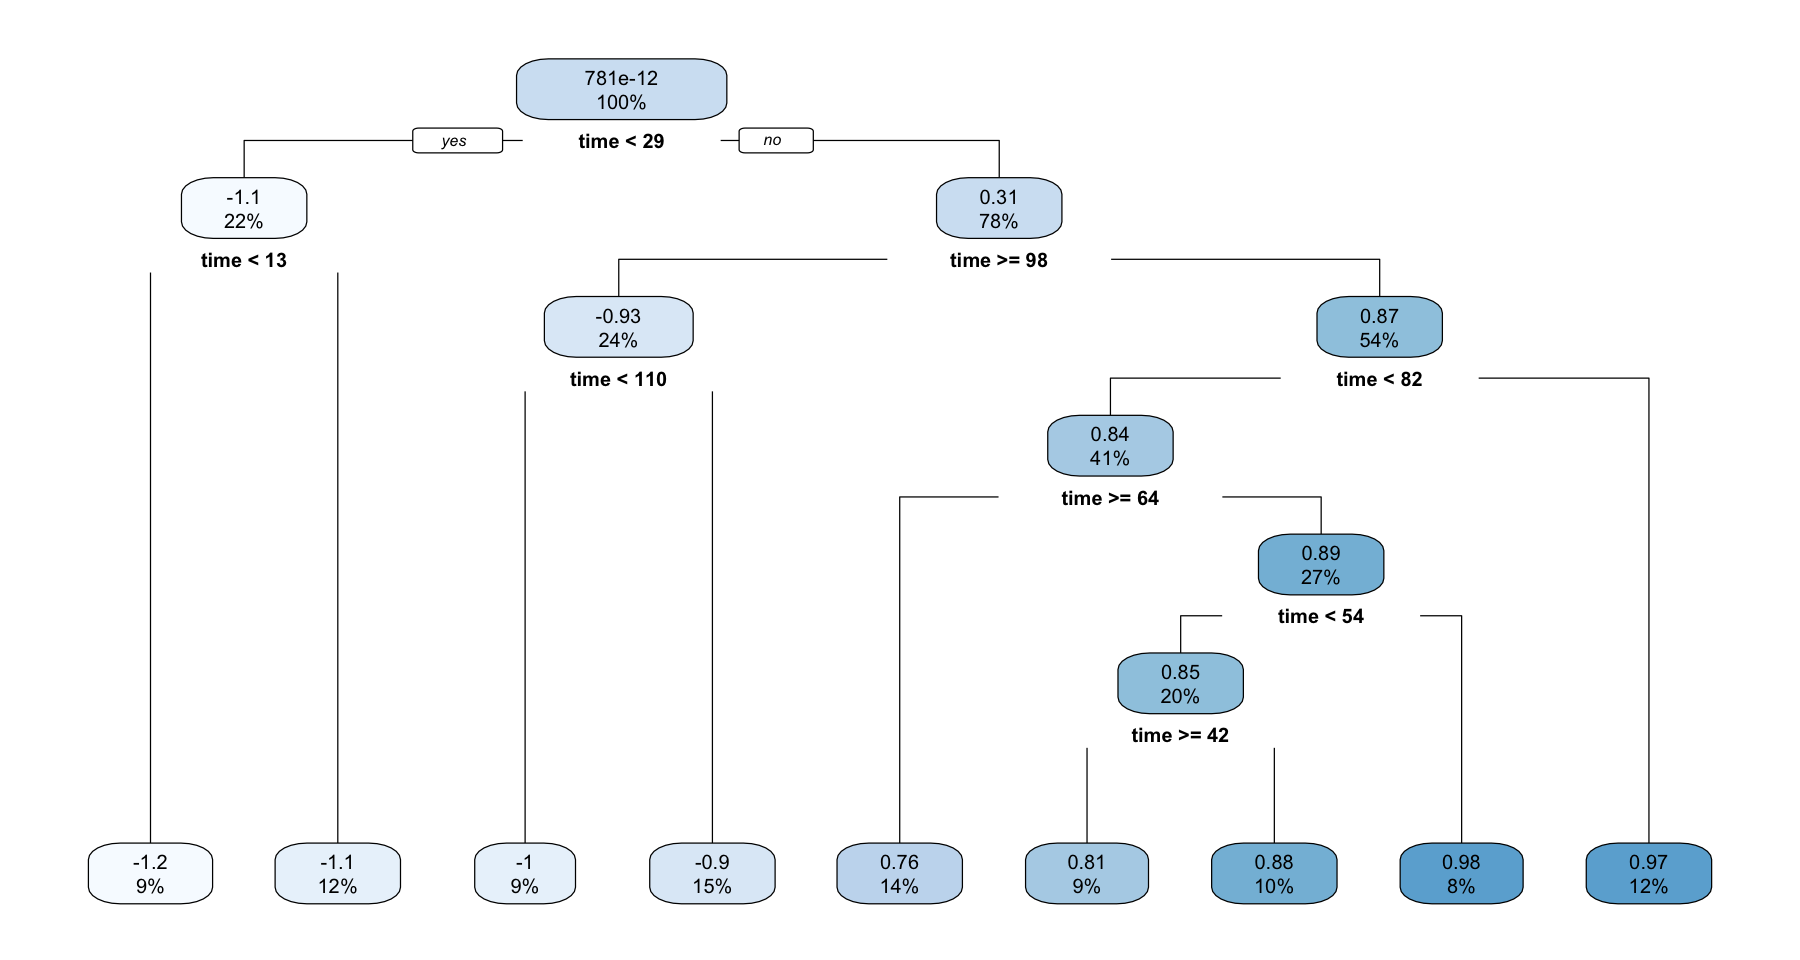

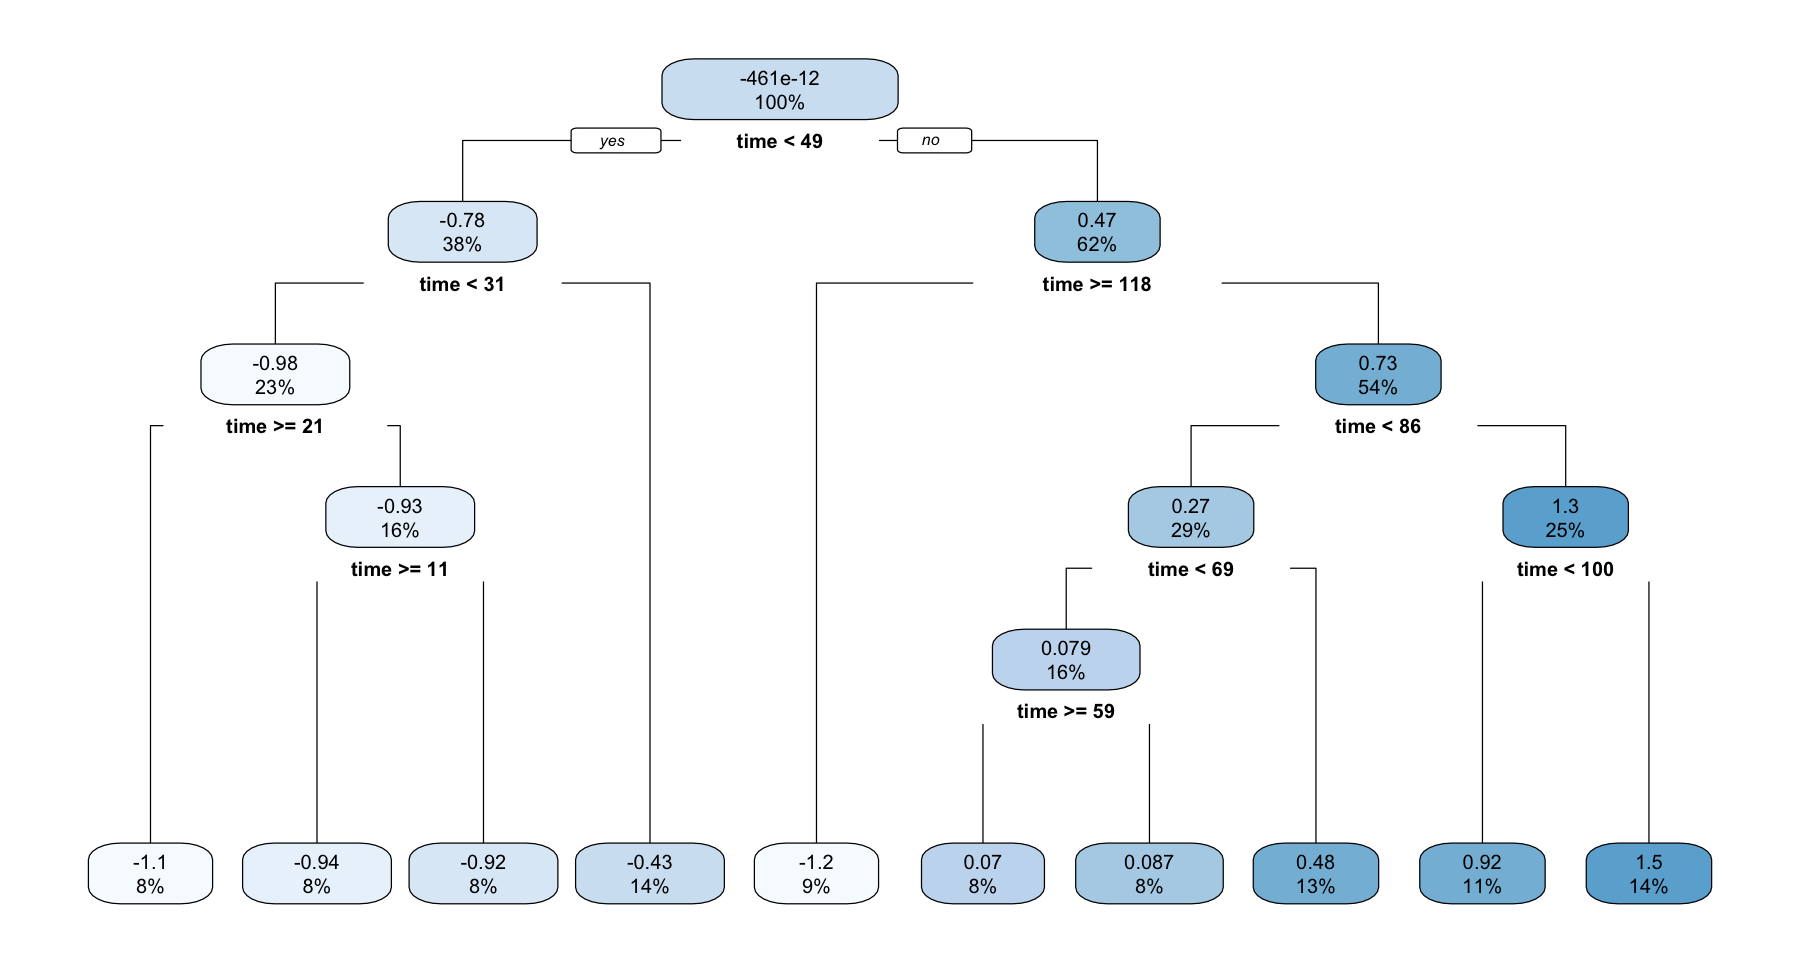

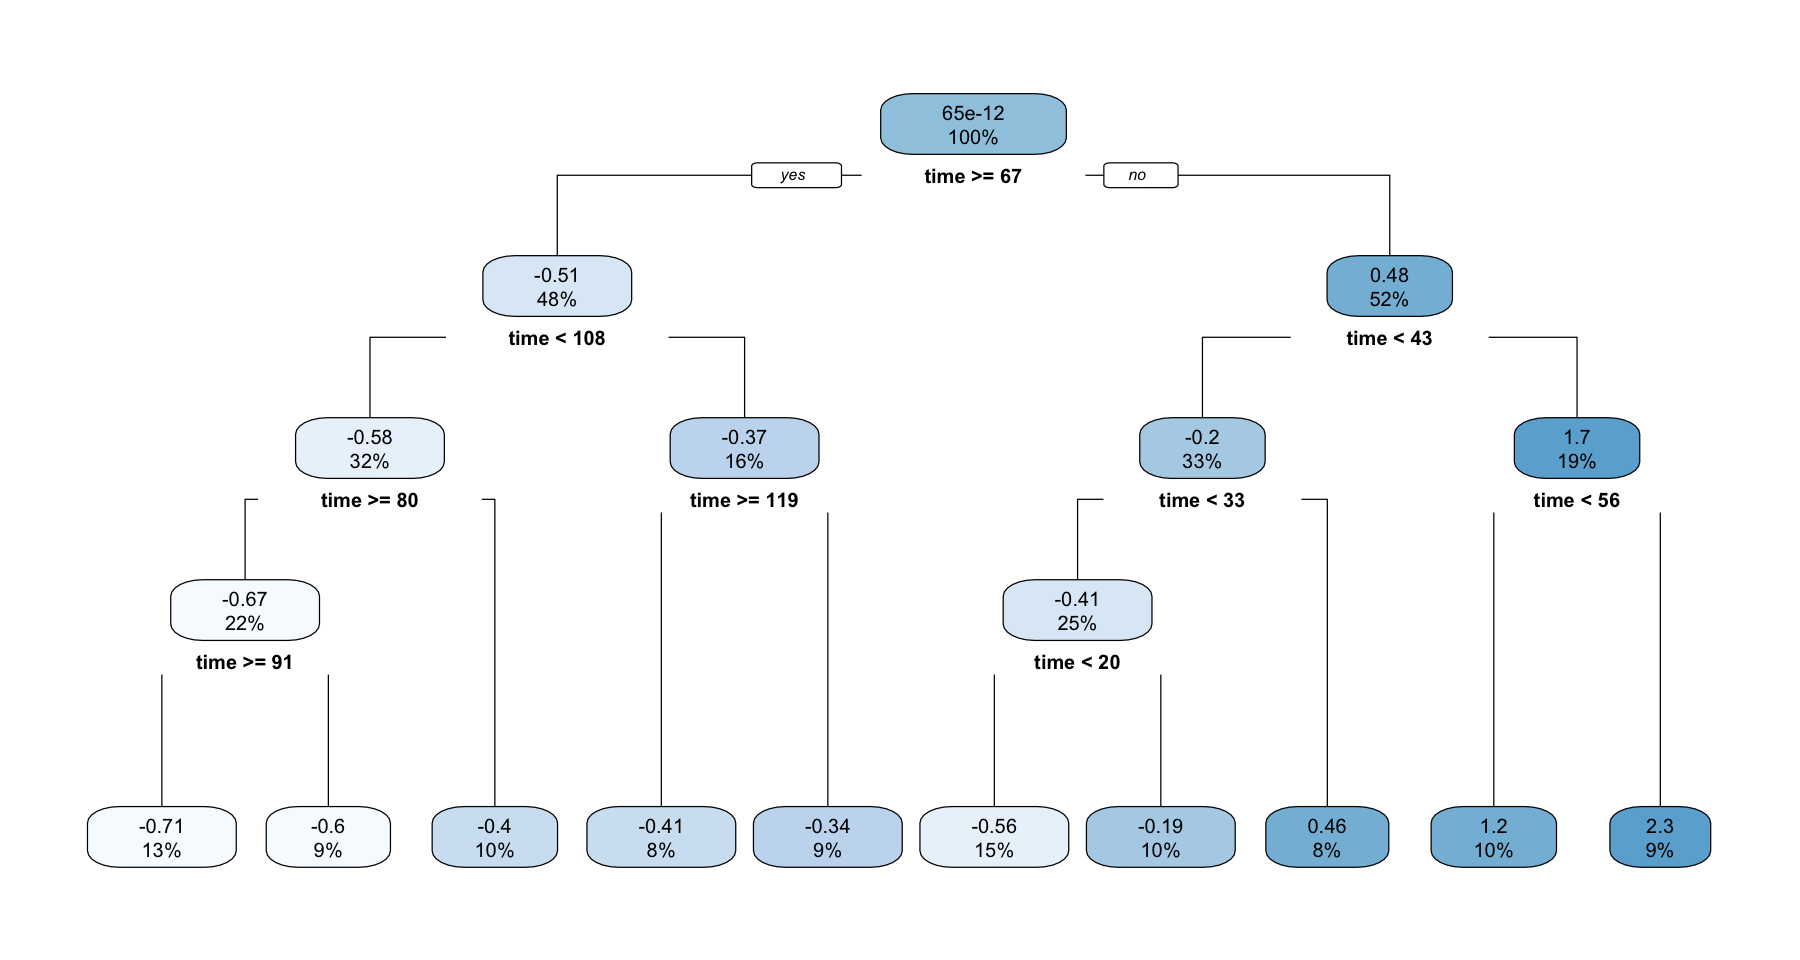

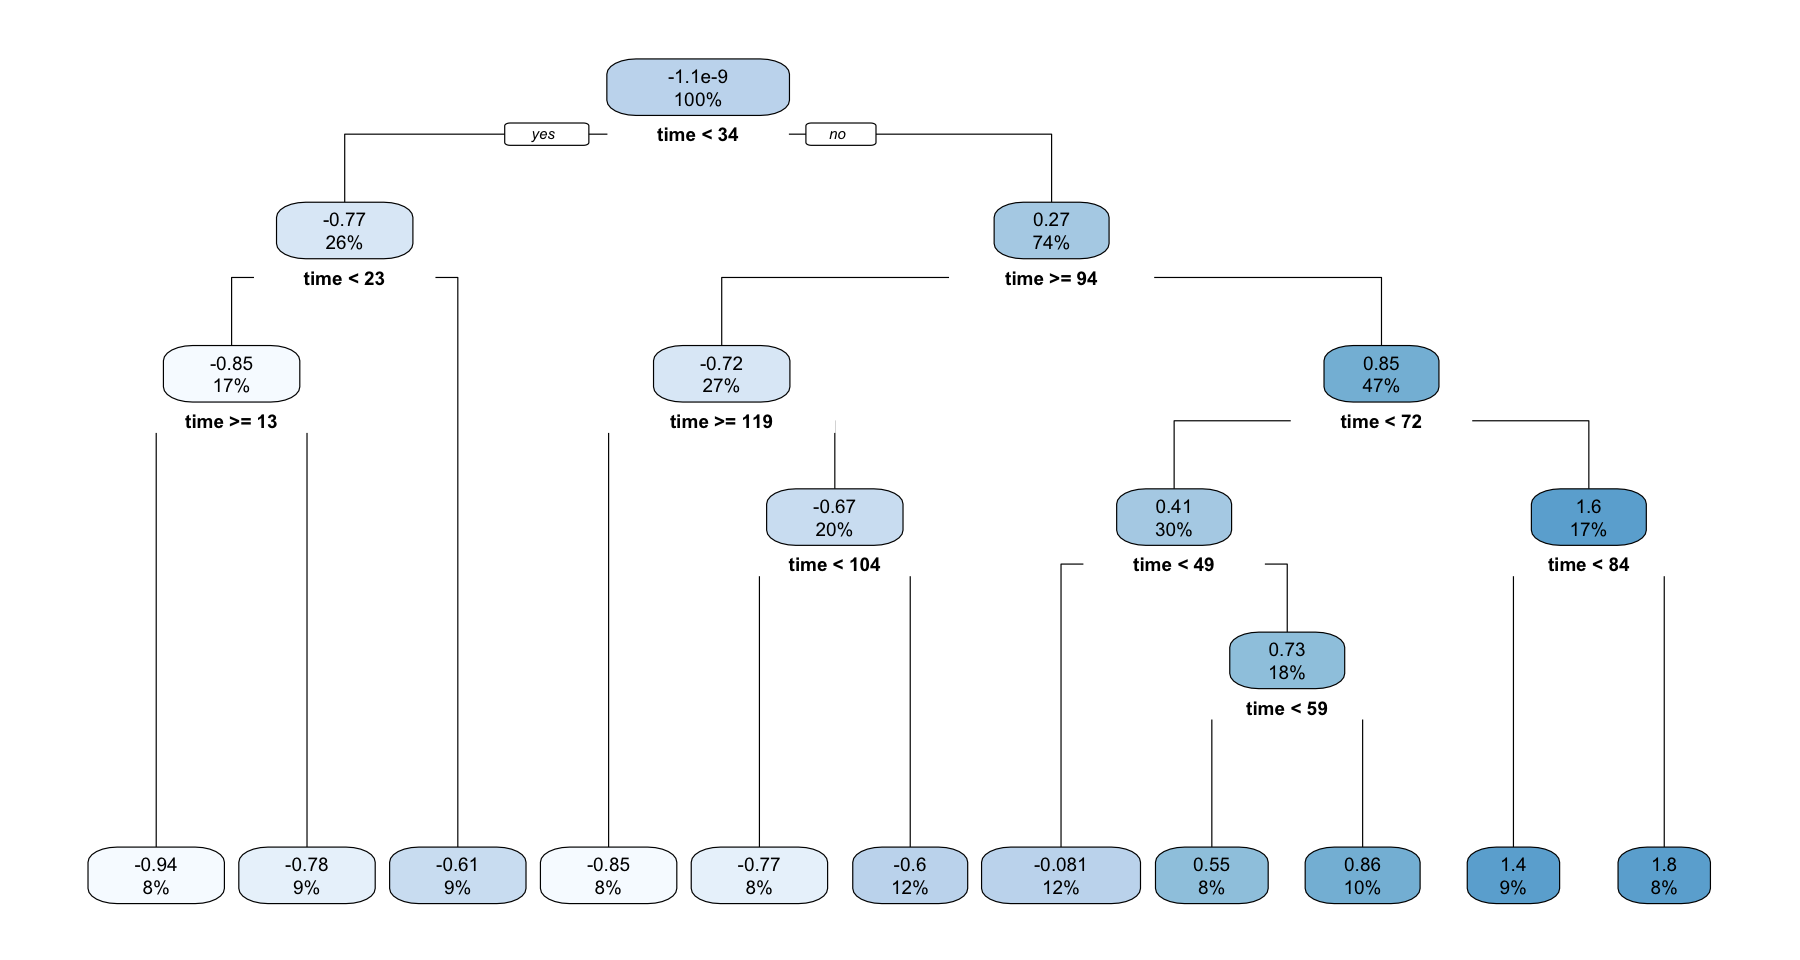

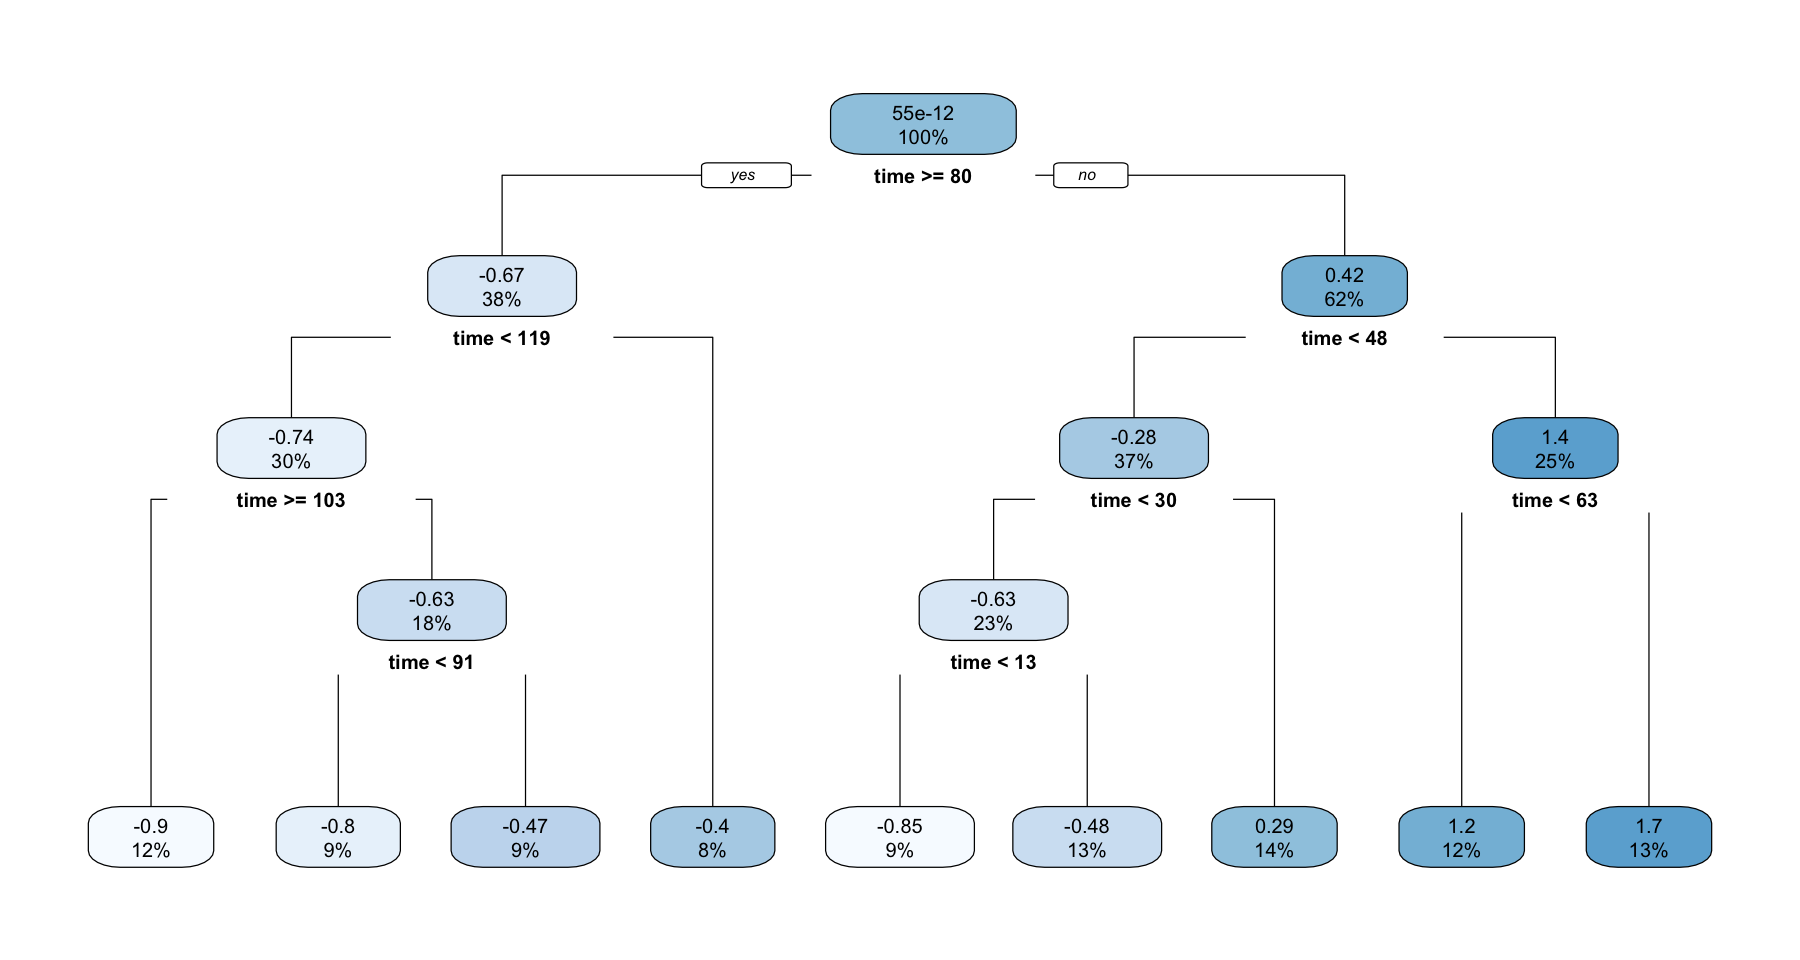

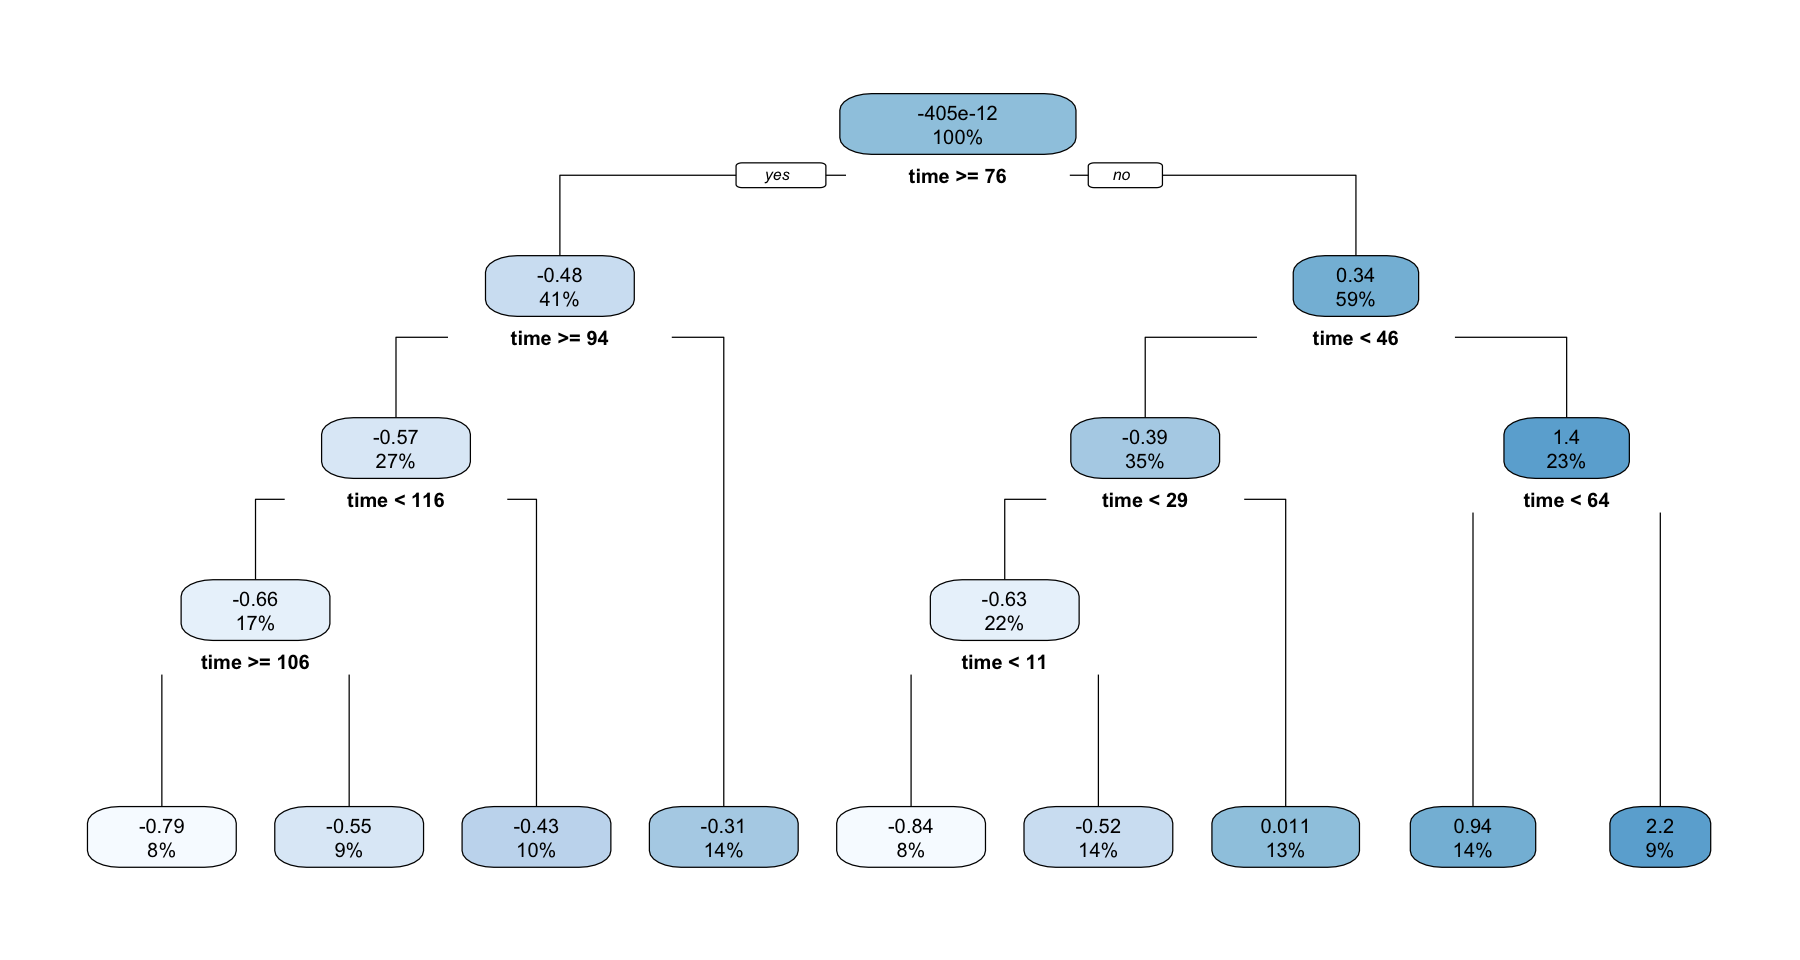

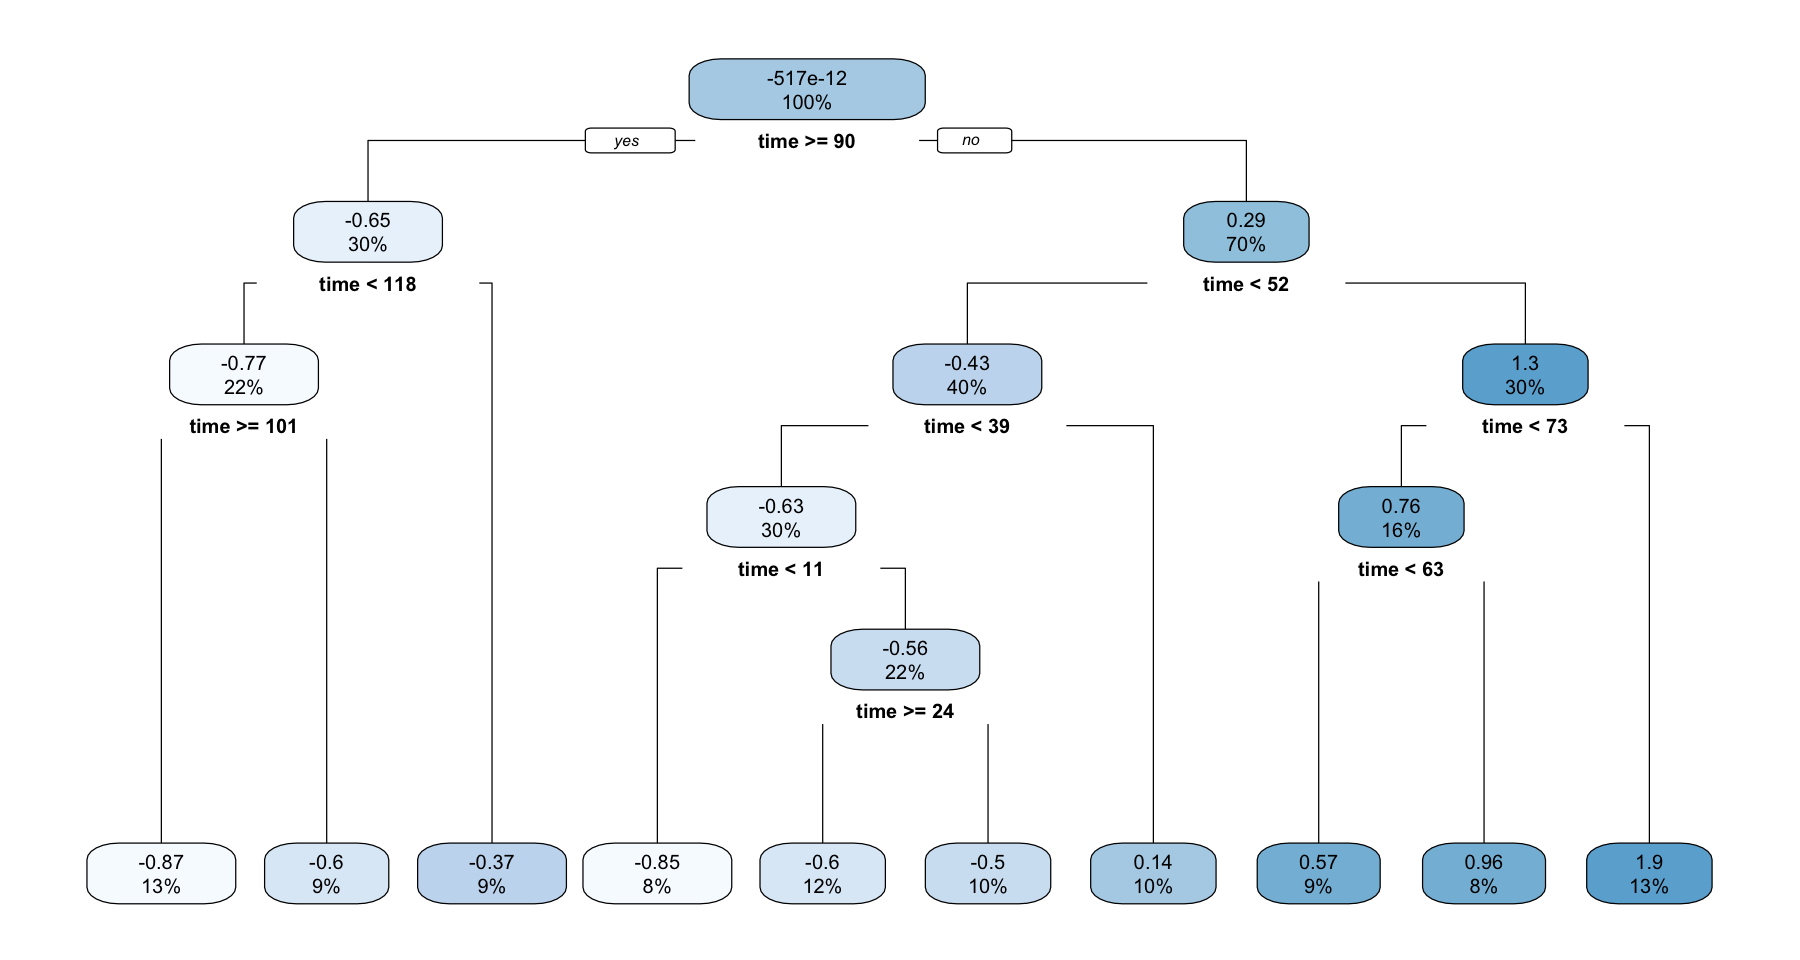

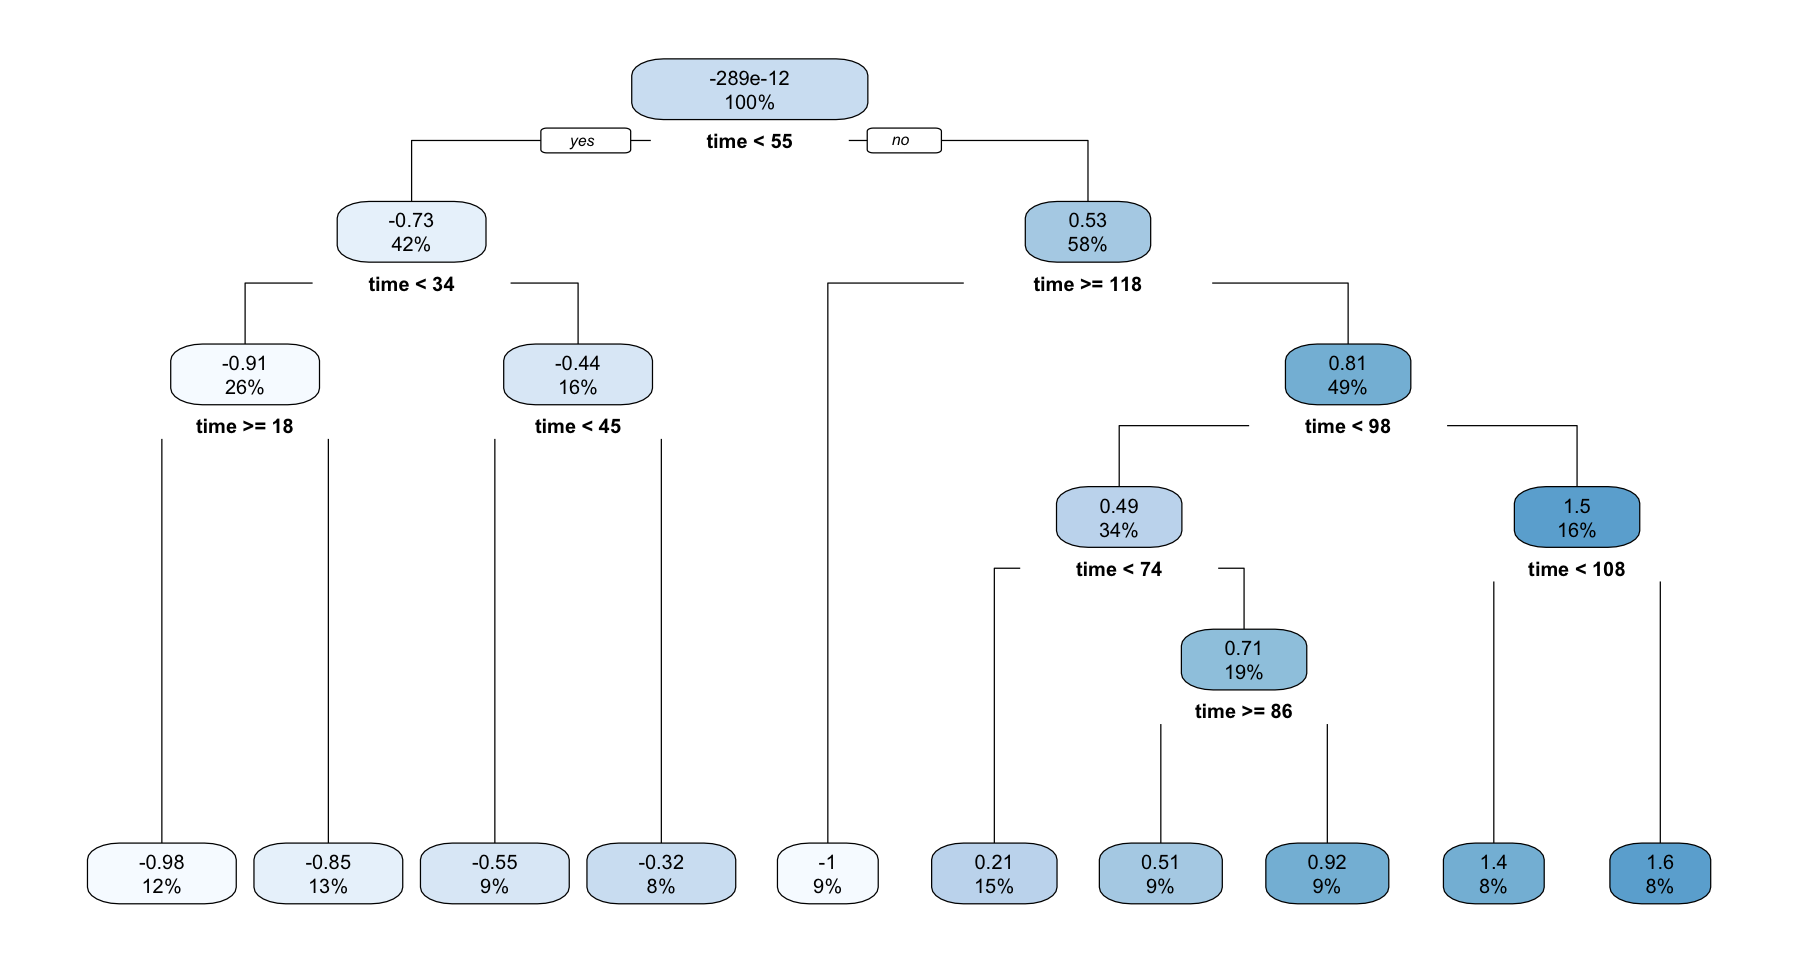

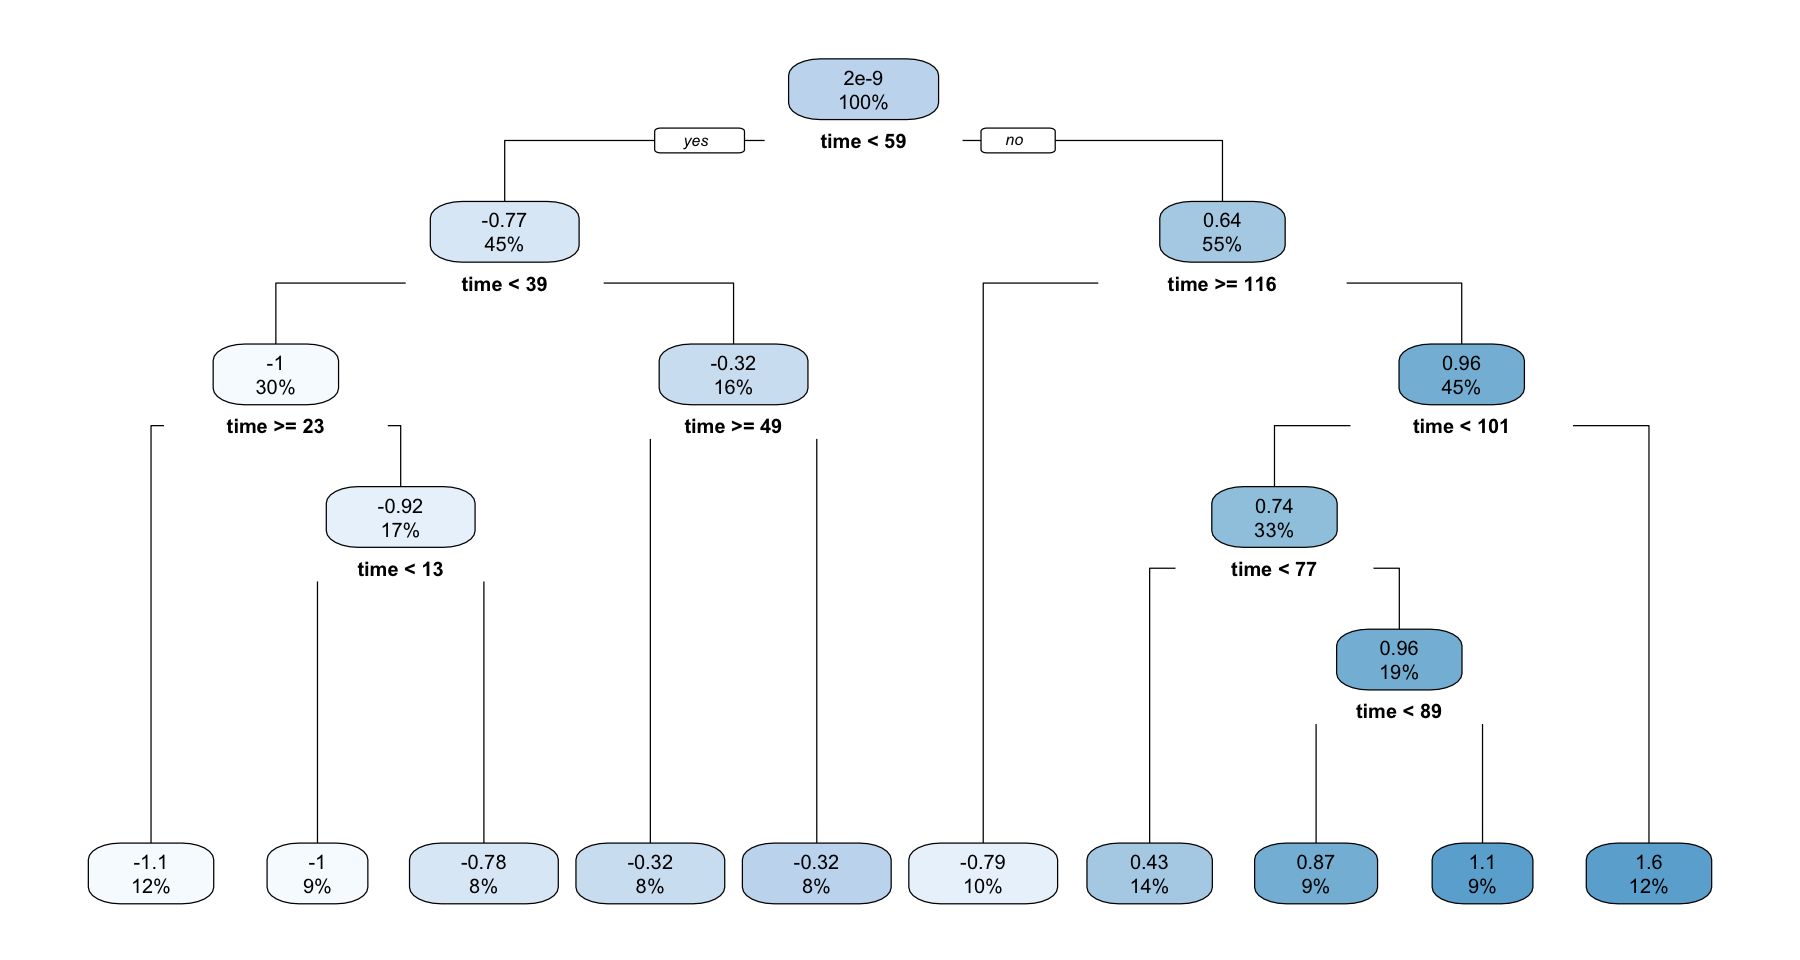

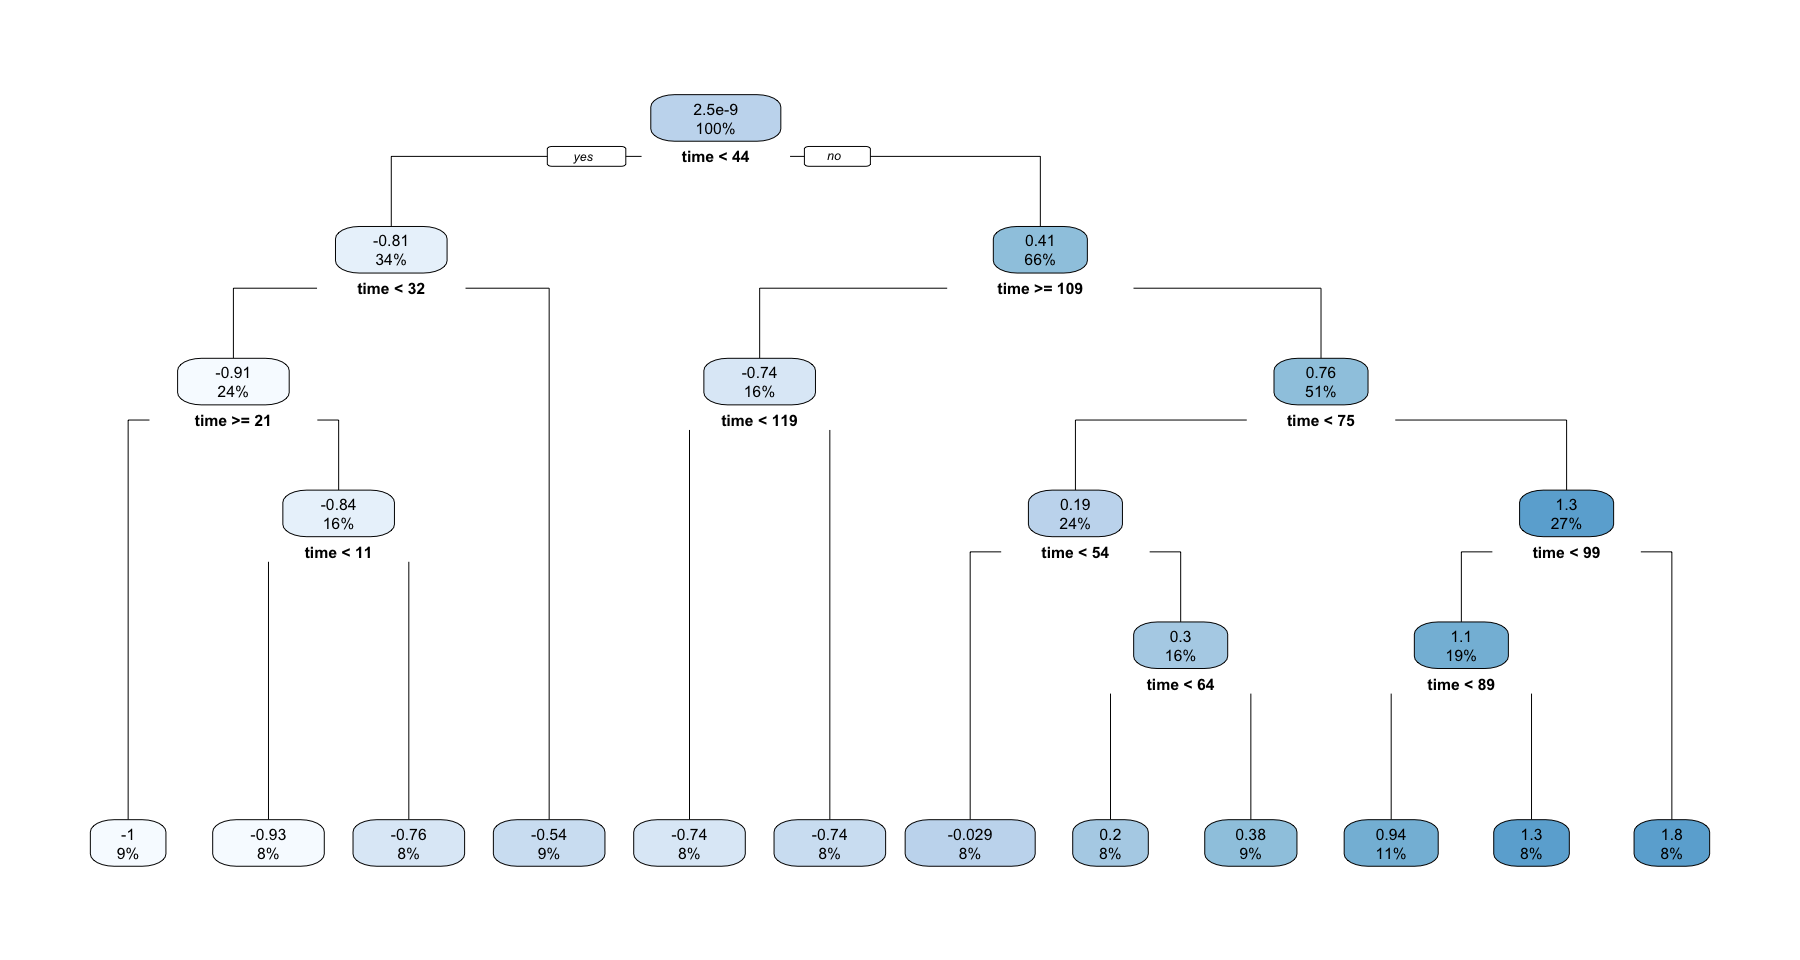

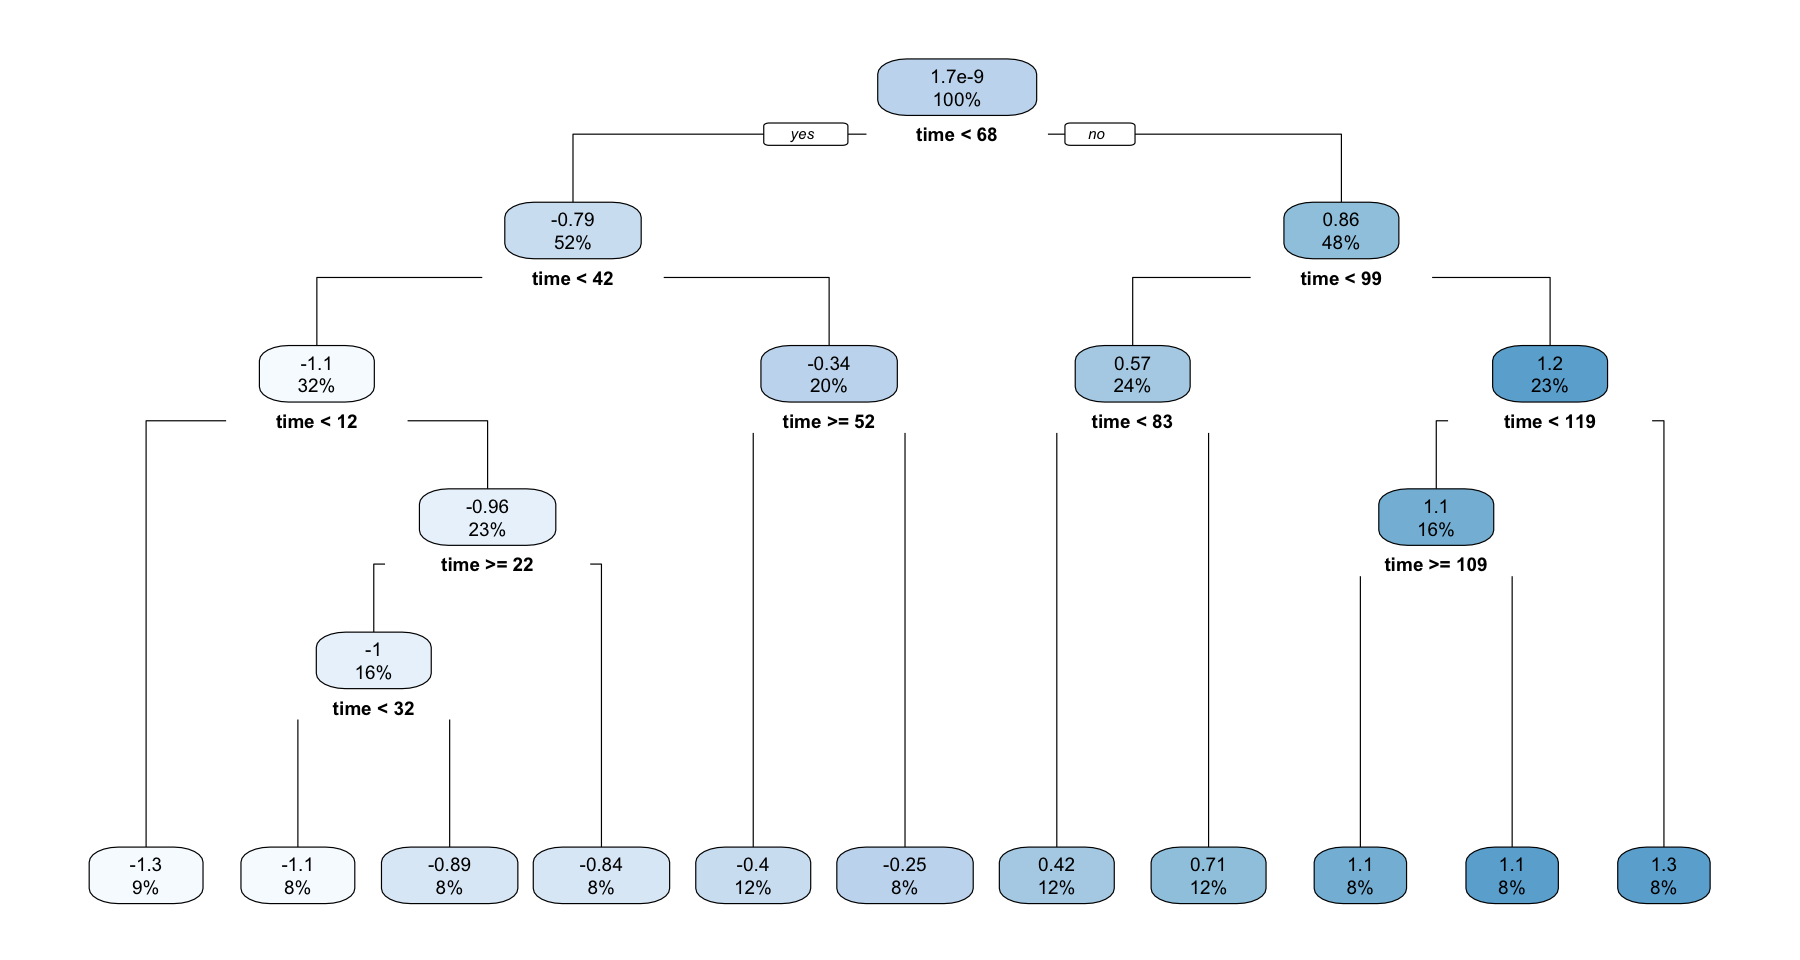

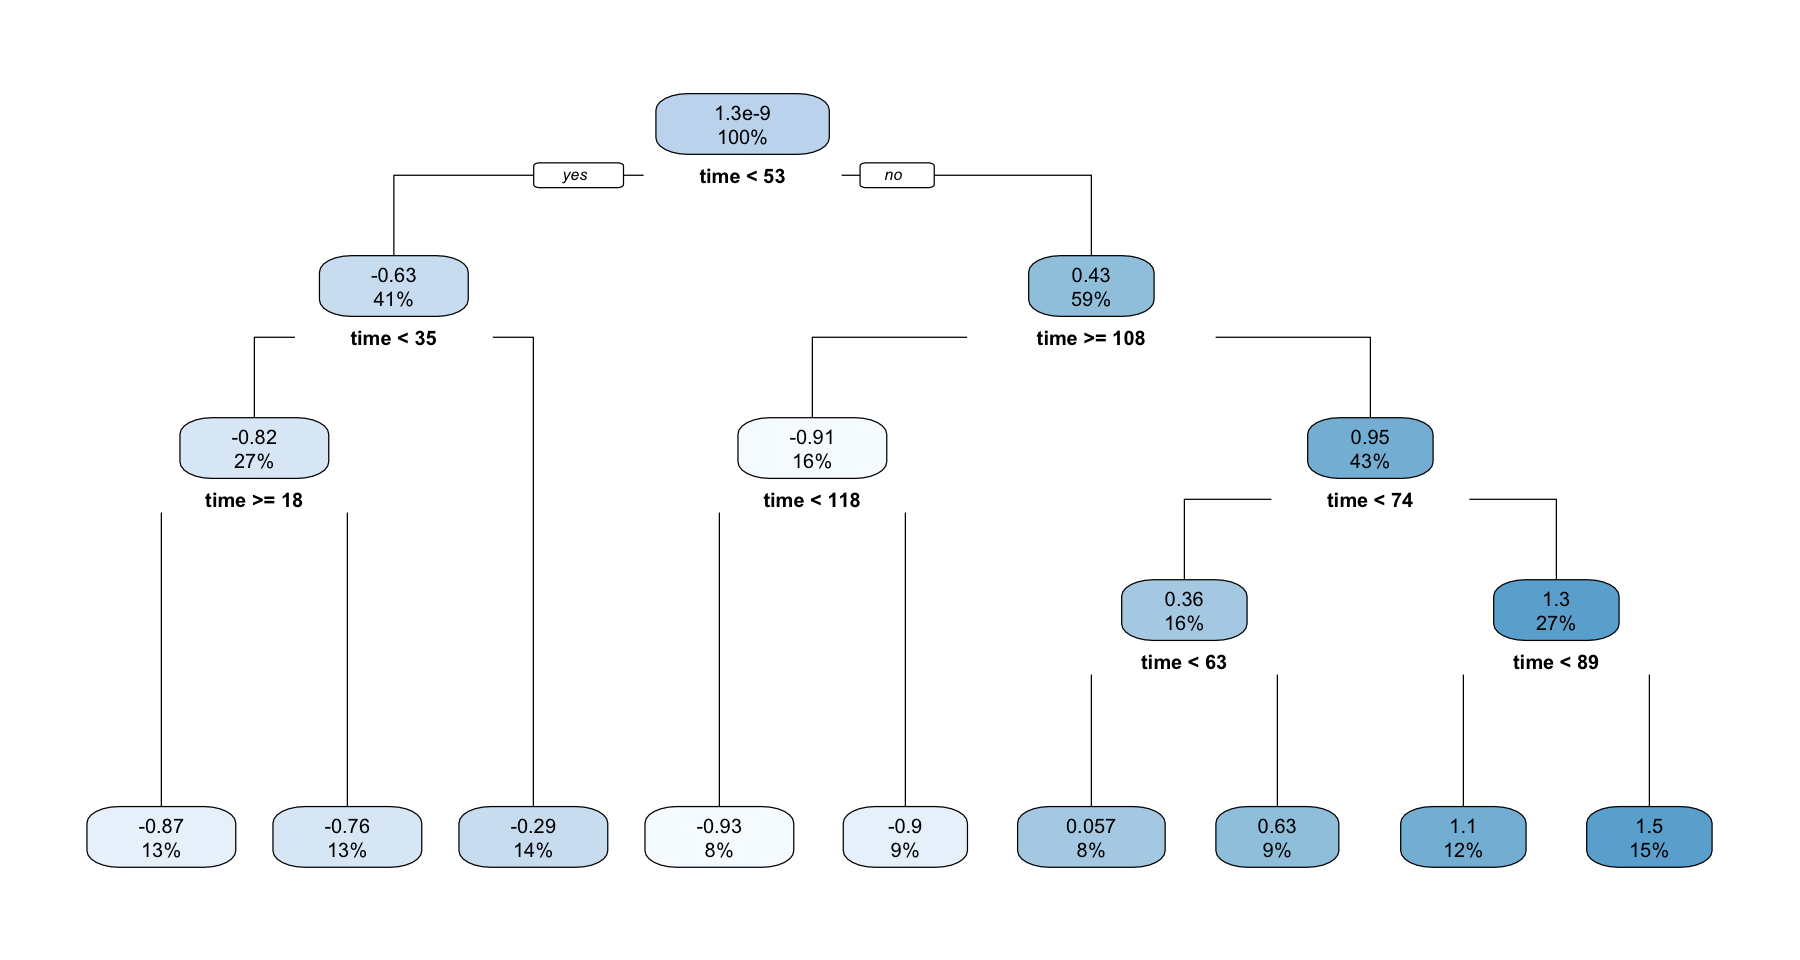

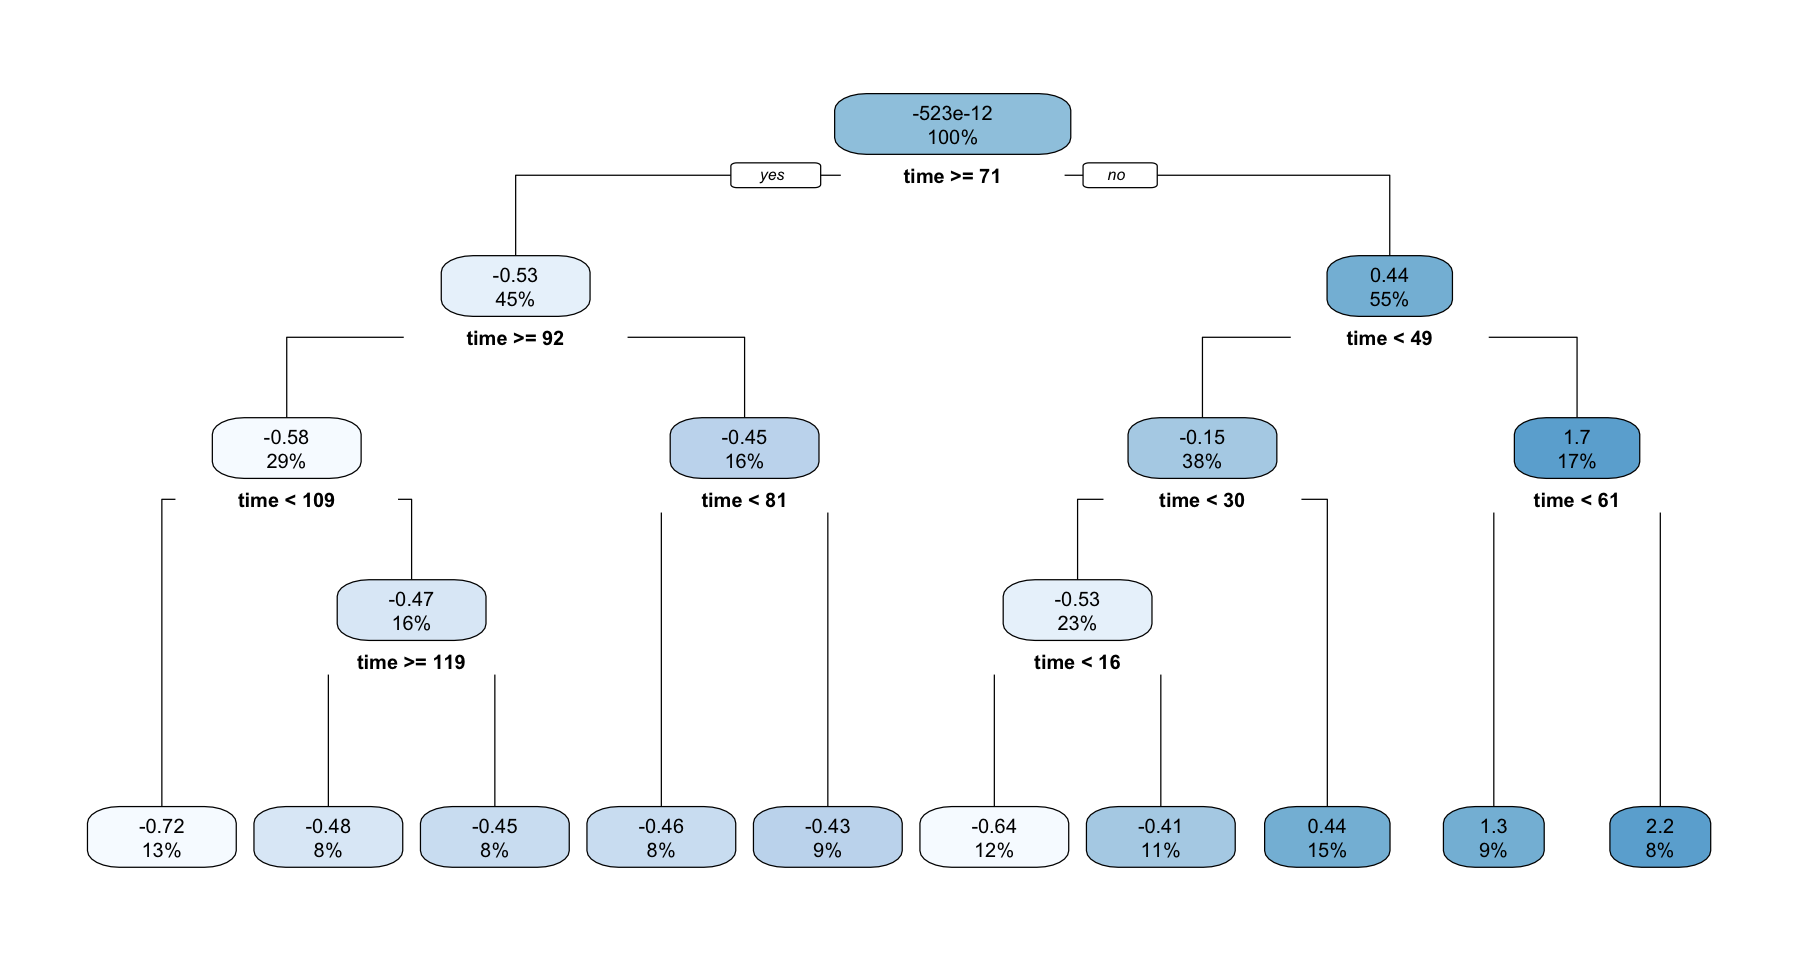

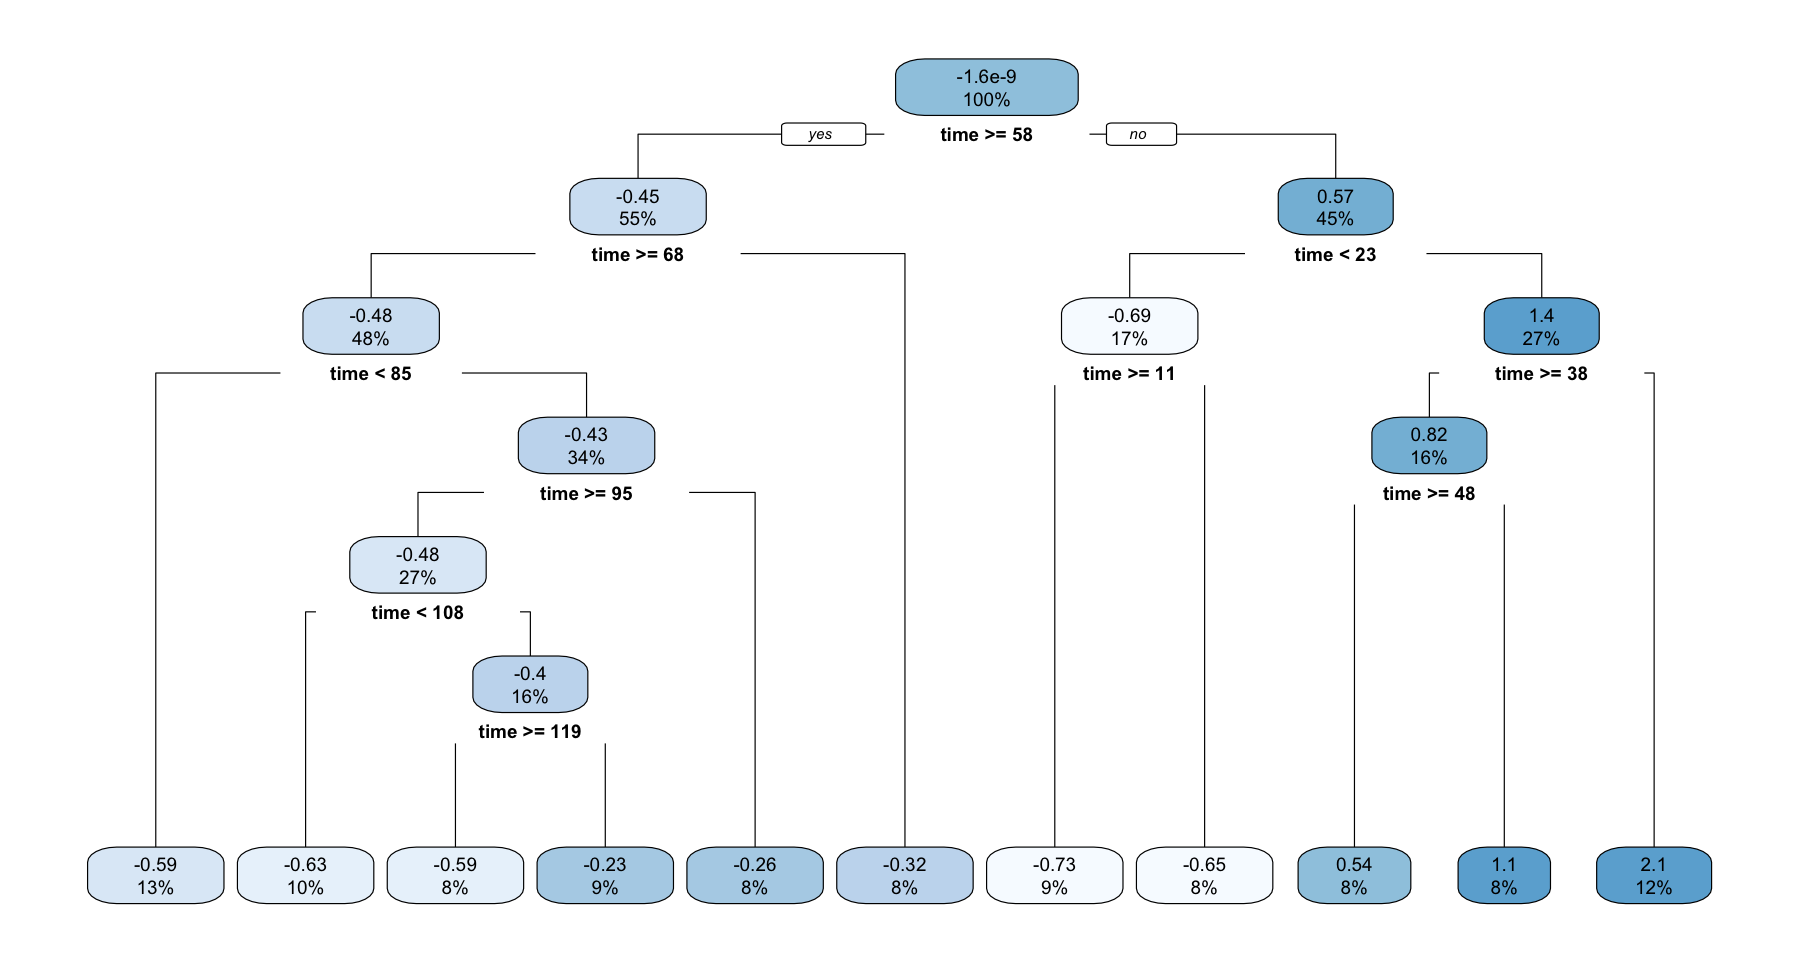

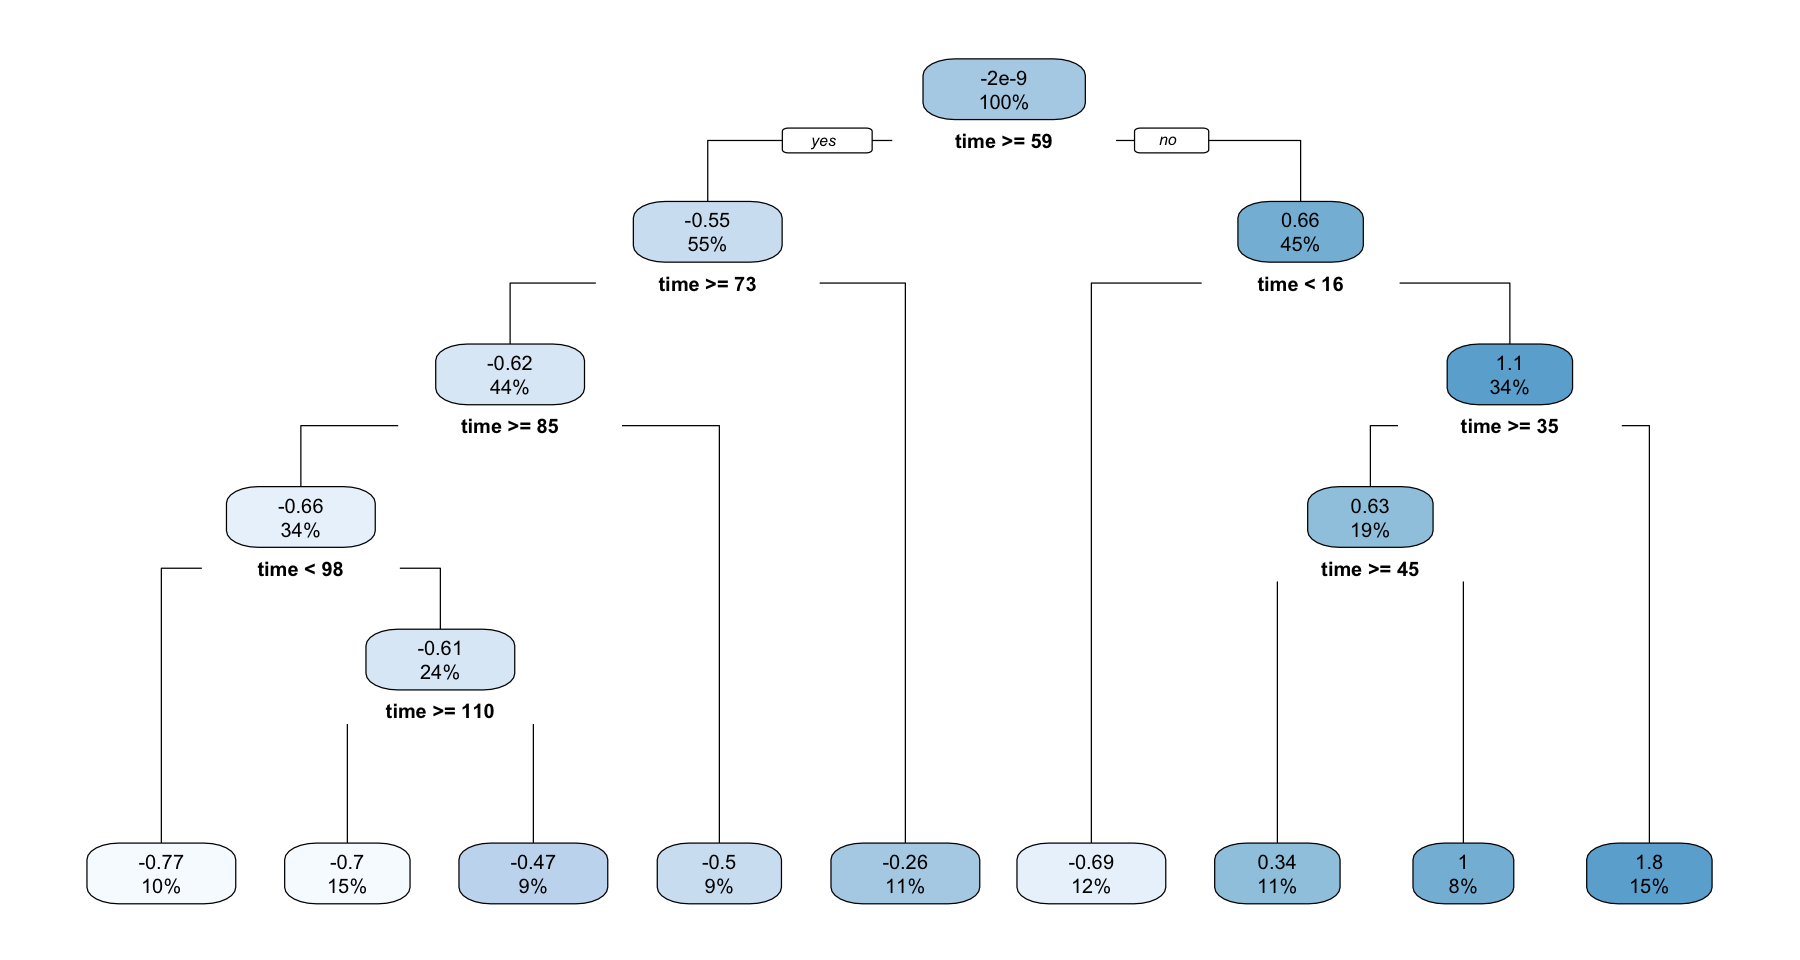

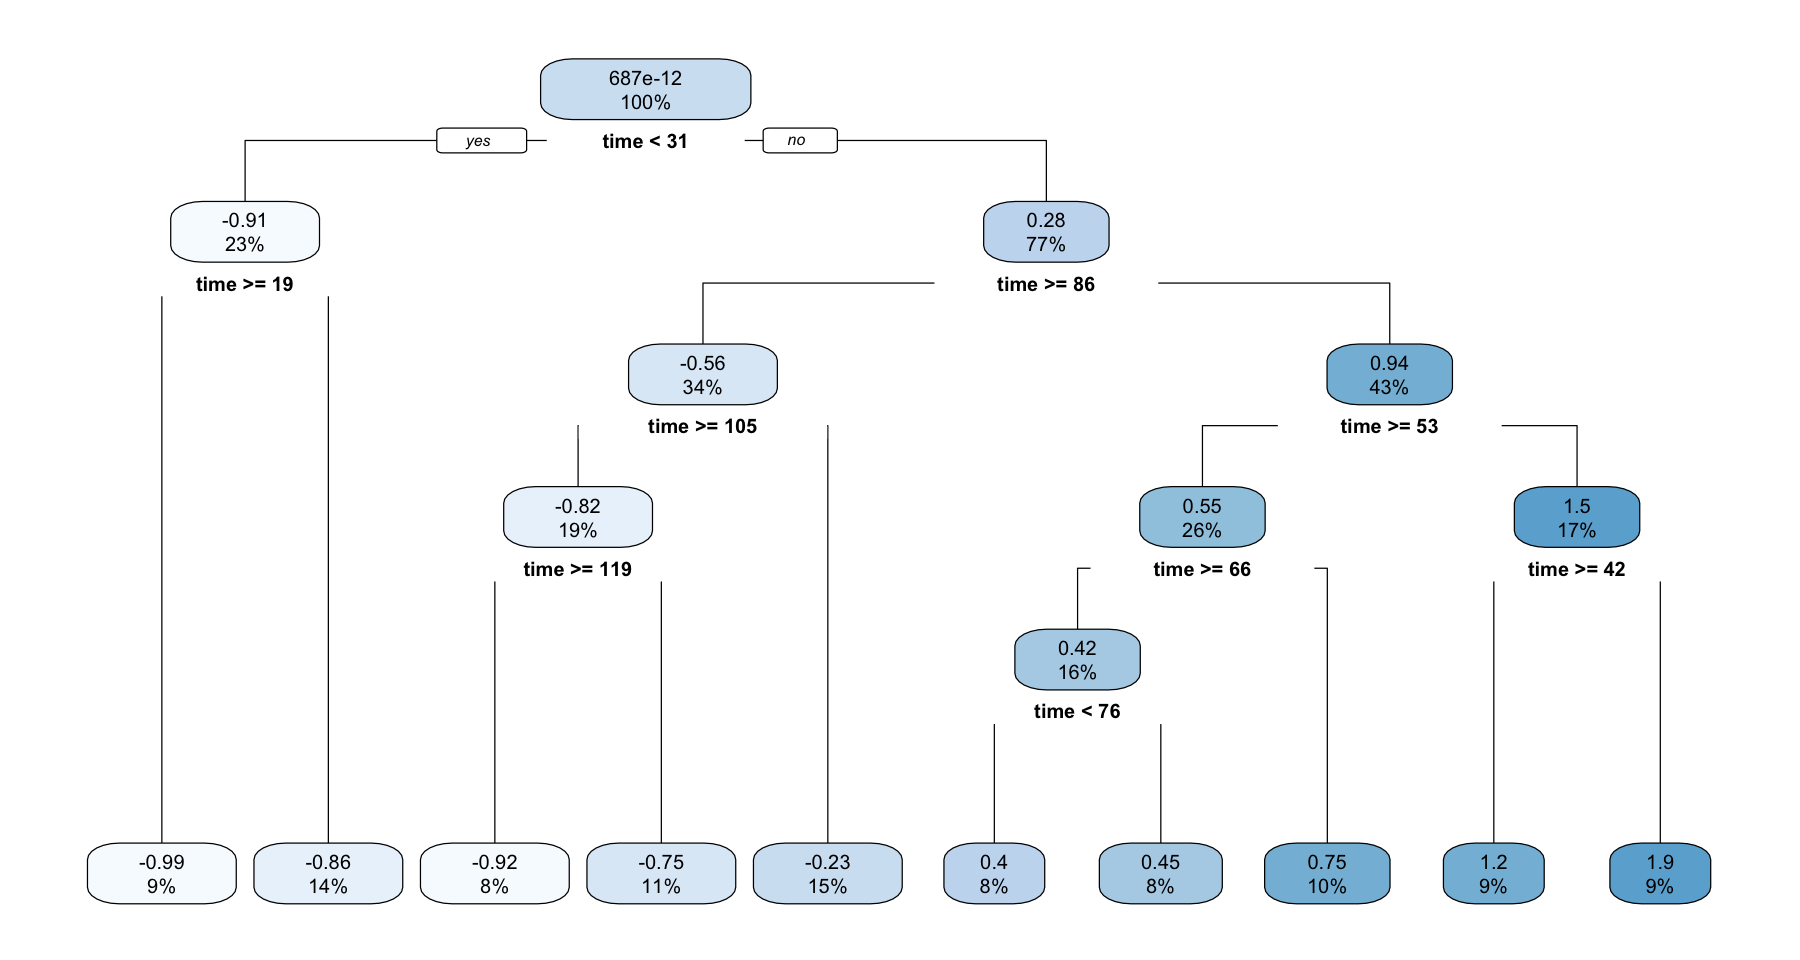

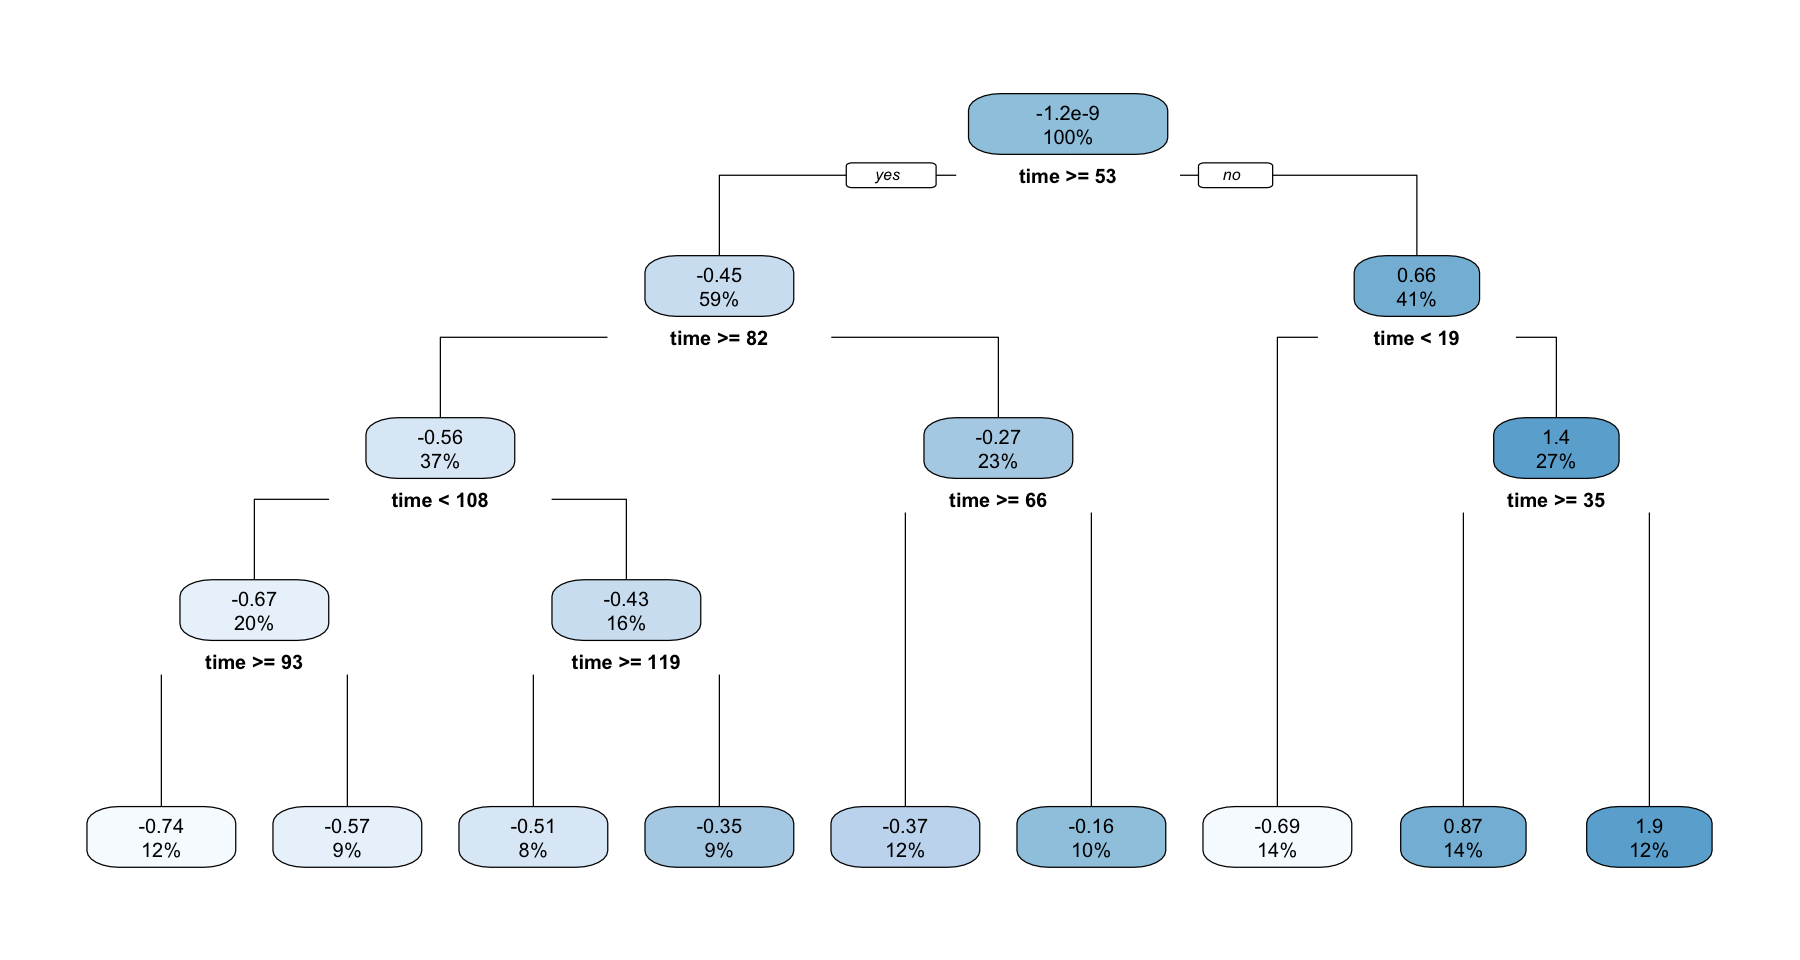

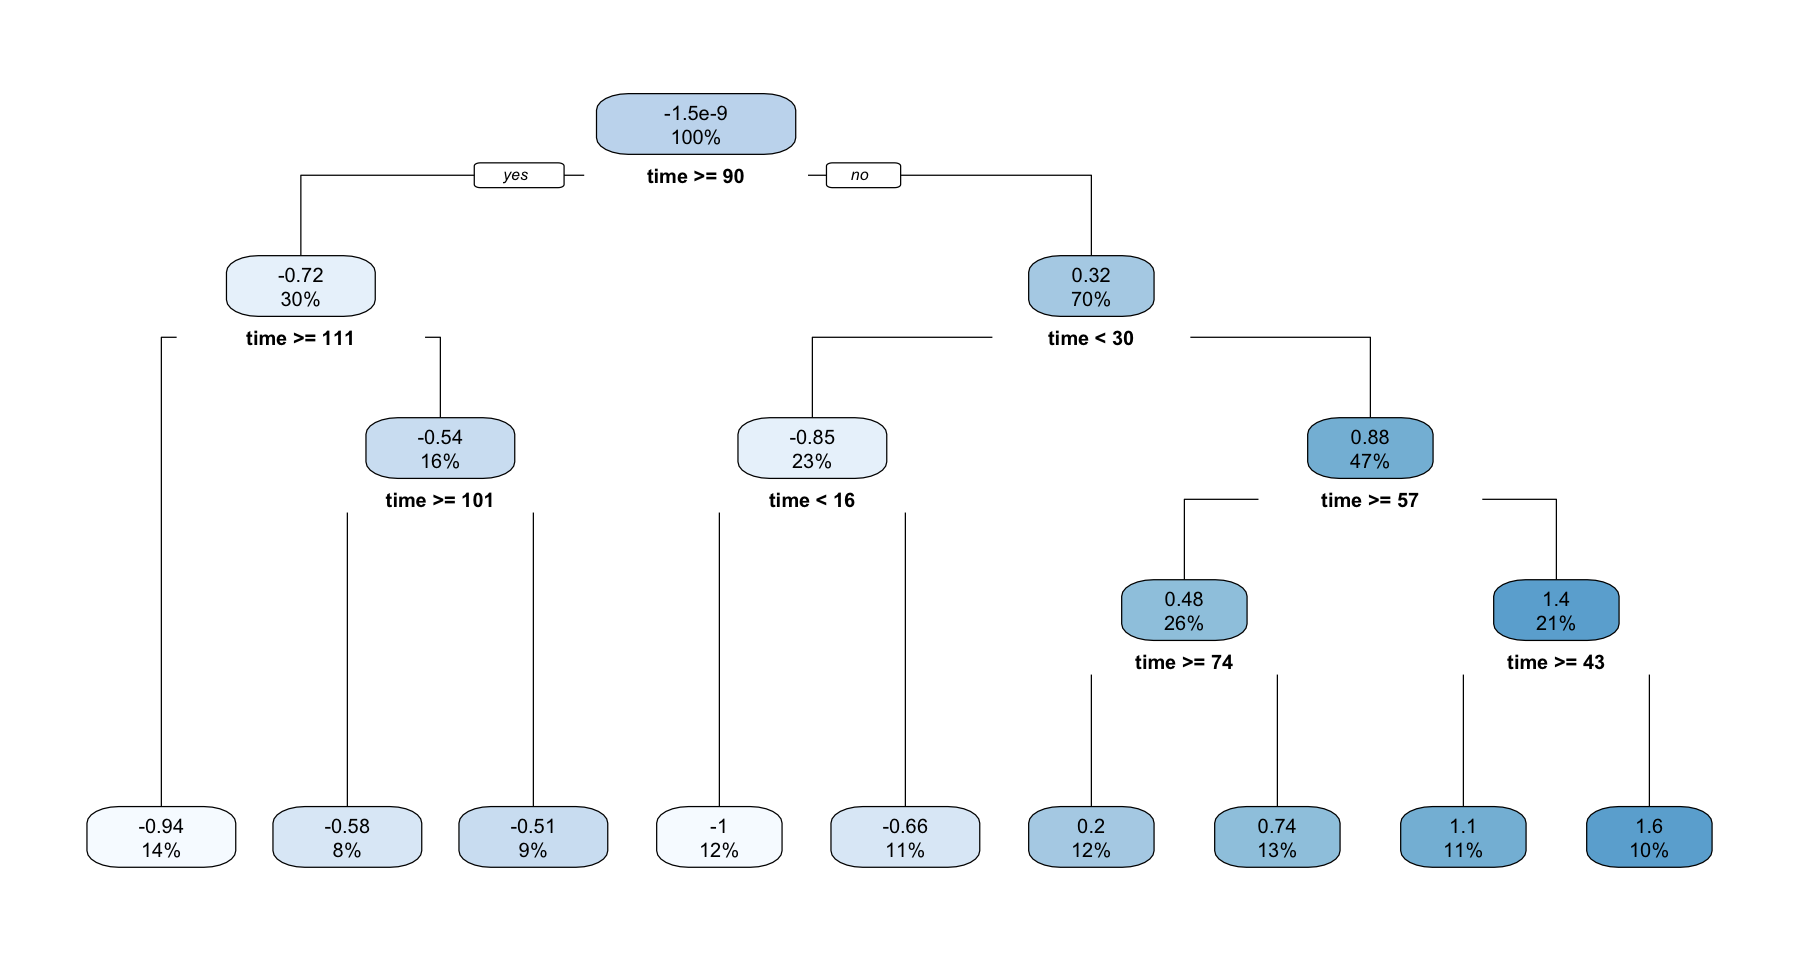

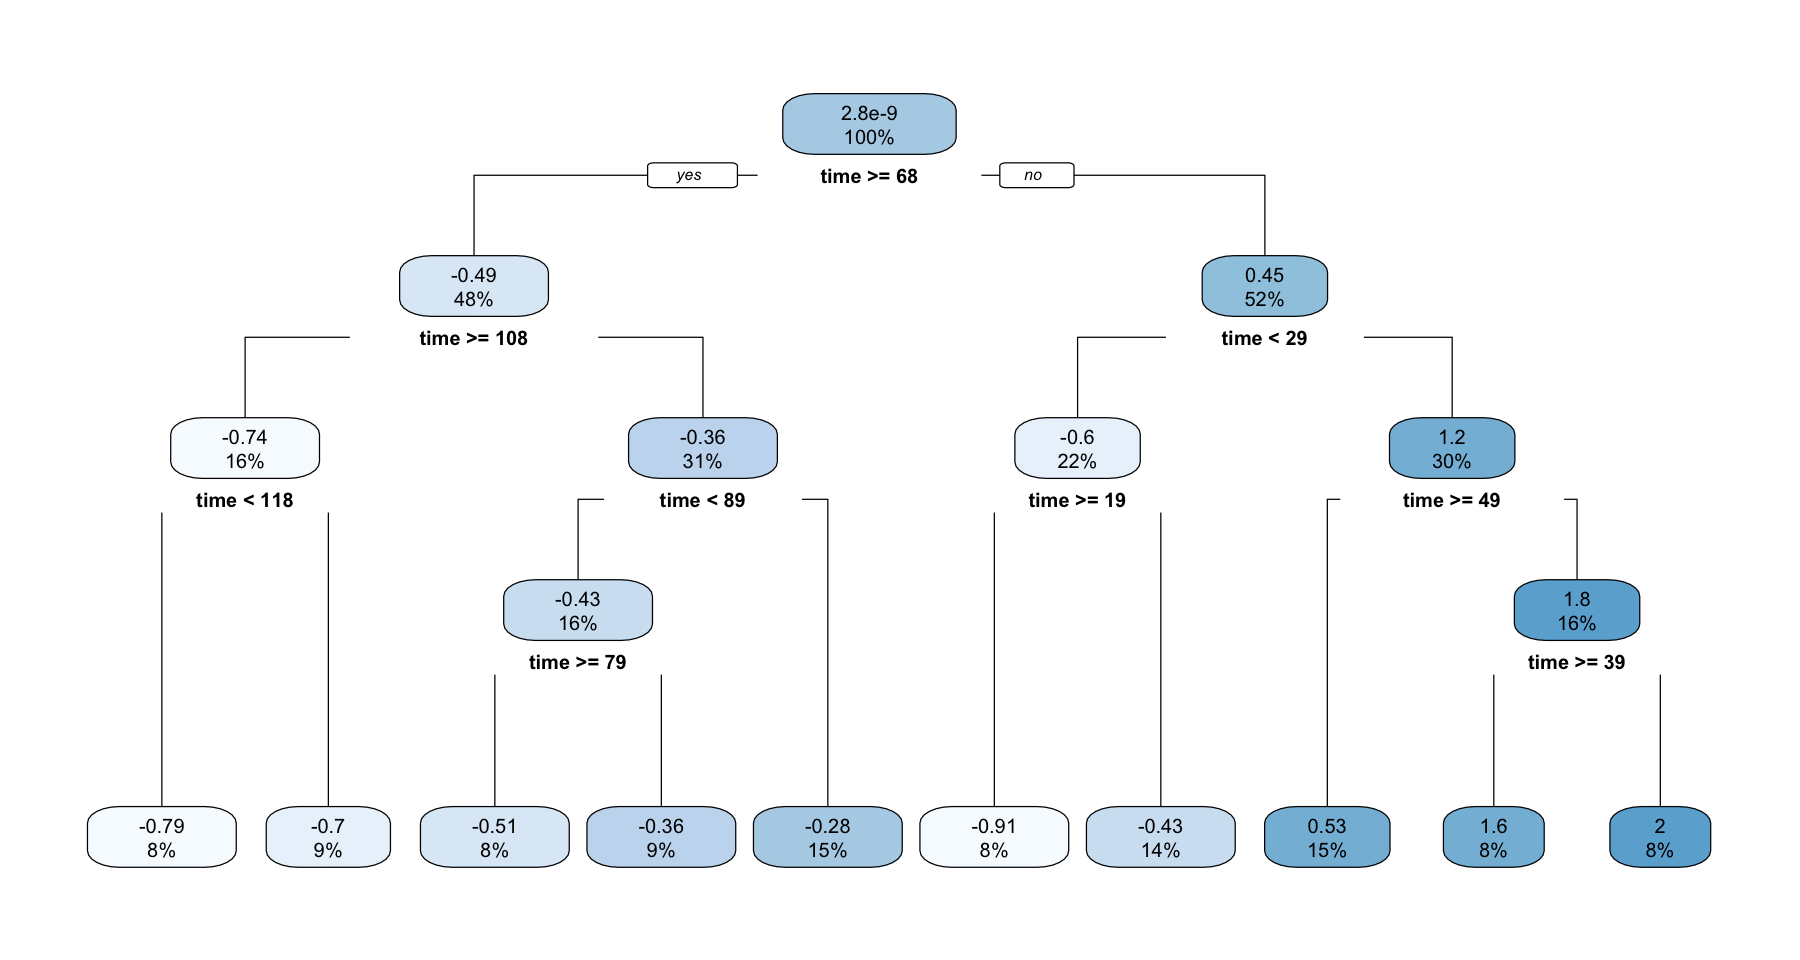

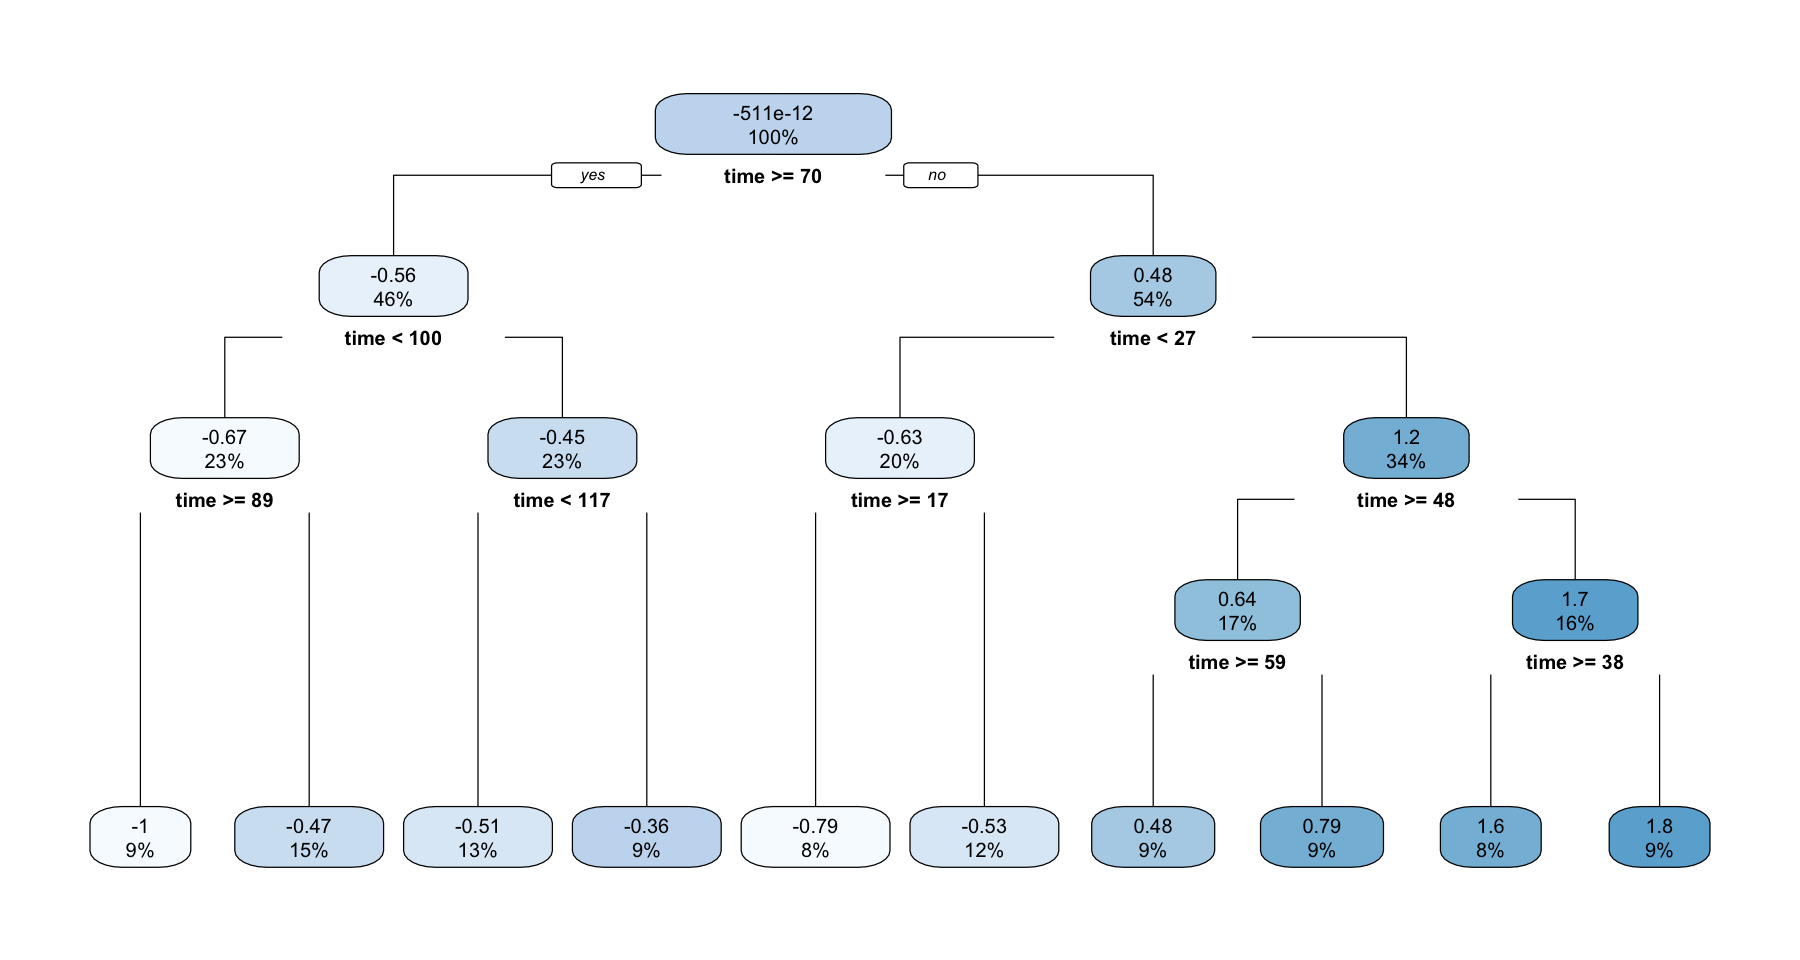

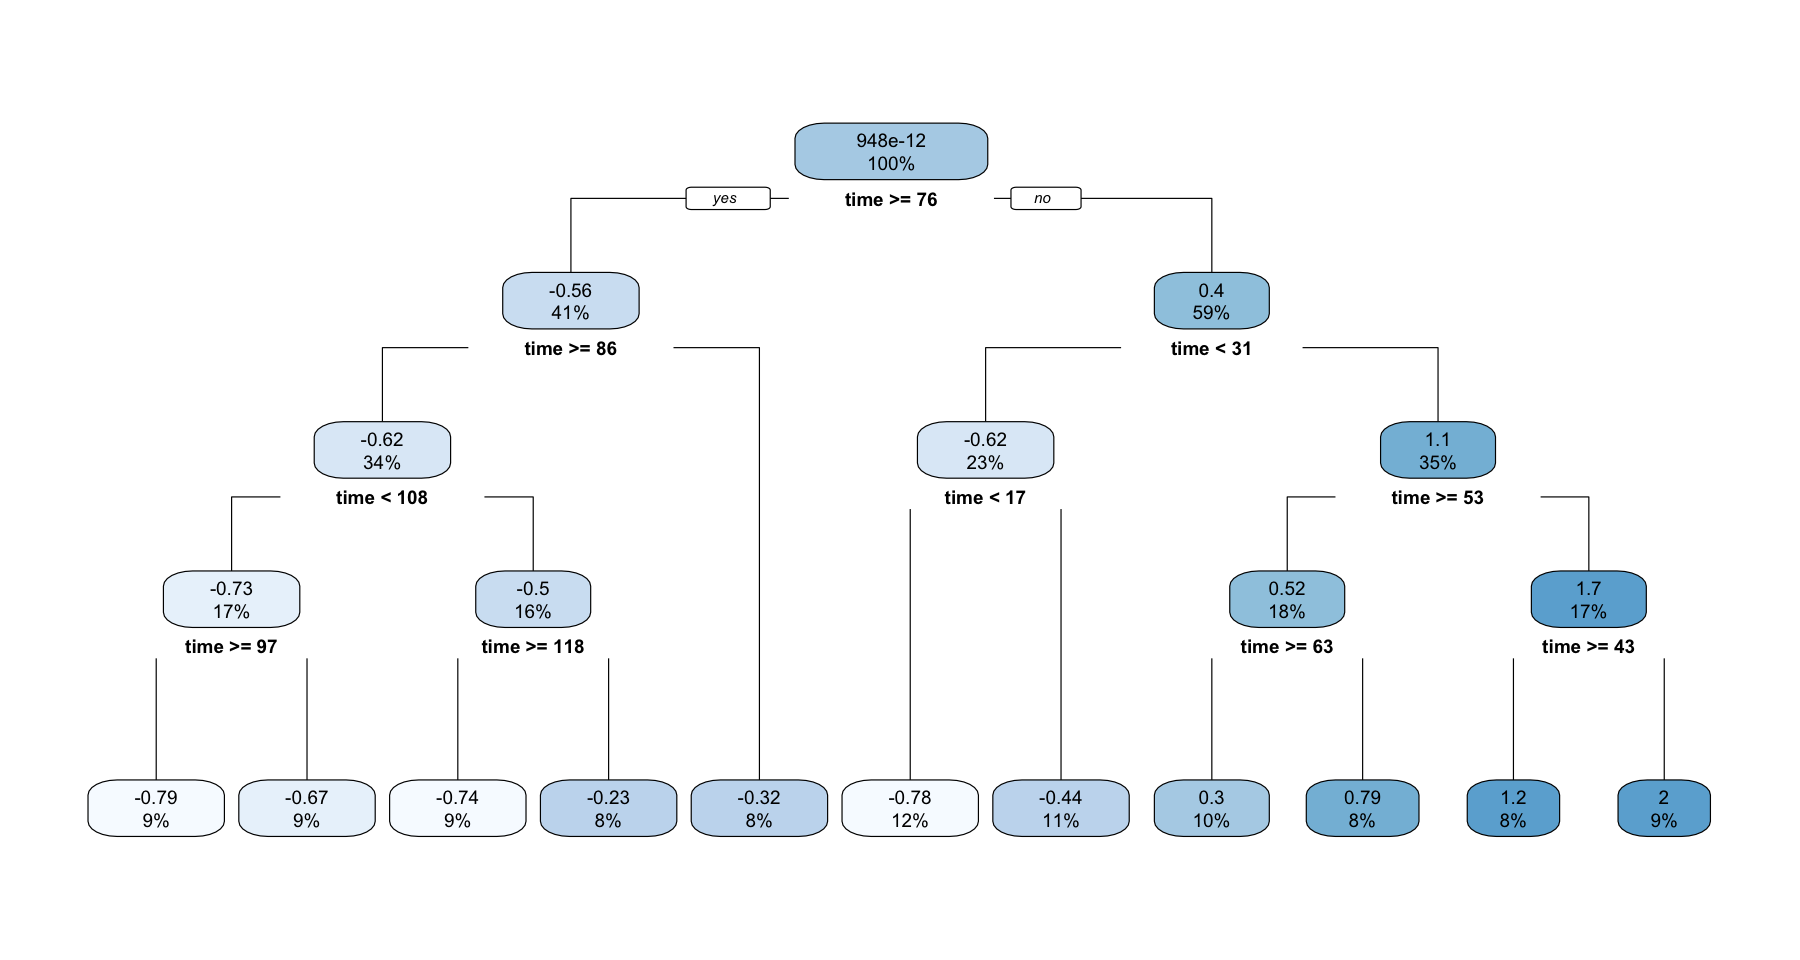

In [391]:
require(rpart.plot)
require(RColorBrewer)
require(rattle.data)
tree_long_train<- data.frame()
for (selected_series in 1: max(long_train$id)){
    data_tree=long_train[id==selected_series]
    tree_fit=rpart(value~time,data_tree,control=rpart.control(cp=0,minsplit=20,minbucket=10))
    rpart.plot(tree_fit)
    data_tree[,tree_rep:=predict(tree_fit,data_tree)]
    tree_long_train<- tree_long_train %>% rbind(data_tree) } 


Getting Squared error for each estimation <br>
Compute the mean squared error for each id <br>
Boxplot of mean squared errors of regression tree <br>
The median of MSE of lasso is smaller than the median of MSE of regression tree, however there is not much difference between them. <br>
According to IQR, also, lasso gives better results.

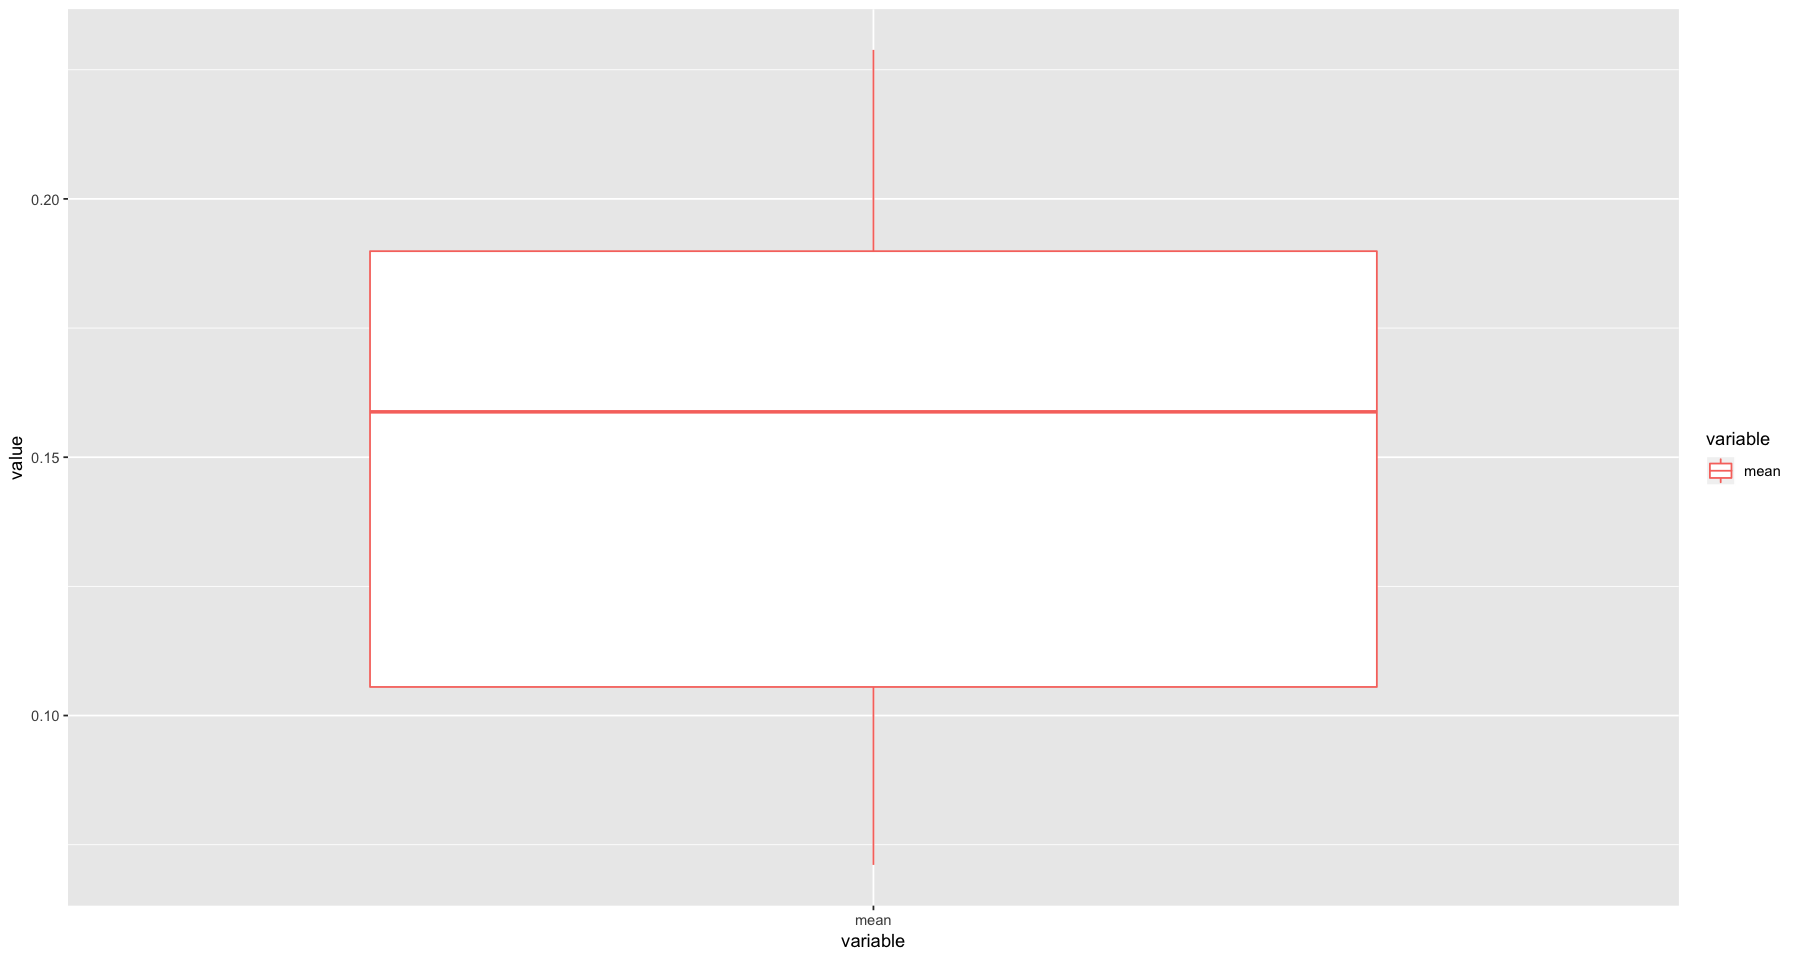

In [384]:
tree_long_train_r<- tree_long_train[,residual:=(tree_long_train$value-tree_long_train$tree_rep)^2]
residual_stats_tree=tree_long_train_r[,list(mean=mean(residual,na.rm=T)),
                                      by=list(id)]
residual_stats_tree=melt(residual_stats_tree,id.vars=c('id'))
ggplot(residual_stats_tree, aes(x=variable, y=value, color=variable)) +
  geom_boxplot() 

Compute the Mean euclidean distance of representation, it can be said that lasso gives better results.

In [365]:
NN_classifier_mean_losso <- sqrt(sum(residual_stats$value)/30)
NN_classifier_mean_losso
NN_classifier_mean_tree <- sqrt(sum(residual_stats_tree$value)/30)
NN_classifier_mean_tree

[1] 0.3677388

[1] 0.3904849